## Análise Exploratória de Dados & Modelos de Machine Learning

Dataset: "bank_data"

Identificação do grupo:

| nome | número aluno |
|------|--------------|
|Ana Rita Maganinho|2180332|
|Bárbara Pedrosa|2240510|


In [ ]:
# !pip install --upgrade cupy
# !pip install --upgrade dask
# !pip install lightgbm

In [ ]:
# !pip install scikit-learn==1.3.0

# Parte 1 - ADE
<details>
<summary><strong>  Estrutura </strong> (Expandir)</summary>

* Data Collection (Importar bibliotecas e dataset)
* Resumo geral do dataset
* Análise das variáveis:
  * Análise das Variáveis Categóricas
  * Análise das Variáveis Numéricas
* Data Cleaning
  * Explorar Missing Values
  * Eliminar Missing Values
  * Curiosidades
  * Substituição dos Missing Values
  * Duplciados
  * Outliers
* EDA - Correlações e Testes:
  * entre Variáveis Numéricas
  * entre Variáveis Categóricas
  * entre Variáveis Numéricas e Categóricas
  * Análise Multivariada
* Feature Engineering e Feature Selection
* Clusters
* Transformação dos dados

## Data Collection

Importar bibliotecas

In [ ]:
# Importar bibliotecas
import pandas as pd
from google.colab import files
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import math
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr, kendalltau, pointbiserialr, shapiro, normaltest, chi2_contingency, levene, f_oneway, kruskal, levene
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.weightstats import ztest
!pip install dcor
import dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.2 MB/s eta 0:00:00


Importar dataset

In [ ]:
# Ler o dataset do trabalho
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# ler CSV
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=';', encoding='utf-8')

Saving bank_data.csv to bank_data.csv


## Resumo geral (ADE preliminar)

In [ ]:
# para confirmar que a importação foi bem sucedida
print("\nDimensões do dataset:")
print(df.shape, "\n")

print("\n")
print("Primeiras linhas do dataset: \n")
print(df.head(), "\n")

print("\n")
print("Resumo geral do dataset: \n")
print(df.info())


Dimensões do dataset:
(41188, 21) 



Primeiras linhas do dataset: 

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent    

In [ ]:
df.describe() # descrição das variáveis numéricas

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [ ]:
df.describe(include='object') # descrição das variáveis categóricas

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

Verificação de missing values

In [ ]:
# 'unknown' e 'nonexistent' como placeholders de valores em falta
for column in df.columns:
    unknown_count = df[column][df[column] == 'unknown'].count() # Contar 'unknown'
    nonexistent_count = df[column][df[column] == 'nonexistent'].count()  # Contar 'nonexistent'
    total_missing = unknown_count + nonexistent_count  # Total missing values
    print(f"Column '{column}': {unknown_count} unknown values, {nonexistent_count} nonexistent values, Total: {total_missing}")

Column 'age': 0 unknown values, 0 nonexistent values, Total: 0
Column 'job': 330 unknown values, 0 nonexistent values, Total: 330
Column 'marital': 80 unknown values, 0 nonexistent values, Total: 80
Column 'education': 1731 unknown values, 0 nonexistent values, Total: 1731
Column 'default': 8597 unknown values, 0 nonexistent values, Total: 8597
Column 'housing': 990 unknown values, 0 nonexistent values, Total: 990
Column 'loan': 990 unknown values, 0 nonexistent values, Total: 990
Column 'contact': 0 unknown values, 0 nonexistent values, Total: 0
Column 'month': 0 unknown values, 0 nonexistent values, Total: 0
Column 'day_of_week': 0 unknown values, 0 nonexistent values, Total: 0
Column 'duration': 0 unknown values, 0 nonexistent values, Total: 0
Column 'campaign': 0 unknown values, 0 nonexistent values, Total: 0
Column 'pdays': 0 unknown values, 0 nonexistent values, Total: 0
Column 'previous': 0 unknown values, 0 nonexistent values, Total: 0
Column 'poutcome': 0 unknown values, 35563

In [ ]:
for column in df.columns:
    print(f"\n{'='*30}\nColumn: '{column}'\n{'='*30}")

    # Calcular a contagem absoluta e a frequência
    counts = df[column].value_counts().sort_index()
    frequencies = (counts / counts.sum() * 100).round(5)

    # Criar o DataFrame com os valores, contagens e frequências
    result = counts.reset_index()
    result['Frequency (%)'] = frequencies.values

    # Mostrar o resultado
    display(result)


Column: 'age'


age  count  Frequency (%)
0    17      5        0.01214
1    18     28        0.06798
2    19     42        0.10197
3    20     65        0.15781
4    21    102        0.24764
..  ...    ...            ...
73   91      2        0.00486
74   92      4        0.00971
75   94      1        0.00243
76   95      1        0.00243
77   98      2        0.00486

[78 rows x 3 columns]


Column: 'job'


job  count  Frequency (%)
0          admin.  10422       25.30349
1     blue-collar   9254       22.46771
2    entrepreneur   1456        3.53501
3       housemaid   1060        2.57357
4      management   2924        7.09916
5         retired   1720        4.17597
6   self-employed   1421        3.45003
7        services   3969        9.63630
8         student    875        2.12441
9      technician   6743       16.37127
10     unemployed   1014        2.46188
11        unknown    330        0.80120


Column: 'marital'


marital  count  Frequency (%)
0  divorced   4612       11.19744
1   married  24928       60.52248
2    single  11568       28.08585
3   unknown     80        0.19423


Column: 'education'


education  count  Frequency (%)
0             basic.4y   4176       10.13888
1             basic.6y   2292        5.56473
2             basic.9y   6045       14.67660
3          high.school   9515       23.10139
4           illiterate     18        0.04370
5  professional.course   5243       12.72944
6    university.degree  12168       29.54259
7              unknown   1731        4.20268


Column: 'default'


default  count  Frequency (%)
0       no  32588       79.12013
1  unknown   8597       20.87258
2      yes      3        0.00728


Column: 'housing'


housing  count  Frequency (%)
0       no  18622       45.21220
1  unknown    990        2.40361
2      yes  21576       52.38419


Column: 'loan'


loan  count  Frequency (%)
0       no  33950       82.42692
1  unknown    990        2.40361
2      yes   6248       15.16947


Column: 'contact'


contact  count  Frequency (%)
0   cellular  26144        63.4748
1  telephone  15044        36.5252


Column: 'month'


month  count  Frequency (%)
0   apr   2632        6.39021
1   aug   6178       14.99951
2   dec    182        0.44188
3   jul   7174       17.41769
4   jun   5318       12.91153
5   mar    546        1.32563
6   may  13769       33.42964
7   nov   4101        9.95678
8   oct    718        1.74323
9   sep    570        1.38390


Column: 'day_of_week'


day_of_week  count  Frequency (%)
0         fri   7827       19.00311
1         mon   8514       20.67107
2         thu   8623       20.93571
3         tue   8090       19.64164
4         wed   8134       19.74847


Column: 'duration'


duration  count  Frequency (%)
0            0      4        0.00971
1            1      3        0.00728
2            2      1        0.00243
3            3      3        0.00728
4            4     12        0.02913
...        ...    ...            ...
1539      3631      1        0.00243
1540      3643      1        0.00243
1541      3785      1        0.00243
1542      4199      1        0.00243
1543      4918      1        0.00243

[1544 rows x 3 columns]


Column: 'campaign'


campaign  count  Frequency (%)
0          1  17642       42.83286
1          2  10570       25.66281
2          3   5341       12.96737
3          4   2651        6.43634
4          5   1599        3.88220
5          6    979        2.37691
6          7    629        1.52714
7          8    400        0.97116
8          9    283        0.68709
9         10    225        0.54628
10        11    177        0.42974
11        12    125        0.30349
12        13     92        0.22337
13        14     69        0.16752
14        15     51        0.12382
15        16     51        0.12382
16        17     58        0.14082
17        18     33        0.08012
18        19     26        0.06313
19        20     30        0.07284
20        21     24        0.05827
21        22     17        0.04127
22        23     16        0.03885
23        24     15        0.03642
24        25      8        0.01942
25        26      8        0.01942
26        27     11        0.02671
27        28      8        0.01942
28        29     10        0.02428
29        30      7        0.01700
30        31      7        0.01700
31        32      4        0.00971
32        33      4        0.00971
33        34      3        0.00728
34        35      5        0.01214
35        37      1        0.00243
36        39      1        0.00243
37        40      2        0.00486
38        41      1        0.00243
39        42      2        0.00486
40        43      2        0.00486
41        56      1        0.00243


Column: 'pdays'


pdays  count  Frequency (%)
0       0     15        0.03642
1       1     26        0.06313
2       2     61        0.14810
3       3    439        1.06584
4       4    118        0.28649
5       5     46        0.11168
6       6    412        1.00029
7       7     60        0.14567
8       8     18        0.04370
9       9     64        0.15539
10     10     52        0.12625
11     11     28        0.06798
12     12     58        0.14082
13     13     36        0.08740
14     14     20        0.04856
15     15     24        0.05827
16     16     11        0.02671
17     17      8        0.01942
18     18      7        0.01700
19     19      3        0.00728
20     20      1        0.00243
21     21      2        0.00486
22     22      3        0.00728
23     25      1        0.00243
24     26      1        0.00243
25     27      1        0.00243
26    999  39673       96.32174


Column: 'previous'


previous  count  Frequency (%)
0         0  35563       86.34311
1         1   4561       11.07361
2         2    754        1.83063
3         3    216        0.52442
4         4     70        0.16995
5         5     18        0.04370
6         6      5        0.01214
7         7      1        0.00243


Column: 'poutcome'


poutcome  count  Frequency (%)
0      failure   4252       10.32340
1  nonexistent  35563       86.34311
2      success   1373        3.33350


Column: 'emp.var.rate'


emp.var.rate  count  Frequency (%)
0          -3.4   1071        2.60027
1          -3.0    172        0.41760
2          -2.9   1663        4.03758
3          -1.8   9184       22.29776
4          -1.7    773        1.87676
5          -1.1    635        1.54171
6          -0.2     10        0.02428
7          -0.1   3683        8.94192
8           1.1   7763       18.84772
9           1.4  16234       39.41439


Column: 'cons.price.idx'


cons.price.idx  count  Frequency (%)
0           92.201    770        1.86948
1           92.379    267        0.64825
2           92.431    447        1.08527
3           92.469    178        0.43216
4           92.649    357        0.86676
5           92.713    172        0.41760
6           92.756     10        0.02428
7           92.843    282        0.68467
8           92.893   5794       14.06720
9           92.963    715        1.73594
10          93.075   2458        5.96776
11          93.200   3616        8.77926
12          93.369    264        0.64096
13          93.444   5175       12.56434
14          93.749    174        0.42245
15          93.798     67        0.16267
16          93.876    212        0.51471
17          93.918   6685       16.23046
18          93.994   7763       18.84772
19          94.027    233        0.56570
20          94.055    229        0.55599
21          94.199    303        0.73565
22          94.215    311        0.75507
23          94.465   4374       10.61960
24          94.601    204        0.49529
25          94.767    128        0.31077


Column: 'cons.conf.idx'


cons.conf.idx  count  Frequency (%)
0           -50.8    128        0.31077
1           -50.0    282        0.68467
2           -49.5    204        0.49529
3           -47.1   2458        5.96776
4           -46.2   5794       14.06720
5           -45.9     10        0.02428
6           -42.7   6685       16.23046
7           -42.0   3616        8.77926
8           -41.8   4374       10.61960
9           -40.8    715        1.73594
10          -40.4     67        0.16267
11          -40.3    311        0.75507
12          -40.0    212        0.51471
13          -39.8    229        0.55599
14          -38.3    233        0.56570
15          -37.5    303        0.73565
16          -36.4   7763       18.84772
17          -36.1   5175       12.56434
18          -34.8    264        0.64096
19          -34.6    174        0.42245
20          -33.6    178        0.43216
21          -33.0    172        0.41760
22          -31.4    770        1.86948
23          -30.1    357        0.86676
24          -29.8    267        0.64825
25          -26.9    447        1.08527


Column: 'euribor3m'


euribor3m  count  Frequency (%)
0        0.634      8        0.01942
1        0.635     43        0.10440
2        0.636     14        0.03399
3        0.637      6        0.01457
4        0.638      7        0.01700
..         ...    ...            ...
311      4.967    643        1.56113
312      4.968    992        2.40847
313      4.970    172        0.41760
314      5.000      7        0.01700
315      5.045      9        0.02185

[316 rows x 3 columns]


Column: 'nr.employed'


nr.employed  count  Frequency (%)
0        4963.6    635        1.54171
1        4991.6    773        1.87676
2        5008.7    650        1.57813
3        5017.5   1071        2.60027
4        5023.5    172        0.41760
5        5076.2   1663        4.03758
6        5099.1   8534       20.71963
7        5176.3     10        0.02428
8        5191.0   7763       18.84772
9        5195.8   3683        8.94192
10       5228.1  16234       39.41439


Column: 'y'


y  count  Frequency (%)
0   no  36548       88.73458
1  yes   4640       11.26542

In [ ]:
# definir variáveis

# Lista de colunas categóricas

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'day_of_week', 'poutcome', 'y']

# Lista de colunas numéricas

numerical_features = ['age', 'duration',	'campaign',	'pdays', 'previous', 'emp.var.rate',	'cons.price.idx',	'cons.conf.idx', 'euribor3m',	'nr.employed'] # todas as numericas
numerical_features_campanha = ['age',	'duration',	'campaign',	'pdays', 'previous'] # apenas as numericas relacionadas com a campanha
numerical_features_universais = ['emp.var.rate',	'cons.price.idx',	'cons.conf.idx', 'euribor3m',	'nr.employed'] # apenas as numericas universais

## Análise das variáveis

### Análise das Variáveis Categóricas

<details>
<summary><strong>  Insights preliminares das variáveis categóricas
 </strong> (Expandir)</summary>

*   O primeiro gráfico representa o **tipo de emprego dos clientes**:
  * Todas as profissões apresentam baixas taxas de adesão;
  * as profissões mais qualificadas, como “admin.”, o “technician” e o “blue-collar” apresentam taxas mais elevadas de adesão;
  *   Já os clientes que se encontram desempregado ou trabalham com "serviços", demonstram baixas taxas.

*   O segundo gráfico reflete o **estado civil dos clientes**:  
  * Clientes "casados" tendem a ser o grupo mais representado.
  * O estado civil não parece ter um impacto significativo na adesão.

*   O terceiro gráfico evidencia o **grau de escolaridade** dos clientes:
  * É comum observar que clientes com maior grau de escolaridade, como universitários ou pós-graduados, apresentam taxas de adesão mais altas;
  * Além disso, é possível verificar que a adesão dos clientes “illiterate” foi bastante reduzida.

*   O quarto gráfico evidencia se o cliente já falhou o pagamento do empréstimo (**crédito em atraso/Default)**).
  * A maioria dos clientes tende a estar no grupo "no";
  * Verifica-se que os telefonemas para os clientes com “default” igual a “yes” é praticamente nulo.

*   O quinto e o sexto gráficos verificam a **posse de crédito habitacional (housing)** e de **consumo (loan)**.
  *  é possível verificar que a maioria dos clientes não subscreveu o depósito bancário.
  * Os clientes com housing = sim, apresentam uma proporção ligeiramente superior de subscrever a campanha (y = sim) em comparação com os que têm housing = não.
  * Acontece o inverso no gráfico da distribuição de loan por y.

*   O gráfico **contact** representa o método de contato, ("telephone" ou "cellular"):
  * os contactos por cellular têm maior taxa de adesão;

*   O gráfico **month** representa o mês em que o cliente foi contactado durante a campanha de marketing.
  * a campanha apresentou mais adesão entre Abril-Agosto;
  * pode refletir sazonalidade ou mudanças no comportamento dos clientes.

*   O nono gráfico representa o **dia da semana em que o cliente foi contactado (day_of_week)**
  * existiu uma taxa ligeiramente melhor no meio da semana, mas nada de relevante em comparação aos outros dias.

*   O décimo gráfico representa o **resultado de uma campanha anterior (poutcome)**:
  * os clientes que aderiram a última campanha de marketing são mais propensos a aderir novamente, do que os clientes que não aderiram ao último produto;
  * A maioria dos valores encontram-se em poutcome = nonexistent, sendo necessário analisar estes valores com cuidado, de maneira a compreender se são missing values.

*   O décimo primeiro gráfico representa a **proporção de adesão à campanha**:
  * desequilíbrio existente com uma proporção maior do “no” em relação ao “yes”.

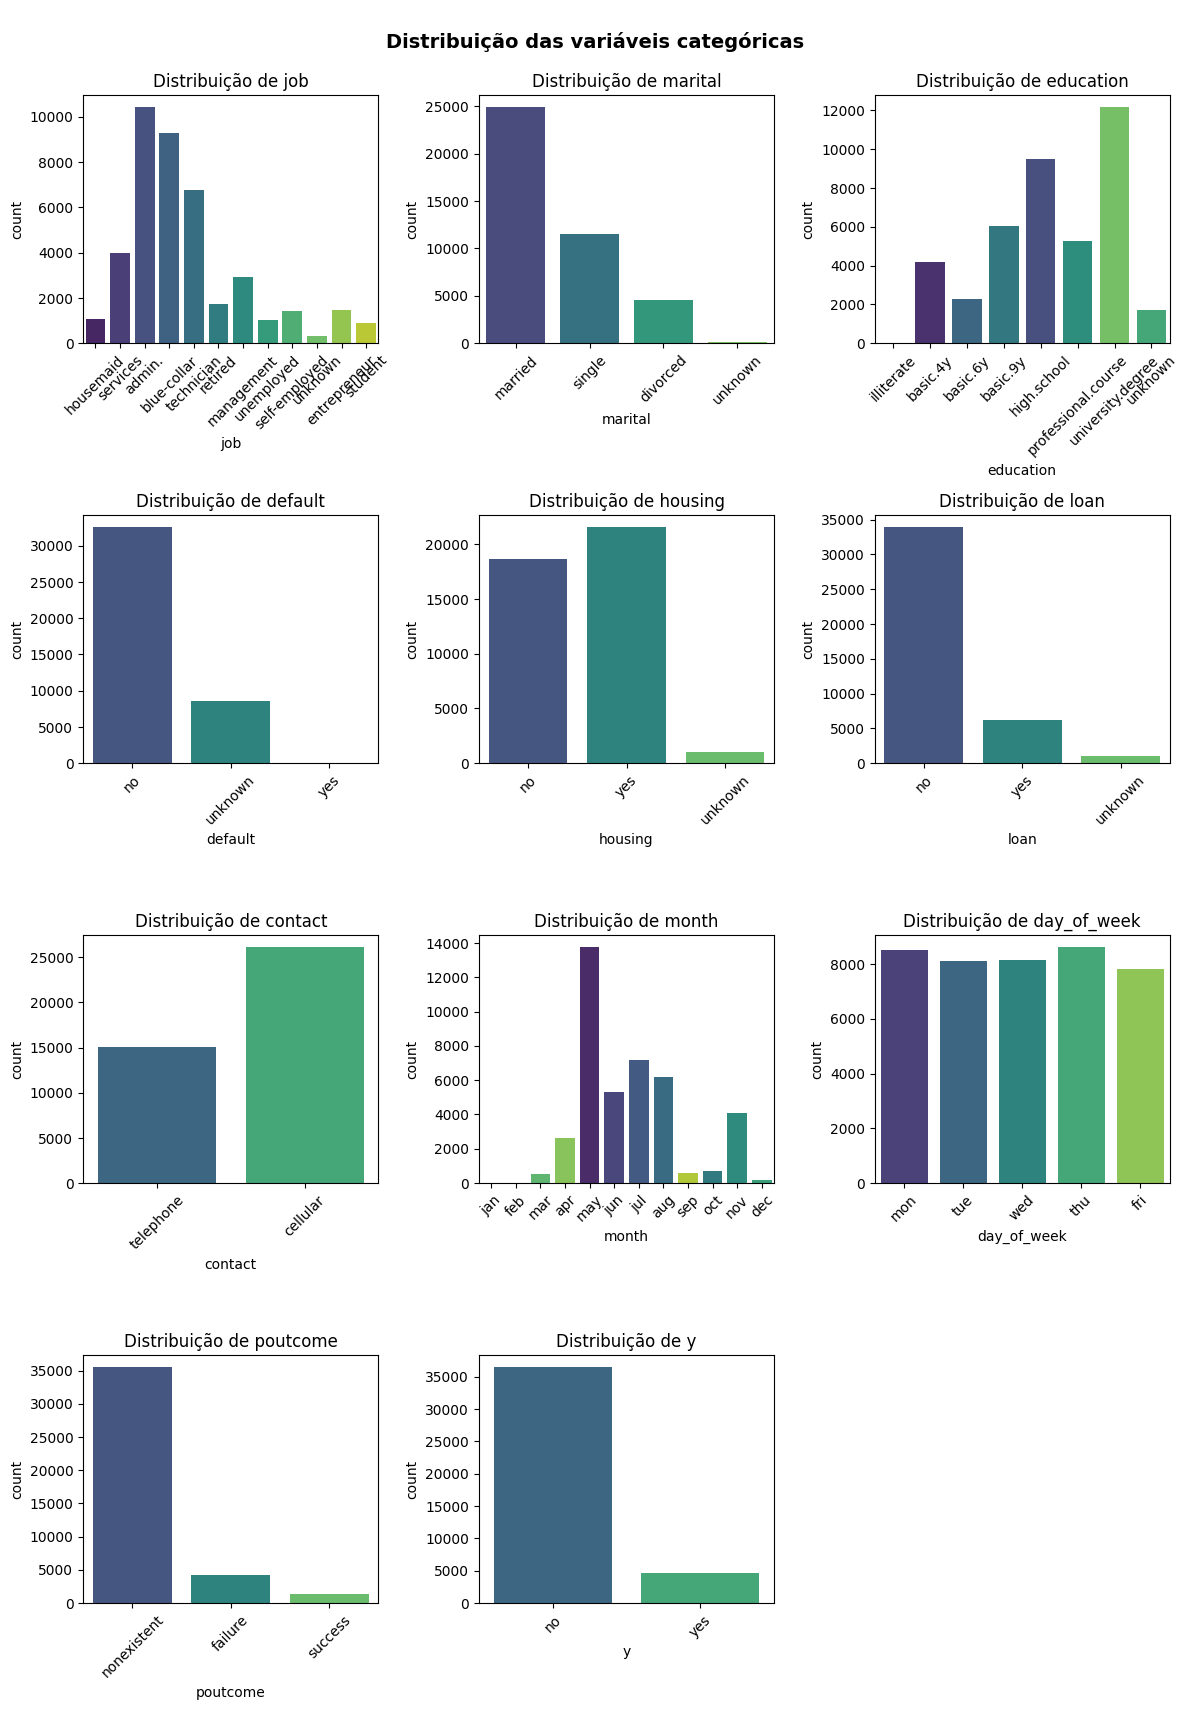

In [ ]:
def plot_categorical_distributions(columns, df=None):
    # Definir variável alvo (última do DataFrame)
    target = df.columns[-1]

    rows = (len(columns) + 1) // 2
    plt.figure(figsize=(12, 4 * rows))

    for i, col in enumerate(columns, 1):
        plt.subplot(rows, 3, i)

        # Ordenar a variável 'education' por ordem
        if col == 'education':
            sns.countplot(
                data=df, x=col, hue=col, palette="viridis",
                order=['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
                       'professional.course', 'university.degree', 'unknown']
            )
        # Ordenar a variável 'month' por ordem cronológica
        elif col == 'month':
            sns.countplot(
                data=df, x=col, hue=col, palette="viridis",
                order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
            )
        else:
            sns.countplot(data=df, x=col, hue=col, palette="viridis")

        plt.title(f"Distribuição de {col}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.suptitle("\nDistribuição das variáveis categóricas", y=1.02, fontsize=14, fontweight='bold')
    plt.show()

plot_categorical_distributions(categorical_features, df=df)

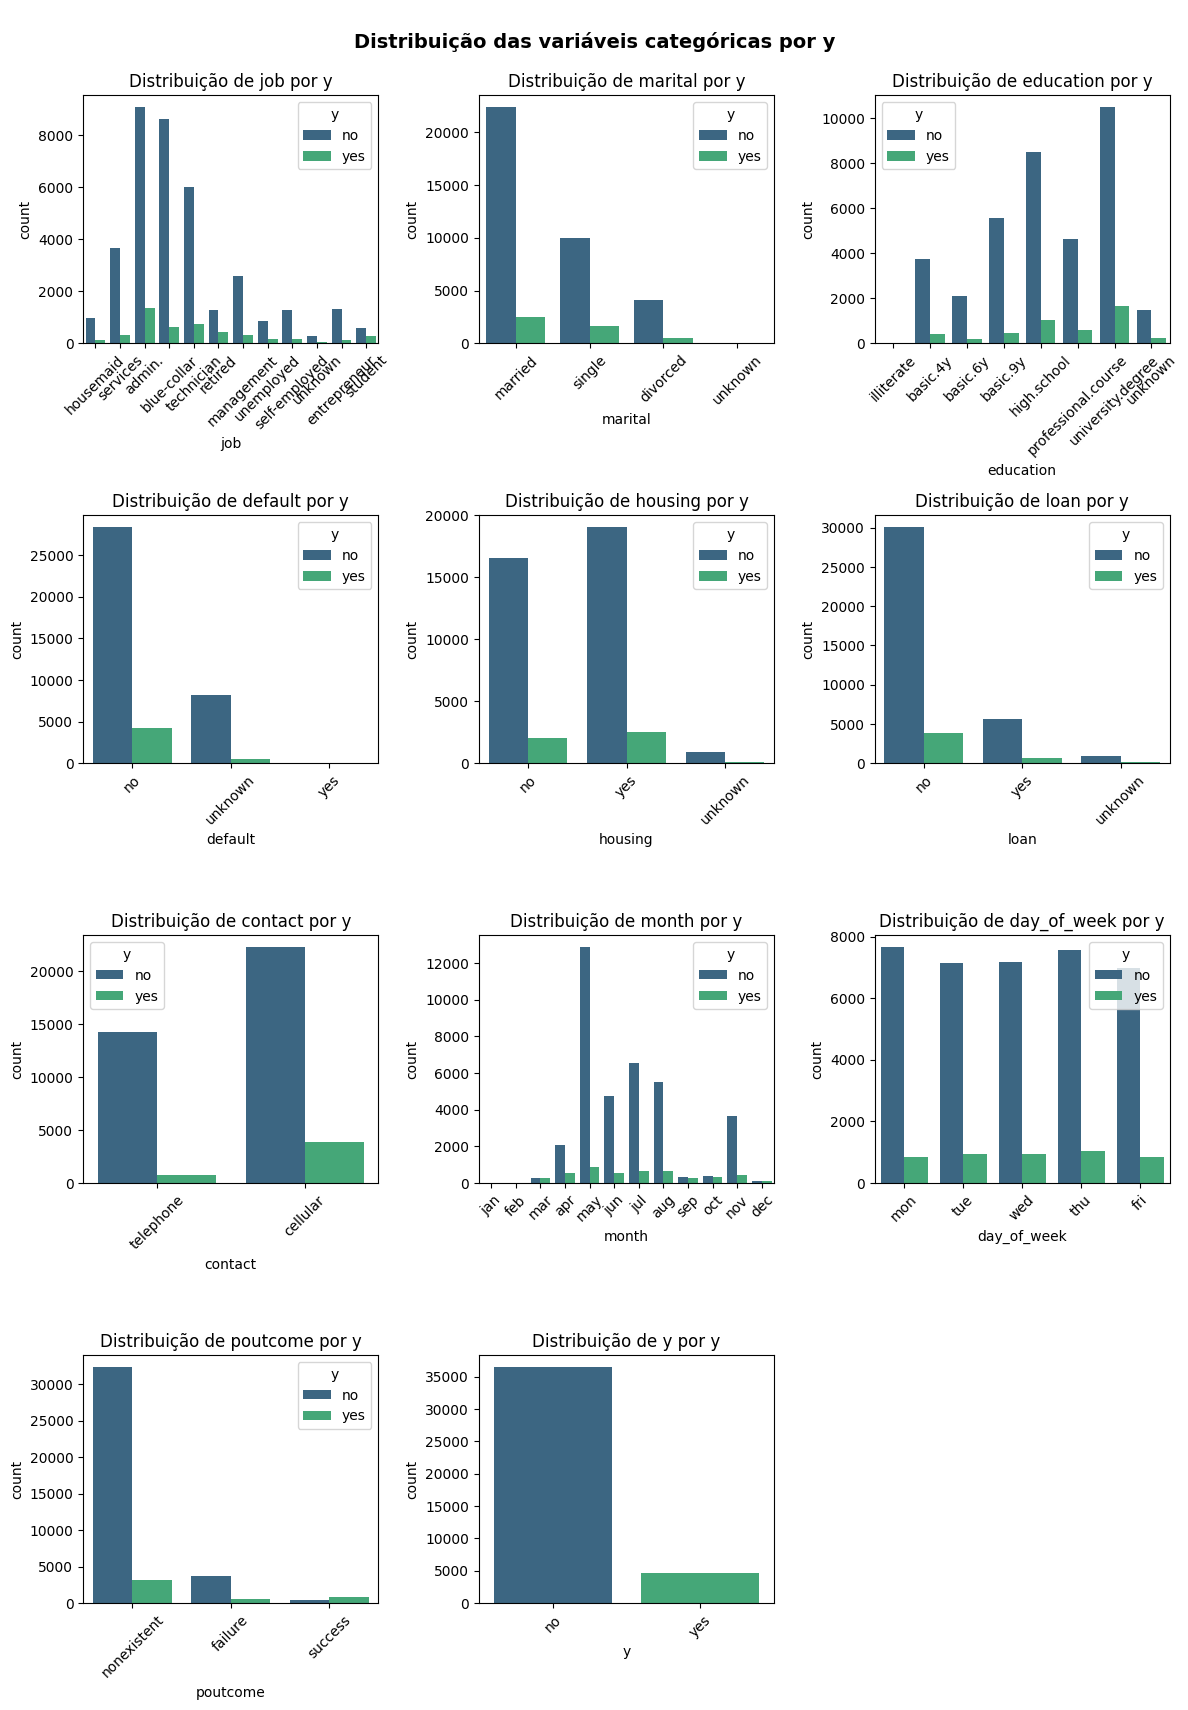

In [ ]:
def plot_categorical_distributions_y(columns, df=None):
    # Definir variável alvo (última do DataFrame)
    target = df.columns[-1]

    rows = (len(columns) + 1) // 2
    plt.figure(figsize=(12, 4 * rows))

    for i, col in enumerate(columns, 1):
        plt.subplot(rows, 3, i)

        # Ordenar a variável 'education' por ordem
        if col == 'education':
            sns.countplot(
                data=df, x=col, hue=target, palette="viridis",
                order=['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
                       'professional.course', 'university.degree', 'unknown']
            )
        # Ordenar a variável 'month' por ordem cronológica
        elif col == 'month':
            sns.countplot(
                data=df, x=col, hue=target, palette="viridis",
                order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
            )
        else:
            sns.countplot(data=df, x=col, hue=target, palette="viridis")

        plt.title(f"Distribuição de {col} por {target}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.suptitle("\nDistribuição das variáveis categóricas por y", y=1.02, fontsize=14, fontweight='bold')
    plt.show()

plot_categorical_distributions_y(categorical_features, df=df)

### Análise das Variáveis Numéricas

<details>
<summary><strong>  Insights preliminares das variáveis numéricas (relacionadas com a campanha)
 </strong> (Expandir)</summary>

* O primeiro gráfico **(age)** representa a distribuição da **idade** dos clientes:
  * a distribuição é enviesada para a direita (forma assimétrica), com a maioria dos clientes concentrados em faixas etárias dos 30-40 anos.

* O segundo gráfico **(duration)** indica a **duração dos contactos realizados**:
  * A duração do contacto tende a ser assimétrica, com muitos contatos de curta duração e poucos de longa duração.
  * A distribuição tende a ser altamente enviesada, com muitas chamadas de curta duração. Isto pode indicar que a maioria dos contactos são rápidos, no entanto alguns podem ser longos e detalhados.

* O terceiro gráfico **(campaign)** evidenciar o **número de contatos realizados** durante a campanha:
  * mostrando uma distribuição enviesada, com a maioria dos clientes sendo contactados poucas vezes e com alguns recebendo muitos.
  * pode ser uma variável importante para identificar a eficácia da campanha, uma vez que contactos excessivos podem refletir clientes difíceis de convencer e com baixas taxas de adesão.

* O gráfico da distribuição dos **pdays** apresenta o **número de dias decorridos desde o último contacto referente a outra campanha de marketing**:
  * a maioria dos valores estão concentrados num ponto específico (pdays=999).
  * necessário analisar estes valores com cuidado, de maneira a identificar se são missing values.

* O gráfico dos  **previous**:
  * é possível verificar uma a distribuição enviesada, desta vez com muitos zeros (previous=0), o que pode significar que a maior parte dos clientes não foram contactados antes. </details>
  
<details>
<summary><strong>  Insights preliminares das variáveis numéricas (não relacionadas com a campanha)
 </strong> (Expandir)</summary>


* O gráfico referente a **taxa de emprego (emp.var.rate)**
  * mostrar variações ao longo do tempo, refletindo mudanças económicas.
  * pode ser interessante ver como essa variável se correlaciona com a adesão ao depósito a prazo.

* O gráfico do **Índice de preços ao consumidor (cons.price.idx)**
  * apresenta uma distribuição relativamente estável, mas com algumas variações que podem refletir mudanças económicas e de mercado.

* Em relação ao gráfico de **Índice de confiança do consumidor (cons.conf.idx)**
  * pode variar ao longo do tempo, refletindo o sentimento económico geral.
  * pode ser interessante ver como as variações afetam a resposta dos clientes às campanhas de marketing.

* A **taxa Euribor a 3 meses (euribor3m)**
  * mostra variações ao longo do tempo, refletindo as condições do mercado financeiro.
  * pode ser útil analisar como essas variações impactam a decisão dos clientes.

* O **número de trabalhadores (nr.employed)**
  * apresenta uma distribuição estável, mas com algumas variações que podem refletir mudanças no mercado de trabalho.

In [ ]:
# ver apenas as visualizações das variáveis numericas relacionadas com a campanha

def plot_numerical_distributions(columns):
    rows = (len(columns) + 2) // 3
    plt.figure(figsize=(12, 4 * rows))
    for i, col in enumerate(columns, 1):
        plt.subplot(rows, 3, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribuição da variável {col}")
    plt.tight_layout()
    plt.suptitle("\nDistribuição das variáveis numéricas", y=1.05, fontsize=14, fontweight='bold')

    plt.show()

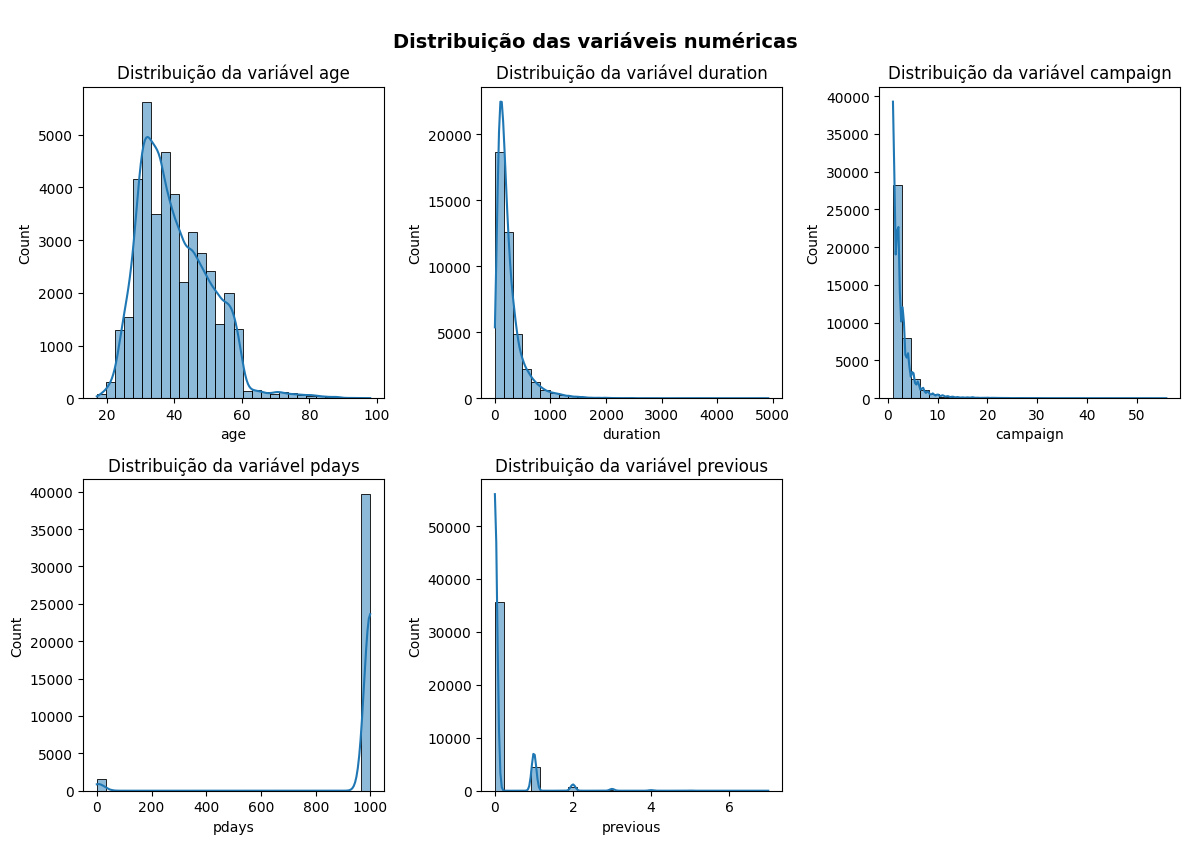

In [ ]:
plot_numerical_distributions(numerical_features_campanha) # ver apenas as variáveis numericas relacionadas com a campanha

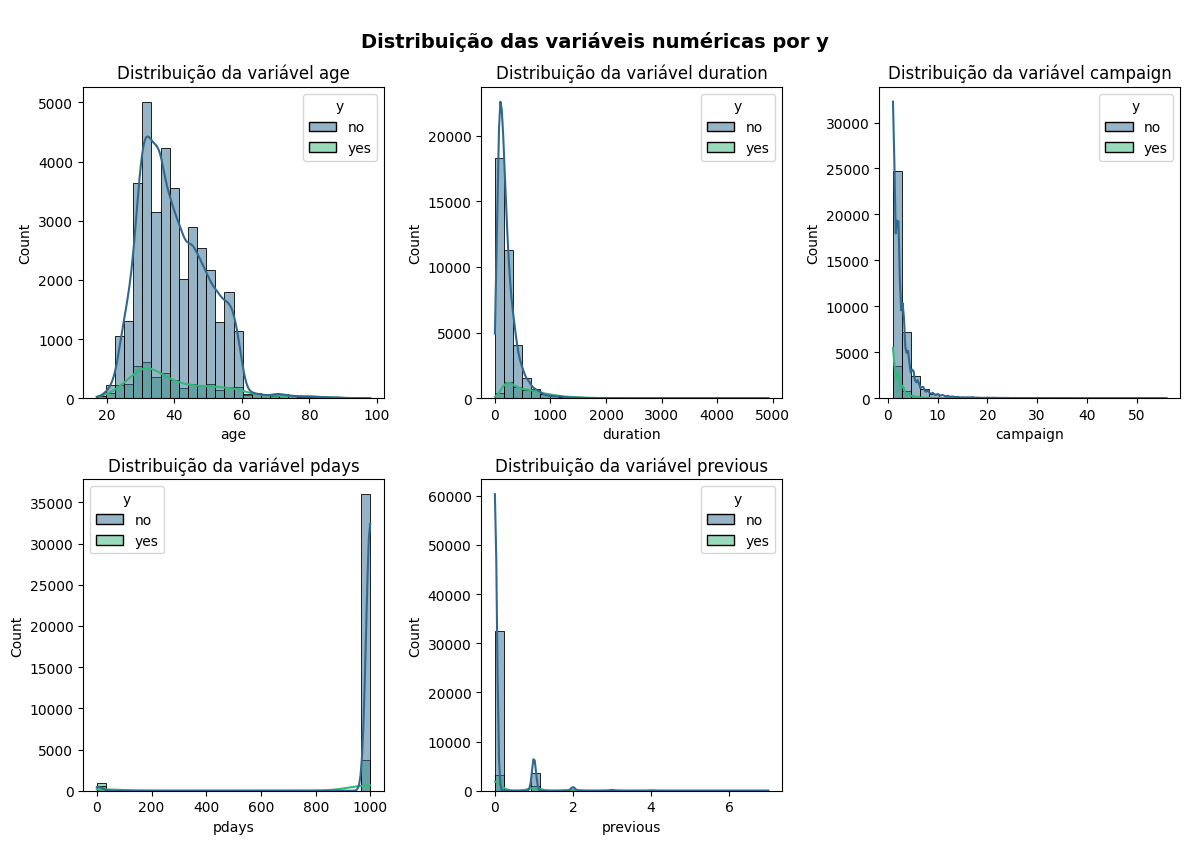

In [ ]:
# adicionar o hue = y para ter uma noção da distribuição com a variável target

def plot_numerical_distributions_Y(columns):
    rows = (len(columns) + 2) // 3
    plt.figure(figsize=(12, 4 * rows))
    for i, col in enumerate(columns, 1):
        plt.subplot(rows, 3, i)
        sns.histplot(data=df, x=col, hue='y', kde=True, bins=30, palette="viridis")
        plt.title(f"Distribuição da variável {col}")
    plt.tight_layout()
    plt.suptitle("\nDistribuição das variáveis numéricas por y", y=1.05, fontsize=14, fontweight='bold')
    plt.show()

plot_numerical_distributions_Y(numerical_features_campanha)

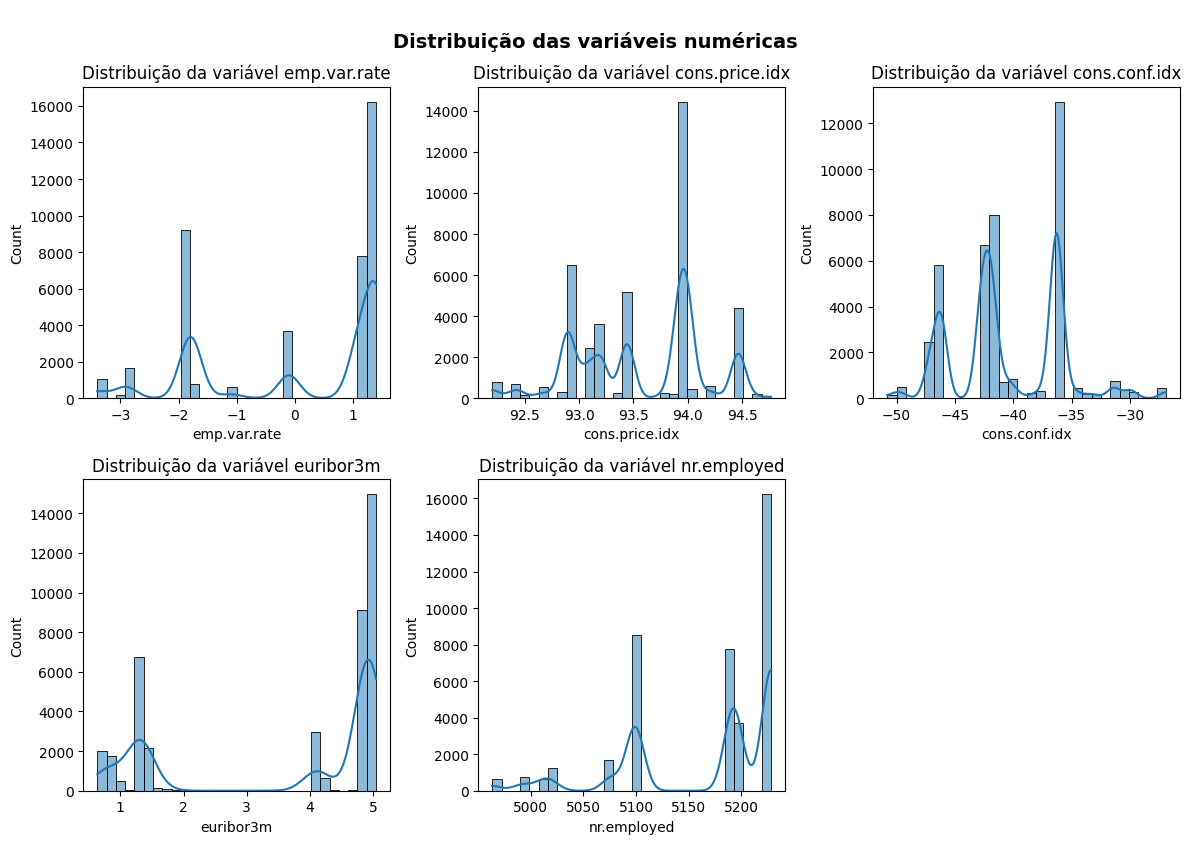

In [ ]:
# ver apenas as visualizações das variáveis numericas relacionadas com os dados universais

plot_numerical_distributions(numerical_features_universais)

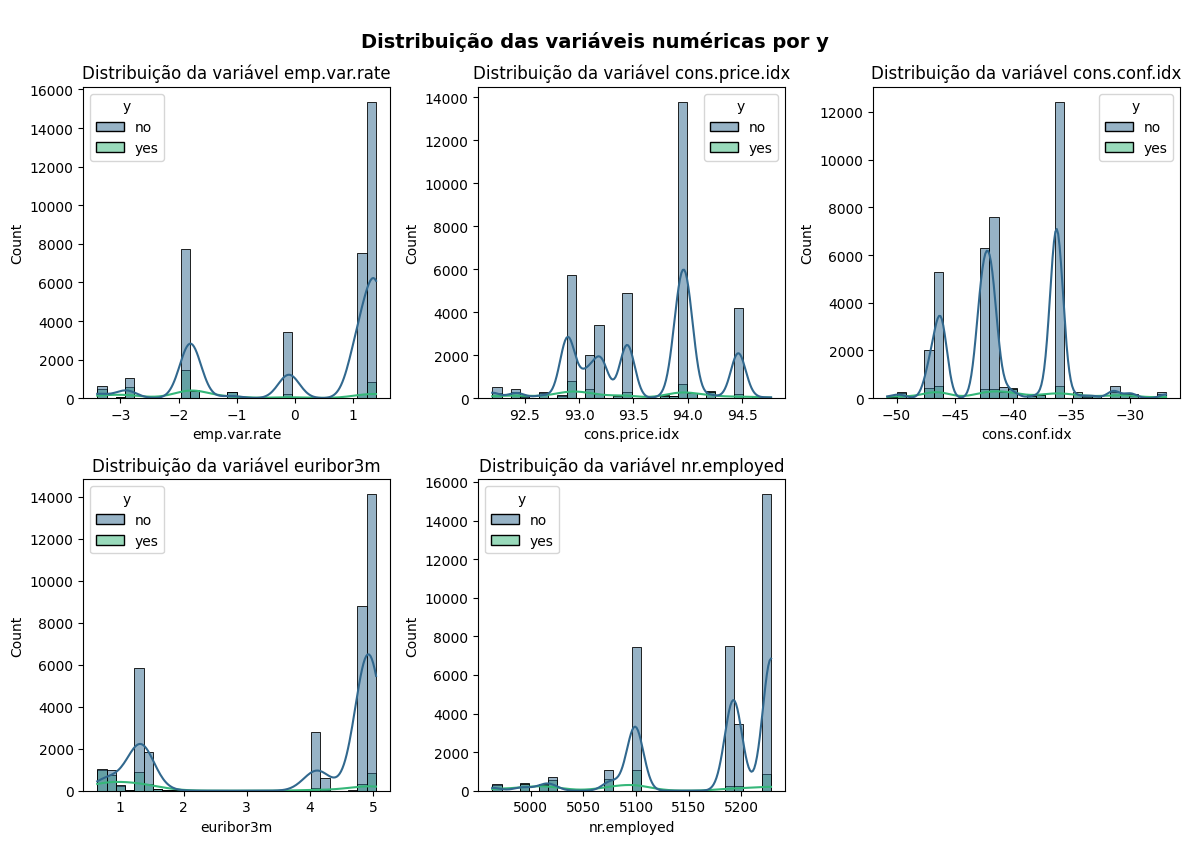

In [ ]:
plot_numerical_distributions_Y(numerical_features_universais)

## Data Cleaning

### Explorar missing values

<details>
<summary><strong>  Identificação dos Missing Values
 </strong> (Expandir)</summary>

* Primeiramente foi necessário verificar as denominações utilizadas que representam valores em falta. Destacamos:
  * o termo “unknown” com:
      * 330 missing values em “job”;
      * 80 em “marital”;
      * 731 em “education”;
      * 8597 em “default”;
      * 990 em “loan”;
  * o termo “nonexistent” com 35563 ocorrências em “poutcome”;
  * o valor “999”, que é usado em 39673 vezes em “pdays”.

### Eliminar missing values

<details>
<summary><strong>  Caso 1: Eliminar variáveis com volume significativo de Missing values: `pdays`, `poutcome`, `default`.
 </strong> (Expandir)</summary>

**Problema:** As variáveis “pdays”, “poutcome” e “default” apresentam uma quantidade significativa de missing values (96.32%, 86.34% e 20.87%, respetivamente).

**Estratégia:** Remover as colunas com muitos missing values

In [ ]:
missing_values = ['unknown', 'nonexistent', 999]

results = []

for column in df.columns:
    missing_count = df[column][df[column].isin(missing_values)].count()
    percentage = (missing_count / len(df)) * 100
    temp_df = df[df[column].isin(missing_values)]

    # contar ocorrências 'y' para cada valor em falta
    y_counts = temp_df['y'].value_counts()
    y_no = y_counts.get('no', 0)
    y_yes = y_counts.get('yes', 0)

    # adicionar percentagens
    total_missing_y = y_no + y_yes
    y_no_percent = (y_no / total_missing_y * 100) if total_missing_y > 0 else 0
    y_yes_percent = (y_yes / total_missing_y * 100) if total_missing_y > 0 else 0

    results.append([column, missing_count, f"{percentage:.2f}%", y_no, f"{y_no_percent:.2f}%", y_yes, f"{y_yes_percent:.2f}%"])


results_df = pd.DataFrame(results, columns=["Column Name", "Missing Values", "Frequency", "y = no", "% no", "y = yes", "% yes"])
results_df


Column Name  Missing Values Frequency  y = no    % no  y = yes   % yes
0              age               0     0.00%       0   0.00%        0   0.00%
1              job             330     0.80%     293  88.79%       37  11.21%
2          marital              80     0.19%      68  85.00%       12  15.00%
3        education            1731     4.20%    1480  85.50%      251  14.50%
4          default            8597    20.87%    8154  94.85%      443   5.15%
5          housing             990     2.40%     883  89.19%      107  10.81%
6             loan             990     2.40%     883  89.19%      107  10.81%
7          contact               0     0.00%       0   0.00%        0   0.00%
8            month               0     0.00%       0   0.00%        0   0.00%
9      day_of_week               0     0.00%       0   0.00%        0   0.00%
10        duration               2     0.00%       1  50.00%        1  50.00%
11        campaign               0     0.00%       0   0.00%        0   0.00%
12           pdays           39673    96.32%   36000  90.74%     3673   9.26%
13        previous               0     0.00%       0   0.00%        0   0.00%
14        poutcome           35563    86.34%   32422  91.17%     3141   8.83%
15    emp.var.rate               0     0.00%       0   0.00%        0   0.00%
16  cons.price.idx               0     0.00%       0   0.00%        0   0.00%
17   cons.conf.idx               0     0.00%       0   0.00%        0   0.00%
18       euribor3m               0     0.00%       0   0.00%        0   0.00%
19     nr.employed               0     0.00%       0   0.00%        0   0.00%
20               y               0     0.00%       0   0.00%        0   0.00%

In [ ]:
# Eliminar variáveis "pdays", "poutcome" e "default"

# Drop columns
df = df.drop(['default', 'pdays', 'poutcome'], axis=1)

# atualizar listas de features
numerical_features = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
                      'cons.conf.idx', 'euribor3m', 'nr.employed']  # sem 'pdays'
numerical_features_campanha = ['age', 'duration', 'campaign', 'previous']  # sem 'pdays'

categorical_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact',
                        'month', 'day_of_week', 'y']  # sem 'poutcome' e 'default'

print('Dadas atualizadas: \n')
df.describe(include='all')

Dadas atualizadas: 



age     job  marital          education housing   loan  \
count   41188.00000   41188    41188              41188   41188  41188   
unique          NaN      12        4                  8       3      3   
top             NaN  admin.  married  university.degree     yes     no   
freq            NaN   10422    24928              12168   21576  33950   
mean       40.02406     NaN      NaN                NaN     NaN    NaN   
std        10.42125     NaN      NaN                NaN     NaN    NaN   
min        17.00000     NaN      NaN                NaN     NaN    NaN   
25%        32.00000     NaN      NaN                NaN     NaN    NaN   
50%        38.00000     NaN      NaN                NaN     NaN    NaN   
75%        47.00000     NaN      NaN                NaN     NaN    NaN   
max        98.00000     NaN      NaN                NaN     NaN    NaN   

         contact  month day_of_week      duration      campaign      previous  \
count      41188  41188       41188  41188.000000  41188.000000  41188.000000   
unique         2     10           5           NaN           NaN           NaN   
top     cellular    may         thu           NaN           NaN           NaN   
freq       26144  13769        8623           NaN           NaN           NaN   
mean         NaN    NaN         NaN    258.285010      2.567593      0.172963   
std          NaN    NaN         NaN    259.279249      2.770014      0.494901   
min          NaN    NaN         NaN      0.000000      1.000000      0.000000   
25%          NaN    NaN         NaN    102.000000      1.000000      0.000000   
50%          NaN    NaN         NaN    180.000000      2.000000      0.000000   
75%          NaN    NaN         NaN    319.000000      3.000000      0.000000   
max          NaN    NaN         NaN   4918.000000     56.000000      7.000000   

        emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count   41188.000000    41188.000000   41188.000000  41188.000000   
unique           NaN             NaN            NaN           NaN   
top              NaN             NaN            NaN           NaN   
freq             NaN             NaN            NaN           NaN   
mean        0.081886       93.575664     -40.502600      3.621291   
std         1.570960        0.578840       4.628198      1.734447   
min        -3.400000       92.201000     -50.800000      0.634000   
25%        -1.800000       93.075000     -42.700000      1.344000   
50%         1.100000       93.749000     -41.800000      4.857000   
75%         1.400000       93.994000     -36.400000      4.961000   
max         1.400000       94.767000     -26.900000      5.045000   

         nr.employed      y  
count   41188.000000  41188  
unique           NaN      2  
top              NaN     no  
freq             NaN  36548  
mean     5167.035911    NaN  
std        72.251528    NaN  
min      4963.600000    NaN  
25%      5099.100000    NaN  
50%      5191.000000    NaN  
75%      5228.100000    NaN  
max      5228.100000    NaN

### Curiosidades Missing Values

##### **Curiosidade:** Como os unknown de Housing e Loan se distribuem noutras variáveis

<details>
<summary><strong>  housing e loan
</strong> (Expandir)</summary>

Percebemos que os 990 missing em housing são os mesmos 990 missing no loan
se tirarmos estes registos perdemos 107 registos com y=yes.


In [ ]:
# Filtrar 'unknown' de housing e loan

# Contar quantas vezes "unknown" aparece simultaneamente em "housing" e "loan"
unknown_housing_loan = df[(df["housing"] == "unknown") & (df["loan"] == "unknown")].shape[0]
print(f"Número de registros com 'unknown' em ambas as colunas: {unknown_housing_loan}")
print('\n')

# Verificar quais profissões possuem mais valores "unknown"
print(df[(df["housing"] == "unknown") & (df["loan"] == "unknown")]["job"].value_counts())
print('\n')

# Verificar quais estados civis possuem mais valores "unknown"
print(df[(df["housing"] == "unknown") & (df["loan"] == "unknown")]["marital"].value_counts())
print('\n')


Número de registros com 'unknown' em ambas as colunas: 990


job
blue-collar      240
admin.           227
technician       147
services         101
management        71
retired           44
self-employed     40
entrepreneur      36
housemaid         29
unemployed        27
student           23
unknown            5
Name: count, dtype: int64


marital
married     588
single      280
divorced    121
unknown       1
Name: count, dtype: int64




##### **Curiosidade:** Como os unknown de Education se distribuem noutras variáveis


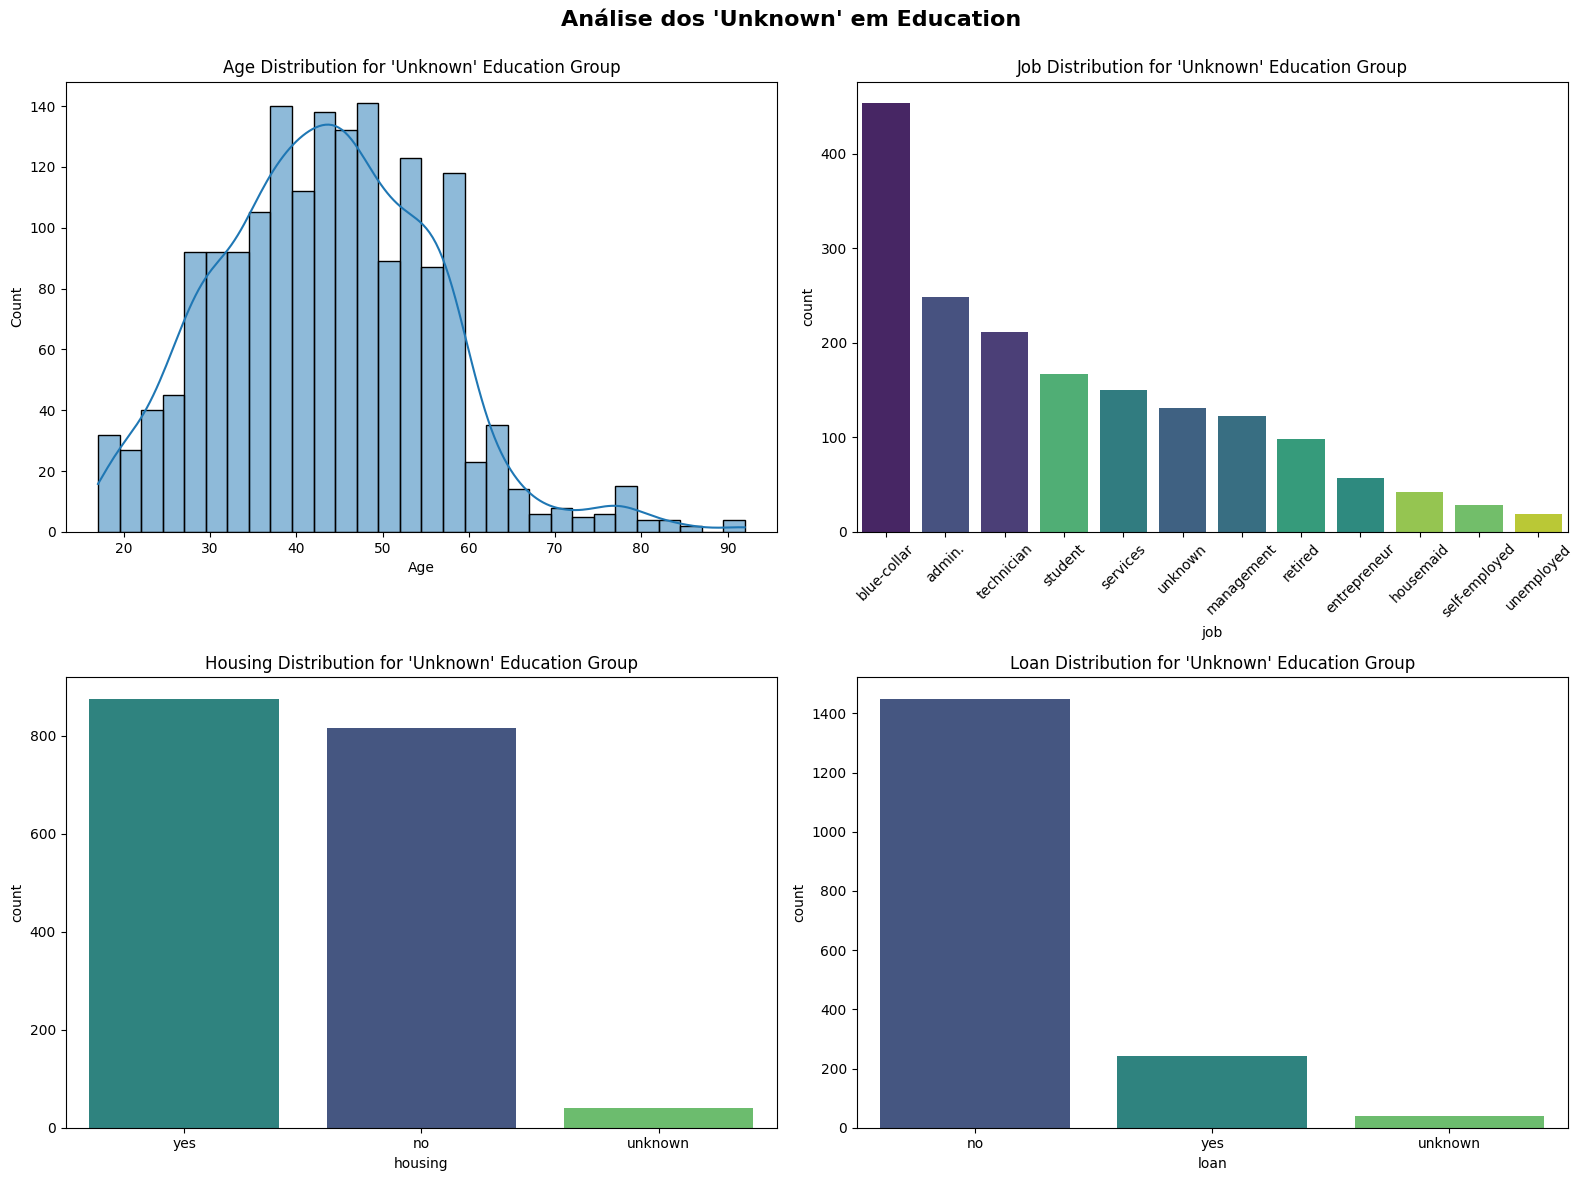


 y                          no       yes
education                              
basic.4y             0.897510  0.102490
basic.6y             0.917976  0.082024
basic.9y             0.921754  0.078246
high.school          0.891645  0.108355
illiterate           0.777778  0.222222
professional.course  0.886515  0.113485
university.degree    0.862755  0.137245
unknown              0.854997  0.145003


In [ ]:
# Em EDUCATION - ver como os unknowns se comportam e distribuem nas restantes variáveis:

# Filtrar 'unknown' de education
unknown_education = df[df['education'] == 'unknown']

# Referência cruzada com outras features (numa figura com 4 subplots)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns

# 1. Age (ditribuição das idades de unknown)
sns.histplot(unknown_education['age'], kde=True, bins=30, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution for 'Unknown' Education Group")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")

# 2. Job (ditribuição das profissões de unknown)
sns.countplot(data=unknown_education, x='job', hue='job',
              order=unknown_education['job'].value_counts().index,
              palette='viridis', legend=False, ax=axes[0, 1])
axes[0, 1].set_title("Job Distribution for 'Unknown' Education Group")
axes[0, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# 3. Housing (ditribuição de housing)
sns.countplot(data=unknown_education, x='housing', hue='housing',
              order=unknown_education['housing'].value_counts().index,
              palette='viridis', legend=False, ax=axes[1, 0])
axes[1, 0].set_title("Housing Distribution for 'Unknown' Education Group")

# 4. Loan distribution (ditribuição de loan)
sns.countplot(data=unknown_education, x='loan', hue='loan',
              order=unknown_education['loan'].value_counts().index,
              palette='viridis', legend=False, ax=axes[1, 1])
axes[1, 1].set_title("Loan Distribution for 'Unknown' Education Group")

# ajustar layout e mostrar figura
fig.suptitle("Análise dos 'Unknown' em Education \n", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Comparar a taxa de sucesso (y = sim) no grupo de 'unknown' de education
education_comparison = df.groupby('education')['y'].value_counts(normalize=True).unstack()
print('\n', education_comparison)


##### **Curiosidade:** Como os unknown de Education e Job se distribuem noutras variáveis

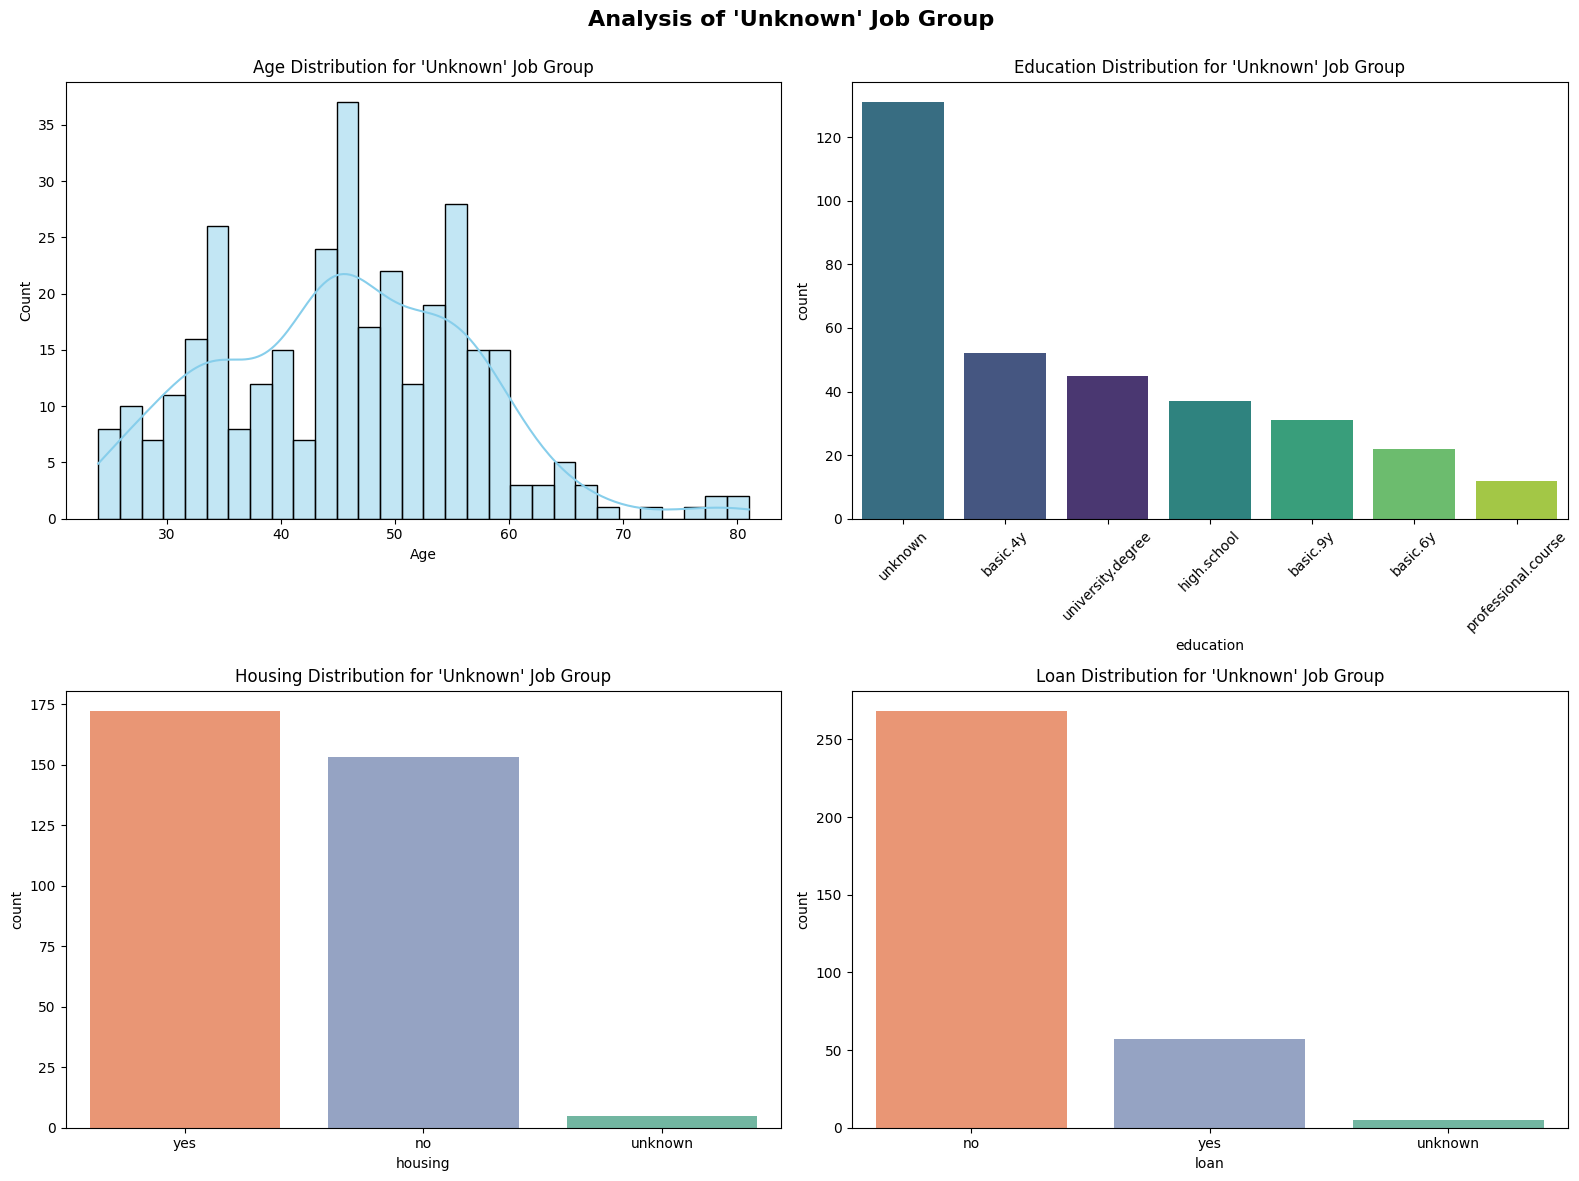

y                    no       yes
job                              
admin.         0.870274  0.129726
blue-collar    0.931057  0.068943
entrepreneur   0.914835  0.085165
housemaid      0.900000  0.100000
management     0.887825  0.112175
retired        0.747674  0.252326
self-employed  0.895144  0.104856
services       0.918619  0.081381
student        0.685714  0.314286
technician     0.891740  0.108260
unemployed     0.857988  0.142012
unknown        0.887879  0.112121


In [ ]:
# Em JOB - ver como os unknowns se comportam e distribuem nas restantes variáveis:

# Filtrar 'unknown' de job
unknown_job = df[df['job'] == 'unknown']

# Referência cruzada com outras features (numa figura com 4 subplots)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2 rows, 2 columns

# 1. Age (ditribuição das idades de unknown)
sns.histplot(unknown_job['age'], kde=True, color='skyblue', bins=30, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution for 'Unknown' Job Group")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")

# 2. Education (ditribuição de education)
sns.countplot(data=unknown_job, x='education', hue='education',
              order=unknown_job['education'].value_counts().index,
              palette='viridis', legend=False, ax=axes[0, 1])  # legend=False para evitar redundância
axes[0, 1].set_title("Education Distribution for 'Unknown' Job Group")
axes[0, 1].tick_params(axis='x', rotation=45)  # Rodar as etiquetas do eixo x

# 3. Housing (ditribuição de housing)
sns.countplot(data=unknown_job, x='housing', hue='housing',
              order=unknown_job['housing'].value_counts().index,
              palette='Set2', legend=False, ax=axes[1, 0])
axes[1, 0].set_title("Housing Distribution for 'Unknown' Job Group")

# 4. Loan distribution (ditribuição de loan)
sns.countplot(data=unknown_job, x='loan', hue='loan',
              order=unknown_job['loan'].value_counts().index,
              palette='Set2', legend=False, ax=axes[1, 1])
axes[1, 1].set_title("Loan Distribution for 'Unknown' Job Group")

# ajustar layout e mostrar figura
fig.suptitle("Analysis of 'Unknown' Job Group \n", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Comparar a taxa de sucesso (y = sim) no grupo de 'unknown' de Job
education_comparison = df.groupby('job')['y'].value_counts(normalize=True).unstack()
print(education_comparison)

### Substituição dos valores unknown

<details>
<summary><strong> Caso 2: Substituíção de valores "unknown"
 </strong> (Expandir)</summary>

Optamos por manter as linhas "unknown" nas colunas:
 * Apesar de existirem 2751 registos (6.7% do total) com o valor "unknown",  a sua remoção implicaria a perda de 363 casos da classe "yes" na variável alvo (7.8% do total de "yes").
 * Por esta razão, optou-se por manter estes registos e tratar os "unknown" de forma específica cada coluna.


Desta forma, como as colunas são variáveis categóricas, a estratégia mais apropriada é substituir os “unknown” pela moda.
* `education` -> `university.degree` (moda)
* `job` -> `admin` (moda)
* `marital` -> `married` (moda)
* `housing` -> `yes` (moda)
* `loan` -> `no` (moda)

In [ ]:
# Substituição de valores: education, job, marital, housing, loan -> moda

# subsituir unknown education pela moda de education
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])

# subsituir unknown job pela moda de job
df['job'] = df['job'].replace('unknown', df['job'].mode()[0])

# subsituir unknown marital pela moda de marital
df['marital'] = df['marital'].replace('unknown', df['marital'].mode()[0])

# subsituir unknown housing pela moda de housing
df['housing'] = df['housing'].replace('unknown', df['housing'].mode()[0])

# subsituir unknown loan pela moda de loan
df['loan'] = df['loan'].replace('unknown', df['loan'].mode()[0])

# Mostrar resultados
print(df['education'].value_counts(), '\n')
print(df['job'].value_counts(), '\n')
print(df['marital'].value_counts(), '\n')
print(df['housing'].value_counts(), '\n')
print(df['loan'].value_counts(), '\n')

education
university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64 

job
admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64 

marital
married     25008
single      11568
divorced     4612
Name: count, dtype: int64 

housing
yes    22566
no     18622
Name: count, dtype: int64 

loan
no     34940
yes     6248
Name: count, dtype: int64 



### Duplicados

<details>
<summary><strong> Insights Duplicados
 </strong> (Expandir)</summary>

Foram identificadoa um pequeno conjunto de linhas duplicadas, correspondendo a aproximadamente 0,029% do total.
 * As linhas foram removidos sem impacto significativo na distribuição da variável y, uma vez que as proporções das classes "no" (88,5%) e "yes" (11,5%) permaneceram inalteradas antes e depois da remoção.
 * Desta forma, conseguimos manter o equilíbrio entre as classes, sem causar qualquer enviesamento.

In [ ]:
# verificar se tem linhas duplicadas e eliminar

df[df.duplicated(keep=False)]

age          job   marital            education housing loan  \
236     56  blue-collar   married             basic.4y      no   no   
1265    39  blue-collar   married             basic.6y      no   no   
1266    39  blue-collar   married             basic.6y      no   no   
5664    56  blue-collar   married             basic.4y      no   no   
12260   36      retired   married    university.degree      no   no   
12261   36      retired   married    university.degree      no   no   
14155   27   technician    single  professional.course      no   no   
14234   27   technician    single  professional.course      no   no   
16819   47   technician  divorced          high.school     yes   no   
16956   47   technician  divorced          high.school     yes   no   
18464   32   technician    single  professional.course     yes   no   
18465   32   technician    single  professional.course     yes   no   
19451   33       admin.   married    university.degree     yes   no   
19608   33       admin.   married    university.degree     yes   no   
20072   55     services   married          high.school      no   no   
20216   55     services   married          high.school      no   no   
20531   41   technician   married  professional.course     yes   no   
20534   41   technician   married  professional.course     yes   no   
25183   39       admin.   married    university.degree      no   no   
25217   39       admin.   married    university.degree      no   no   
28476   24     services    single          high.school     yes   no   
28477   24     services    single          high.school     yes   no   
32505   35       admin.   married    university.degree     yes   no   
32516   35       admin.   married    university.degree     yes   no   
36950   45       admin.   married    university.degree      no   no   
36951   45       admin.   married    university.degree      no   no   
38255   71      retired    single    university.degree      no   no   
38281   71      retired    single    university.degree      no   no   

         contact month day_of_week  duration  campaign  previous  \
236    telephone   may         mon       136         1         0   
1265   telephone   may         thu       124         1         0   
1266   telephone   may         thu       124         1         0   
5664   telephone   may         mon       136         1         0   
12260  telephone   jul         thu        88         1         0   
12261  telephone   jul         thu        88         1         0   
14155   cellular   jul         mon       331         2         0   
14234   cellular   jul         mon       331         2         0   
16819   cellular   jul         thu        43         3         0   
16956   cellular   jul         thu        43         3         0   
18464   cellular   jul         thu       128         1         0   
18465   cellular   jul         thu       128         1         0   
19451   cellular   aug         thu        59         1         0   
19608   cellular   aug         thu        59         1         0   
20072   cellular   aug         mon        33         1         0   
20216   cellular   aug         mon        33         1         0   
20531   cellular   aug         tue       127         1         0   
20534   cellular   aug         tue       127         1         0   
25183   cellular   nov         tue       123         2         0   
25217   cellular   nov         tue       123         2         0   
28476   cellular   apr         tue       114         1         0   
28477   cellular   apr         tue       114         1         0   
32505   cellular   may         fri       348         4         0   
32516   cellular   may         fri       348         4         0   
36950   cellular   jul         thu       252         1         0   
36951   cellular   jul         thu       252         1         0   
38255  telephone   oct         tue       120         1         0   
38281  telephone   oct         tue       12

In [ ]:
# apagar registos duplicados
df = df.drop_duplicates()
df.shape

(41174, 18)

### Outliers
<details>
<summary><strong>  Análise Outliers
 </strong> (Expandir)</summary>

Após análise dos boxplot das variáveis verificou-se a presença de possíveis outliers, que podem ser prejudiciais para a validação do modelo e para a interpretação dos resultados que se obtêm.
 * De maneira a substituir os valores extremos de todas as variáveis que possuíam outliers, aplicou-se o **processo de winsorizing**, para minimizar a influência dos outliers nas variáveis **"age", "duration" e "campaign"**.
 * Apesar do Boxplot da variável **"previous"** evidenciar possíveis outliers, não vão ser identificados como tal, uma vez que previous = 0 representa que que não houve contactos anteriores bem sucedidos com este cliente. Como tal, o valor tem um significado específico, e por isso não vai ser tratado como outlier.



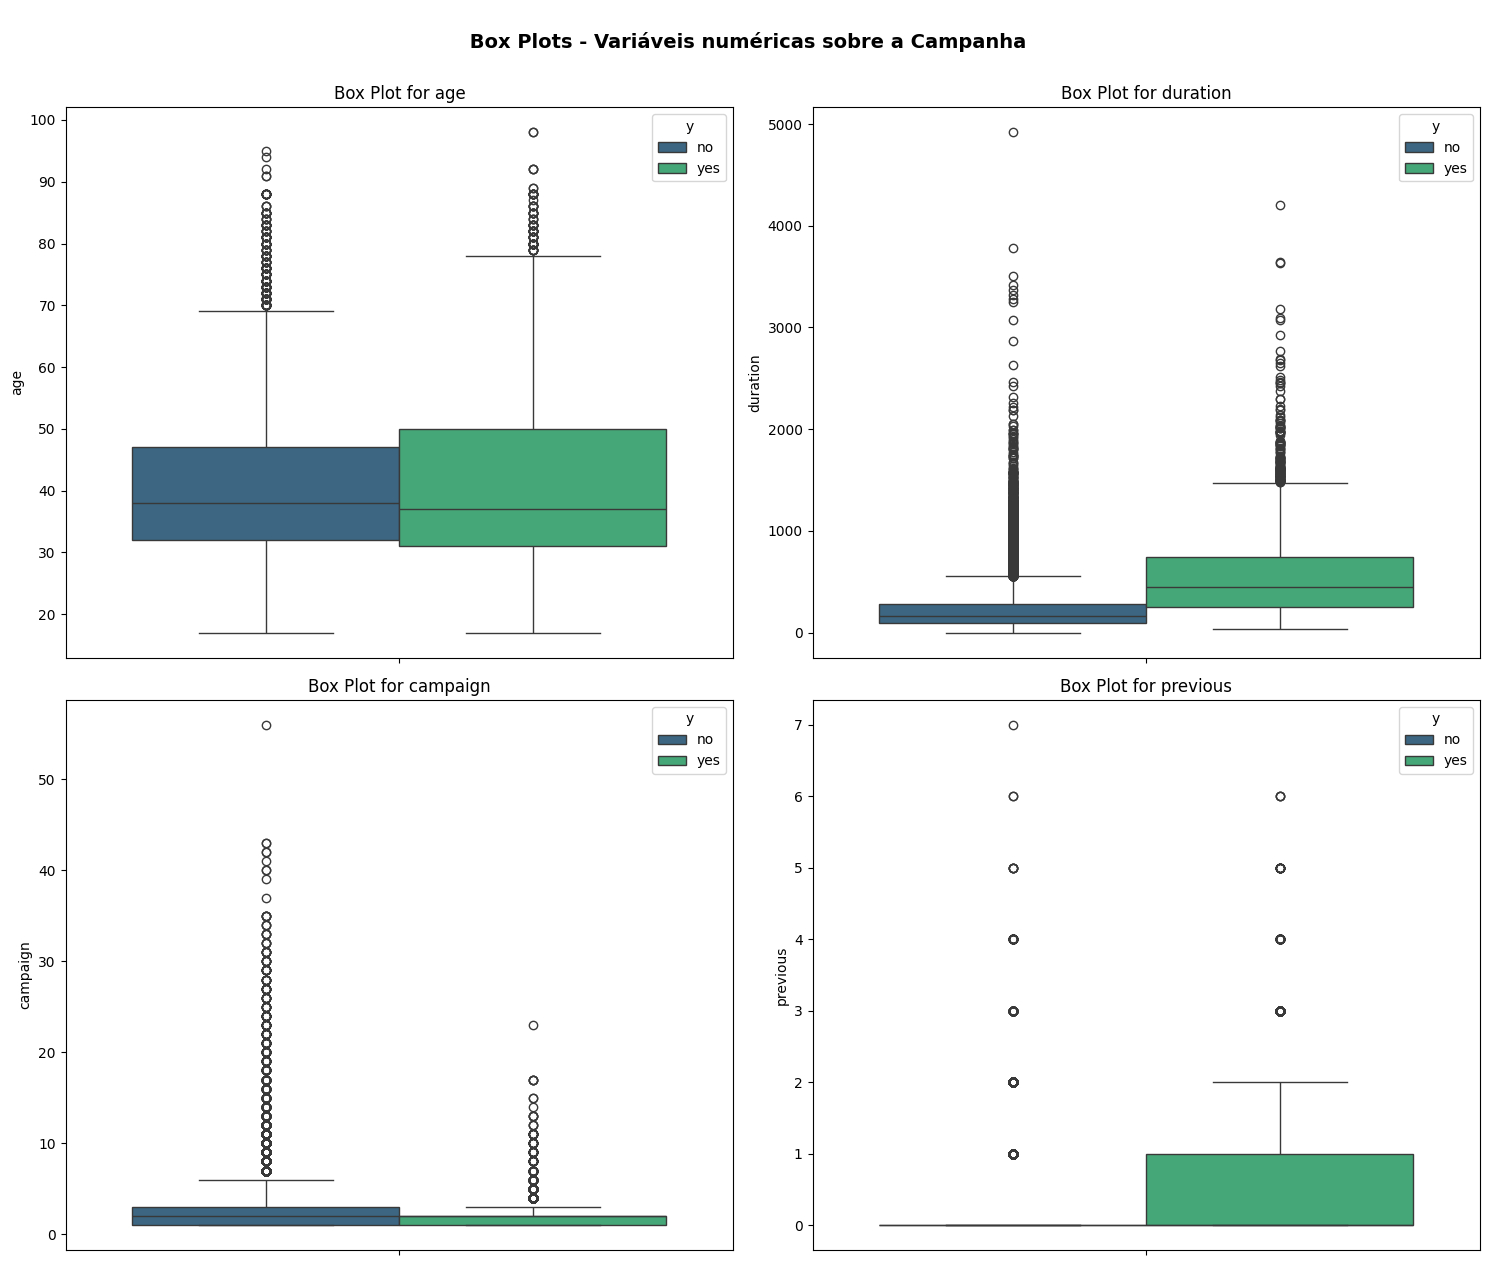

In [ ]:
# subplot para boxplot das variáveis numericas da campanha
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes = axes.flatten()

# loop para cada plot / box plot
for i, feature in enumerate(numerical_features_campanha):
    sns.boxplot(y=df[feature], hue=df['y'], ax=axes[i], palette="viridis")

    # títulos e labels
    axes[i].set_title(f"Box Plot for {feature}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel(feature)

# ajustar layout e espaçamento
plt.tight_layout()
plt.suptitle('\n Box Plots - Variáveis numéricas sobre a Campanha', y=1.05, fontsize=14, fontweight='bold')
plt.show()

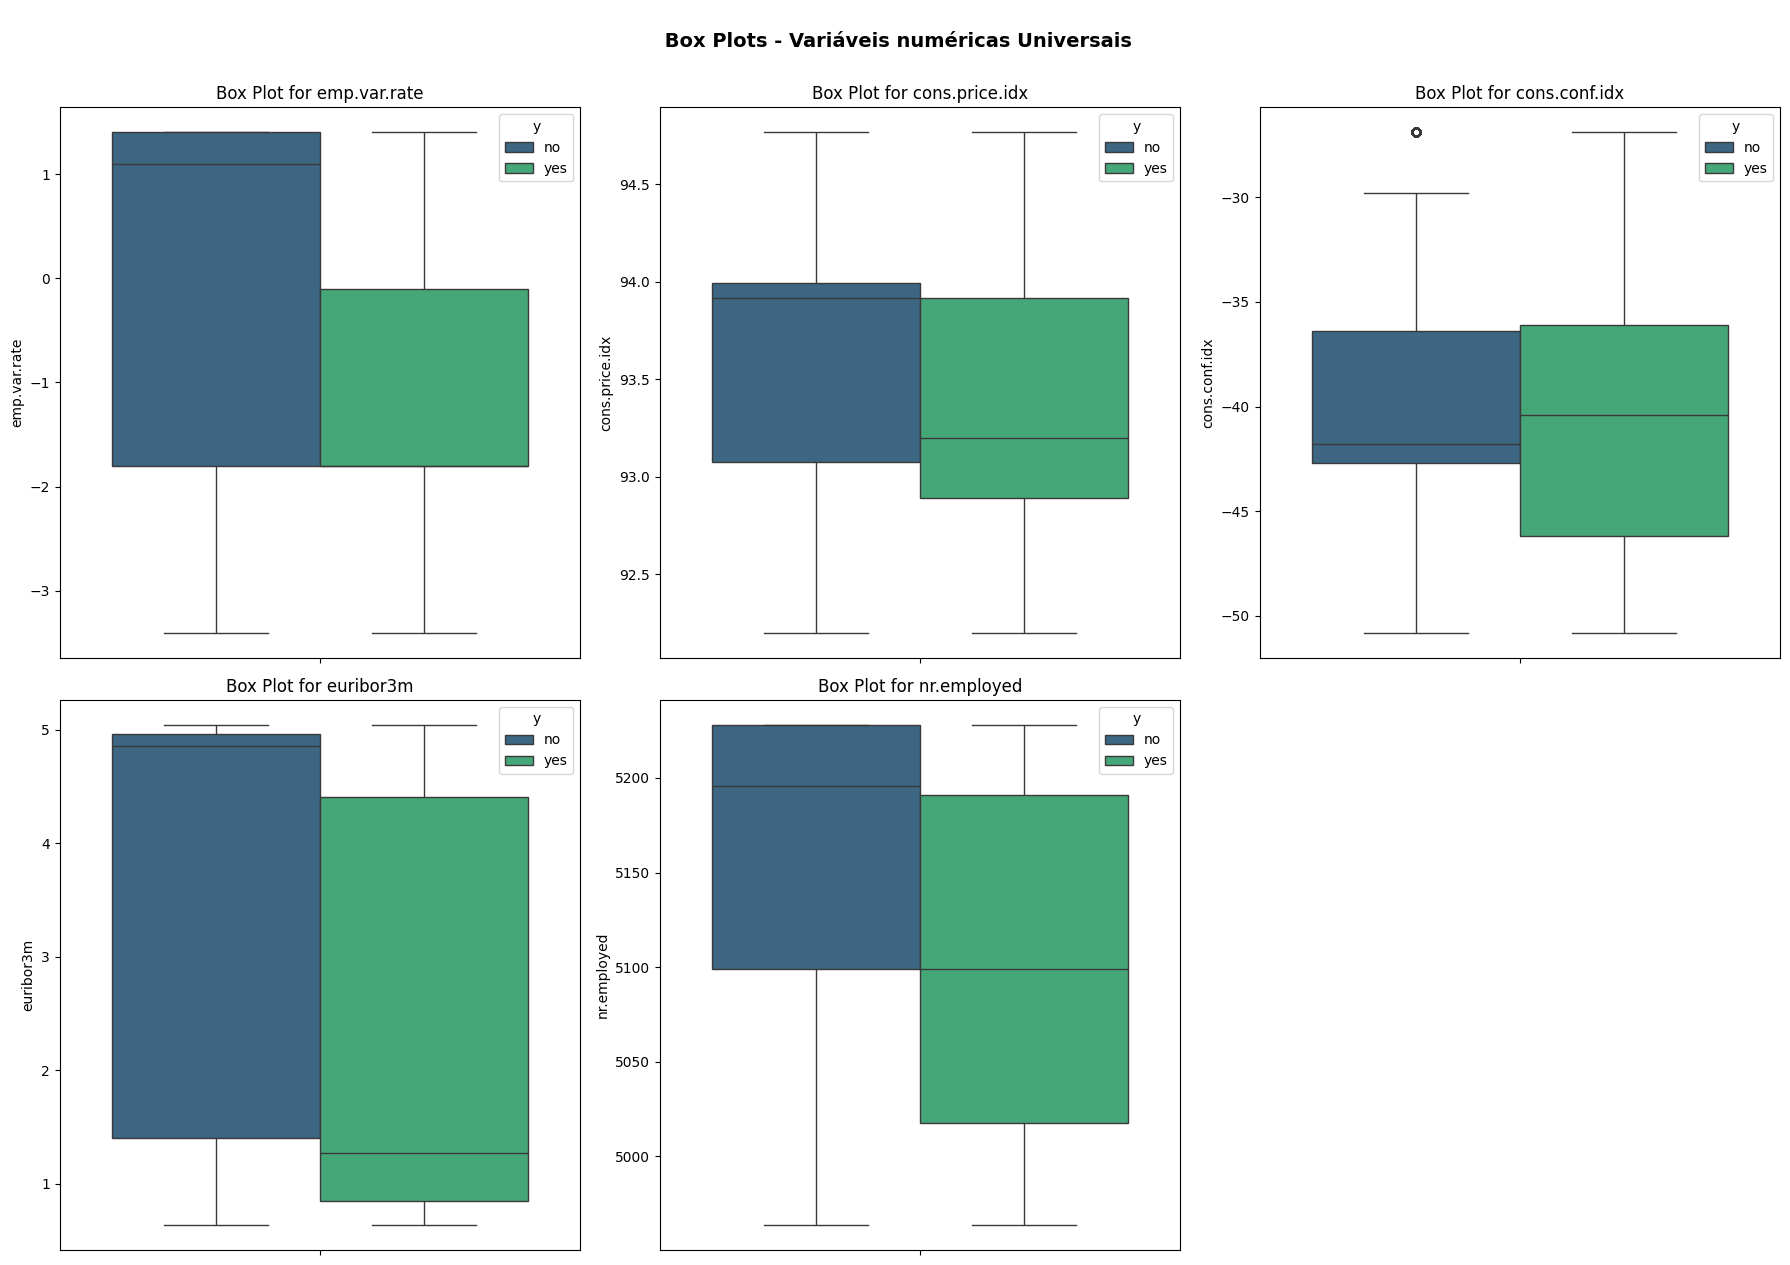

In [ ]:
# subplot para boxplot das variáveis numericas universais

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes = axes.flatten()

# loop para cada plot / box plot
for i, feature in enumerate(numerical_features_universais):
    sns.boxplot(y=df[feature], hue=df['y'], ax=axes[i], palette="viridis")

    axes[i].set_title(f"Box Plot for {feature}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel(feature)

# esconder subplots não usados
axes[5].axis('off')

# ajustar layout e esoaçamento
plt.tight_layout()
plt.suptitle('\n Box Plots - Variáveis numéricas Universais', y=1.05, fontsize=14, fontweight='bold')
plt.show()


<details>
<summary><strong>  Amplitude Interquartil
 </strong> (Expandir)</summary>

**Identificação de Outliers Severos:** São considerados outliers severos os valores que se encontram fora dos limites de 3x Amplitude Interquartil.

**Método de Tratamento:**

* Os valores abaixo do limite inferior (Q1 - 3xIQR) são substituídos pelo valor do quantil 1%.
* Os valores acima do limite superior (Q3 + 3xIQR) são substituídos pelo valor do quantil 99%.

**Justificação da Escolha dos Quantils 1% e 99%:**

* Optou-se pelos quantis de 1% e 99% para garantir que a distribuição original dos dados é mantida o máximo possível.
* Na variável "duration", onde valores altos podem indicar comportamentos específicos de clientes, o uso destes quantis garante que a informação seja mantida.

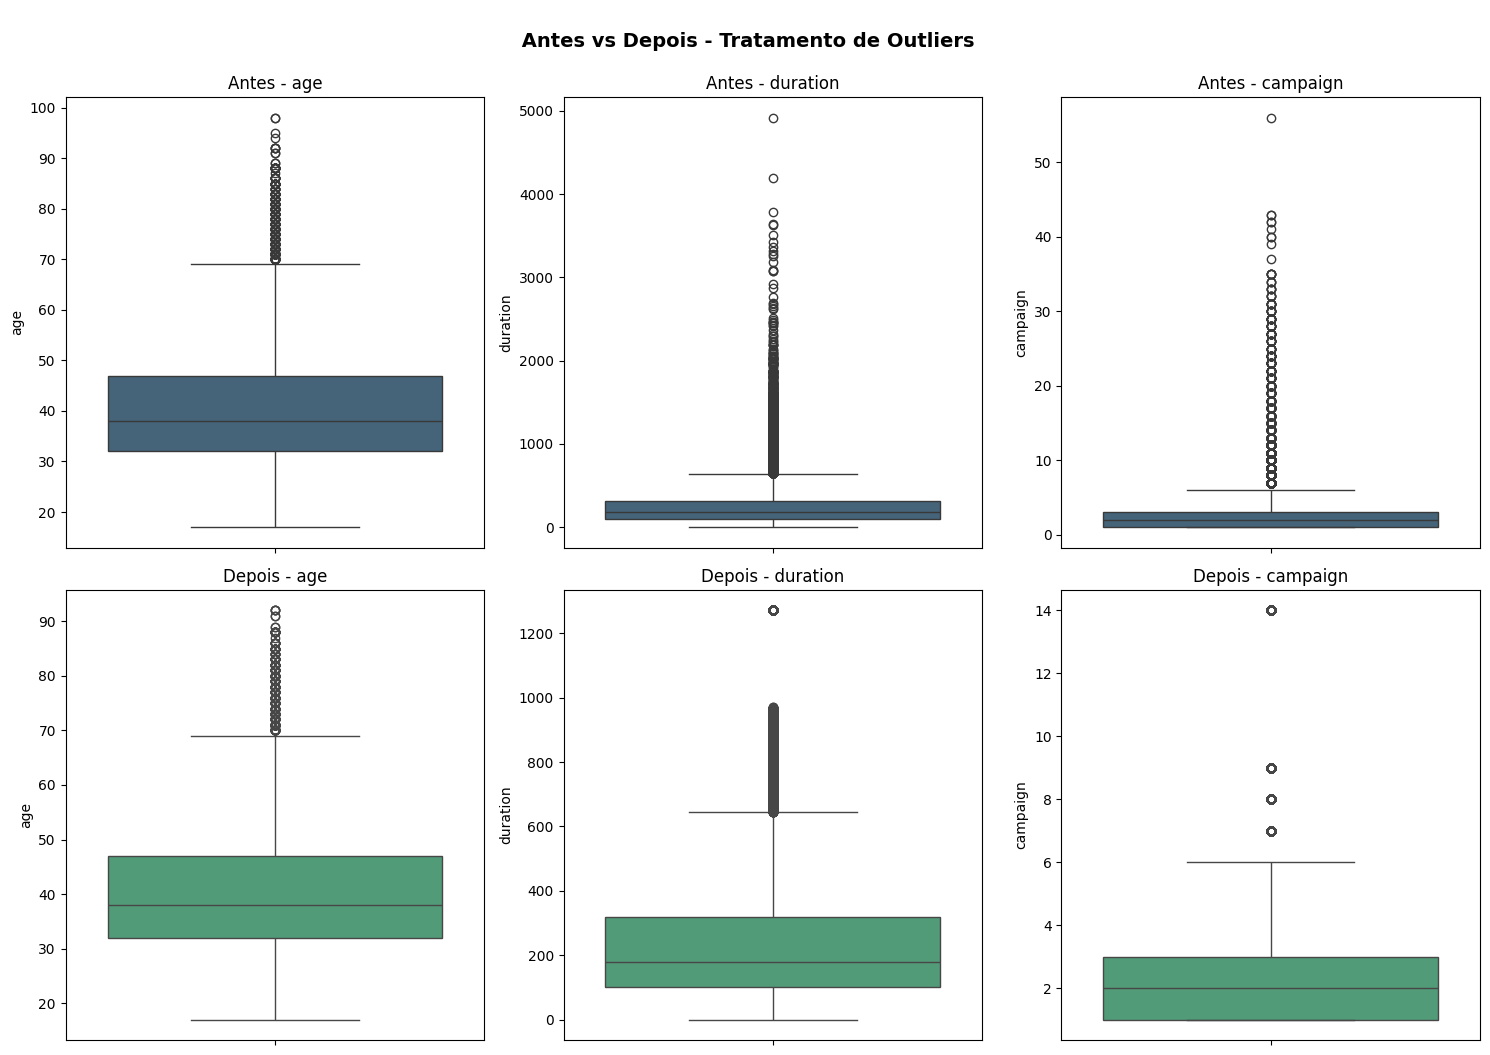

In [ ]:
# aplicar o interquartil para tratar dos outliers de age, duration e campaign

# Lista das colunas que queremos analisar
cols_to_fix = ["age", "duration", "campaign"]

# Criar subplots para os boxplots antes e depois
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Boxplots antes da alteração
for i, col in enumerate(cols_to_fix):
    sns.boxplot(y=df[col], ax=axes[0, i], color="#3C6682")
    axes[0, i].set_title(f"Antes - {col}")

# Calcular os quartis e IQR
Q1 = df[cols_to_fix].quantile(0.25)
Q3 = df[cols_to_fix].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Definir quantis de 1% e 99%
q1_percentile = df[cols_to_fix].quantile(0.01)
q99_percentile = df[cols_to_fix].quantile(0.99)

# Aplicar a substituição
for col in cols_to_fix:
    df[col] = np.where(df[col] < lower_bound[col], q1_percentile[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], q99_percentile[col], df[col])

# Boxplots depois da alteração
for i, col in enumerate(cols_to_fix):
    sns.boxplot(y=df[col], ax=axes[1, i], color="#45A778")
    axes[1, i].set_title(f"Depois - {col}")

# Ajustar espaçamento
plt.tight_layout()
plt.suptitle('\n Antes vs Depois - Tratamento de Outliers', y=1.05, fontsize=14, fontweight='bold')
plt.show()

## Testes e Correlações

<details>
<summary><strong> Técnicas e testes utilizados:
 </strong> (Expandir)</summary>

***Entre variáveis numéricas***:
* Correlação:
  * Pearson
  * Spearman
  * Kendall’s Tau
  * Distance Correlation
  * Informação Mútua

* Testes estatísticos:
  * D'Agostino’s K²

***Entre variáveis categóricas:***
* Testes estatísticos:
  * Teste do Chi²
  * Cramer’s V

***Entre variáveis categóricas e numéricas:***
* Testes estatísticos:
  * Kruskal-Wallis
  * Correlação Bissserial

### Correlação entre variáveis numéricas

Correlação: `Pearson`, `Spearman`, `Kendall’s Tau`, `Distance Correlation`, `Informação Mútua`

Teste estatístico: `D'Agostino’s K²`

<details>
<summary><strong> Insights
 </strong> (Expandir)</summary>

1. **Correlação de Pearson (Relações Lineares):**
  * Fortes correlações positivas entre emp.var.rate, euribor3m e nr.employed. Esta relação significa que se uma variável aumentar, a outra também aumenta, ou seja, as variáveis podem apresentar informações semelhantes.
  * Identifica correlações negativas moderadas entre previous e as variáveis emp.var.rate, euribor3m e nr.employed, o que significa que as variáveis estão inversamente relacionadas.

2. **Comparação entre Pearson, Spearman e Kendall:**
  * A relação entre emp.var.rate e cons.price.idx é forte, mas possivelmente não linear, evidenciada pela diferença entre os coeficientes de Pearson (0.775) e Spearman/Kendall (0.665/0.526).
  * A fraca correlação entre campaign e previous (segundo Spearman e Kendall) sugere que os clientes que participaram nas campanhas anteriores tendem a ser contactados menos vezes na campanha atual, refletindo um padrão comportamental relevante para análise.

3. **Correlação de Distância (Relações Não Lineares):**
  * A relação entre a variável previous e nr.employed tem uma correlação de Pearson de -0.501, mas uma Correlação de Distância de 0.482, indicando uma dependência relevante que não é identificada através de outras métricas.

4. **Informação Mútua (Dependência Geral):**
  * As variáveis como cons.price.idx e cons.conf.idx (2.395), euribor3m e nr.employed (1.623) e emp.var.rate e cons.conf.idx (1.618) apresentaram alta Informação Mútua, indicando forte dependência e possível sobreposição de informação.
  * Em relação às variáveis da campanha, a dependência não é muito forte, o que sugere que cada variável pode estar a captar aspectos distintos do comportamento do cliente e, portanto, pode ser benéfico analisá-las separadamente no modelo.

In [ ]:
# Identificar features numéricas
numeric_features = df.select_dtypes(include=[np.number])

# Pearson correlation
def pearson_corr(df):
    return df.corr(method='pearson')

# Spearman correlation
def spearman_corr(df):
    return df.corr(method='spearman')

# Kendall's Tau correlation
def kendall_corr(df):
    return df.corr(method='kendall')

# Distance Correlation
def distance_corr(df):
    corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    for col1 in df.columns:
        for col2 in df.columns:
            corr_matrix.loc[col1, col2] = dcor.distance_correlation(df[col1], df[col2])
    return corr_matrix.astype(float)

# Mutual Information (numérica)
def mutual_info(df):
    mi_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    for col1 in df.columns:
        for col2 in df.columns:
            if df[col1].dtype in ['float64', 'int64'] and df[col2].dtype in ['float64', 'int64']:
                mi_matrix.loc[col1, col2] = mutual_info_regression(df[[col1]], df[col2])[0]
            else:
                mi_matrix.loc[col1, col2] = np.nan
    return mi_matrix

# Calcular as correlações
pearson_corr_matrix = pearson_corr(numeric_features)
spearman_corr_matrix = spearman_corr(numeric_features)
kendall_corr_matrix = kendall_corr(numeric_features)
distance_corr_matrix = distance_corr(numeric_features)
mutual_info_matrix = mutual_info(numeric_features)

# Combinar todas as matrizes de correlação numa única tabela
correlation_table = pd.DataFrame(index=numeric_features.columns)

correlation_table['Pearson'] = pearson_corr_matrix.stack()
correlation_table['Spearman'] = spearman_corr_matrix.stack()
correlation_table['Kendall'] = kendall_corr_matrix.stack()
correlation_table['Distance Correlation'] = distance_corr_matrix.stack()
correlation_table['Mutual Information'] = mutual_info_matrix.stack()

/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), a

In [ ]:
# Tabela resumo das correlações numéricas

# Obter todos os pares de colunas das features numéricas
pairs = [(col1, col2) for col1 in numeric_features.columns for col2 in numeric_features.columns if col1 != col2]

# Criar uma tabela para armazenar os resultados da correlação
correlation_table = pd.DataFrame()

for col1, col2 in pairs:
    row = {
        'Feature 1': col1,
        'Feature 2': col2,
        'Pearson': pearson_corr_matrix.loc[col1, col2],
        'Spearman': spearman_corr_matrix.loc[col1, col2],
        'Kendall': kendall_corr_matrix.loc[col1, col2],
        'Distance Correlation': distance_corr_matrix.loc[col1, col2],
        'Mutual Information': mutual_info_matrix.loc[col1, col2]
    }
    # Anexar a linha à tabela
    correlation_table = pd.concat([correlation_table, pd.DataFrame([row])], ignore_index=True)

# Mostrar a tabela de correlação arredondada a 3 casas decimais
print("(Sugestão: abrir como interactive table para visualizar todos os registos e selecionar ordenação personalizada) \n")
print("Correlation Table:")
correlation_table.round(3)

(Sugestão: abrir como interactive table para visualizar todos os registos e selecionar ordenação personalizada) 

Correlation Table:


Feature 1       Feature 2  Pearson  Spearman  Kendall  \
0           age        duration   -0.001    -0.002   -0.001   
1           age        campaign    0.003     0.006    0.004   
2           age        previous    0.024    -0.013   -0.010   
3           age    emp.var.rate    0.000     0.045    0.035   
4           age  cons.price.idx    0.001     0.045    0.033   
..          ...             ...      ...       ...      ...   
67  nr.employed        previous   -0.501    -0.439   -0.396   
68  nr.employed    emp.var.rate    0.907     0.945    0.845   
69  nr.employed  cons.price.idx    0.522     0.465    0.377   
70  nr.employed   cons.conf.idx    0.101     0.133    0.102   
71  nr.employed       euribor3m    0.945     0.929    0.789   

    Distance Correlation  Mutual Information  
0                  0.013               0.010  
1                  0.015               0.000  
2                  0.051               0.003  
3                  0.101               0.070  
4                  0.070               0.101  
..                   ...                 ...  
67                 0.482               0.163  
68                 0.952               1.620  
69                 0.672               1.683  
70                 0.515               1.673  
71                 0.969               1.618  

[72 rows x 7 columns]

#### Pearson Correlation

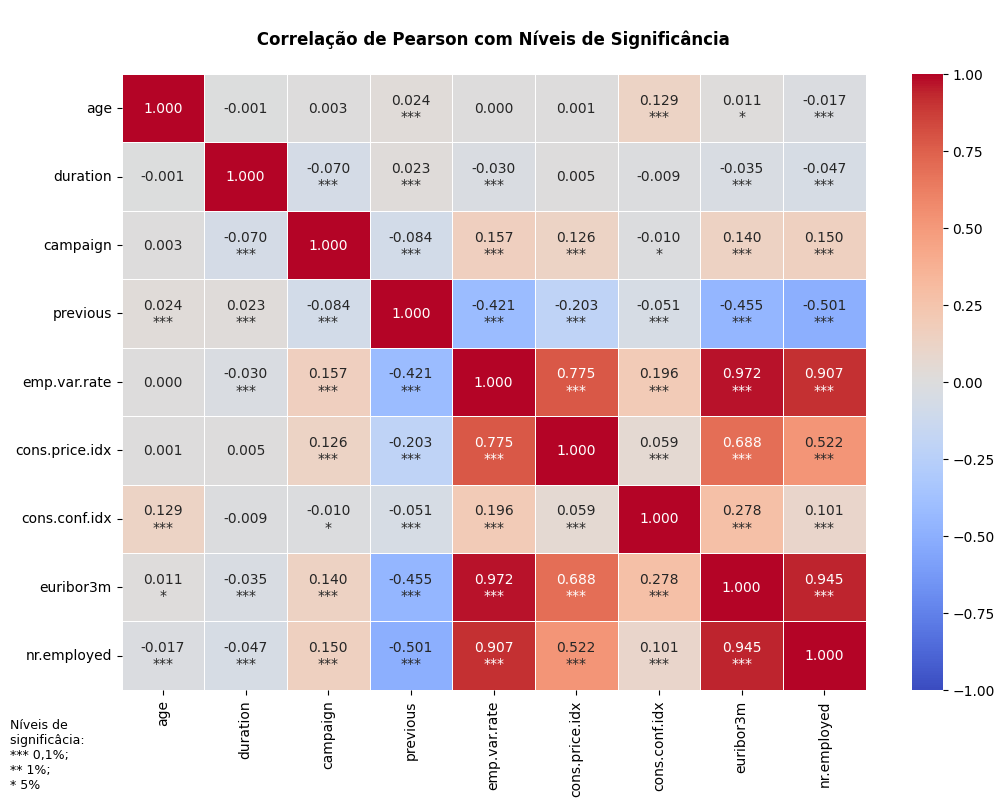

In [ ]:
# Correlação de Pearson com Níveis de Significância

corr_matrix = df[numerical_features].corr()

# Calcular p-values para cada correlação
p_values = np.zeros_like(corr_matrix)
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j:
            _, p_values[i, j] = pearsonr(df[numerical_features[i]], df[numerical_features[j]])
        else:
            p_values[i, j] = 1  # Valores diagonais 1

# Adicionar estrelas para os p_values
def add_significance_stars(corr_value, p_value):
    if p_value < 0.001:
        return f"{corr_value:.3f}\n***"
    elif p_value < 0.01:
        return f"{corr_value:.3f}\n**"
    elif p_value < 0.05:
        return f"{corr_value:.3f}\n*"
    else:
        return f"{corr_value:.3f}"

# Criar matriz com anotações com as estrelas de significância
annot_matrix = np.zeros_like(corr_matrix, dtype=object)
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        annot_matrix[i, j] = add_significance_stars(corr_matrix.iloc[i, j], p_values[i, j])

# Plot heatmap com anotações
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=annot_matrix, cmap="coolwarm", fmt="", linewidths=0.5, vmin=-1, vmax=1, ax=ax)
plt.title("\n Correlação de Pearson com Níveis de Significância \n", fontweight='bold')

# Adicionar legenda para os níveis de significância
legend_text = "Níveis de \nsignificâcia: \n*** 0,1%; \n** 1%; \n* 5%"
plt.text(-0.15, -0.16, s=legend_text, fontsize=9, ha="left", transform=ax.transAxes)

plt.show()

#### Spearman Correlation

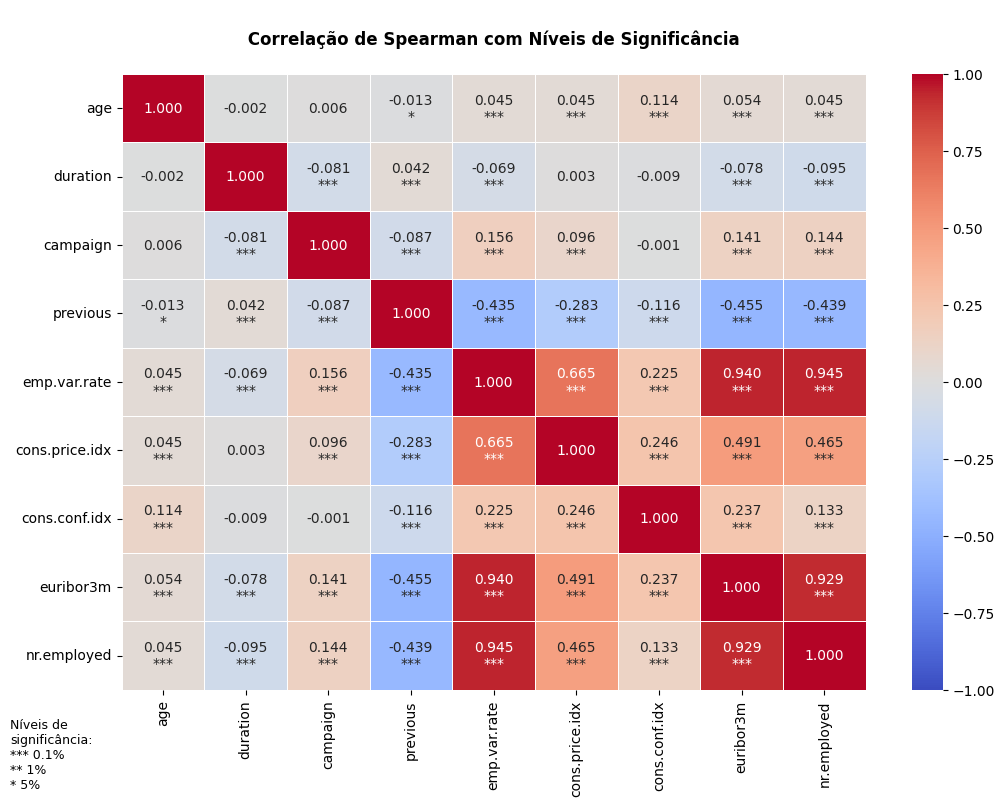

In [ ]:
# Matriz de Correlação de Spearman com Níveis de significância

corr_matrix = df[numerical_features].corr(method="spearman")

# p_values
p_values = np.zeros_like(corr_matrix)
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j:
            _, p_values[i, j] = spearmanr(df[numerical_features[i]], df[numerical_features[j]])
        else:
            p_values[i, j] = 1

# Adicionar estrelas de significância
def add_significance_stars(corr_value, p_value):
    if p_value < 0.001:
        return f"{corr_value:.3f}\n***"
    elif p_value < 0.01:
        return f"{corr_value:.3f}\n**"
    elif p_value < 0.05:
        return f"{corr_value:.3f}\n*"
    else:
        return f"{corr_value:.3f}"

# Matriz com anotações
annot_matrix = np.vectorize(add_significance_stars)(corr_matrix, p_values)

# Plot heatmap com anotações
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=annot_matrix, cmap="coolwarm", fmt="", linewidths=0.5, vmin=-1, vmax=1)
plt.title("\n Correlação de Spearman com Níveis de Significância \n", fontweight='bold')

plt.text(-0.15, -0.16, "Níveis de \nsignificância:\n*** 0.1%\n** 1%\n* 5%", fontsize=9, ha="left", transform=ax.transAxes)

plt.show()

#### Kendall’s Tau Correlation

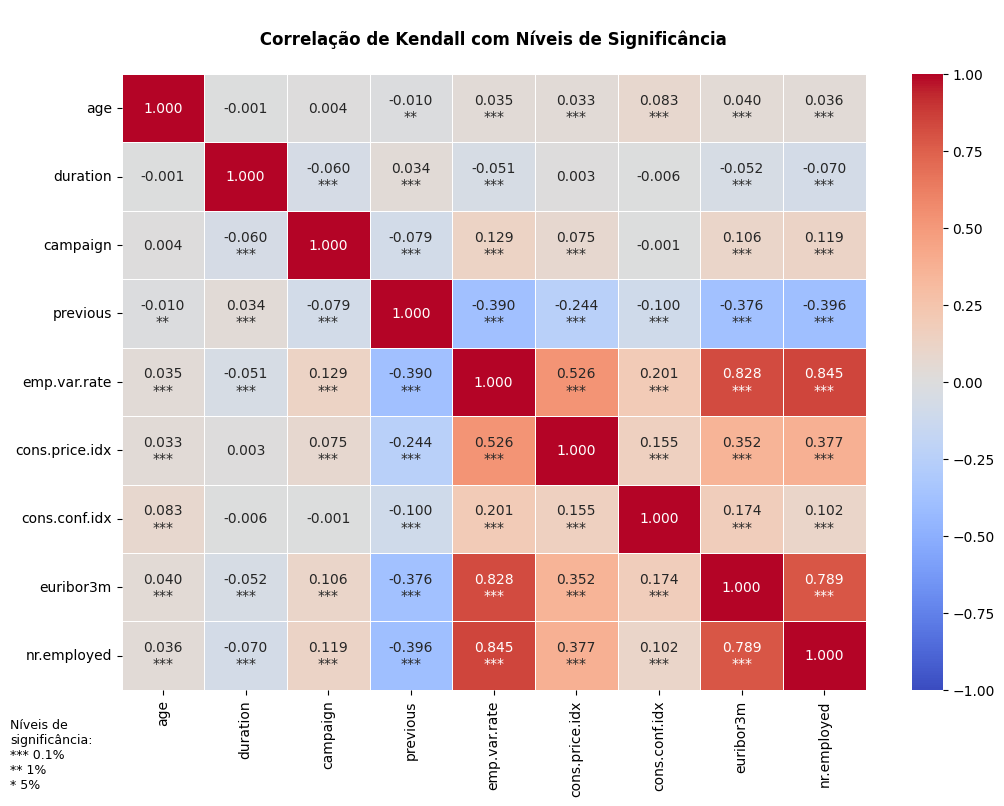

In [ ]:
# Matriz de Correlação de Kendall's Tau com Níveis de significância

# Matrix de Kendall's Tau
corr_matrix = df[numerical_features].corr(method="kendall")

# p-values
p_values = np.zeros_like(corr_matrix)
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j:
            _, p_values[i, j] = kendalltau(df[numerical_features[i]], df[numerical_features[j]])
        else:
            p_values[i, j] = 1

# criar matrix de anotação
annot_matrix = np.vectorize(add_significance_stars)(corr_matrix, p_values)

# Plot heatmap com anotações
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=annot_matrix, cmap="coolwarm", fmt="", linewidths=0.5, vmin=-1, vmax=1)
plt.title("\n Correlação de Kendall com Níveis de Significância \n", fontweight='bold')

plt.text(-0.15, -0.16, "Níveis de \nsignificância:\n*** 0.1%\n** 1%\n* 5%", fontsize=9, ha="left", transform=ax.transAxes)

plt.show()


#### Distance Correlation

In [ ]:
# Distance Correlation

distance_correlations = {}

for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        feature1 = numerical_features[i]
        feature2 = numerical_features[j]

        X = df[feature1].values
        Y = df[feature2].values

        # Calcular correlação de distância
        dcor_value = dcor.distance_correlation(X, Y)
        distance_correlations[(feature1, feature2)] = dcor_value

print("Distance Correlation:")

for features, dcor_value in distance_correlations.items():
    print(f" {features[0]} and {features[1]}: {dcor_value:.4f}")


/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


Distance Correlation:
 age and duration: 0.0131
 age and campaign: 0.0153
 age and previous: 0.0513
 age and emp.var.rate: 0.1012
 age and cons.price.idx: 0.0696
 age and cons.conf.idx: 0.1139
 age and euribor3m: 0.1079
 age and nr.employed: 0.1151
 duration and campaign: 0.1051
 duration and previous: 0.0389
 duration and emp.var.rate: 0.0544
 duration and cons.price.idx: 0.0331
 duration and cons.conf.idx: 0.0401
 duration and euribor3m: 0.0597
 duration and nr.employed: 0.0737
 campaign and previous: 0.0914
 campaign and emp.var.rate: 0.1509
 campaign and cons.price.idx: 0.1177
 campaign and cons.conf.idx: 0.0528
 campaign and euribor3m: 0.1334
 campaign and nr.employed: 0.1455
 previous and emp.var.rate: 0.4717
 previous and cons.price.idx: 0.3106
 previous and cons.conf.idx: 0.2023
 previous and euribor3m: 0.4808
 previous and nr.employed: 0.4815
 emp.var.rate and cons.price.idx: 0.7898
 emp.var.rate and cons.conf.idx: 0.5505
 emp.var.rate and euribor3m: 0.9823
 emp.var.rate and n

In [ ]:
# Distance Correlation

df_numerical = df[numerical_features]

dcor_numerical = pd.DataFrame(index=numerical_features, columns=numerical_features)

for i in numerical_features:
    for j in numerical_features:
        # Extrair as colunas correspondentes de df
        X = df[i].values
        Y = df[j].values

        # Calcular correlação de distância
        dcor_value = dcor.distance_correlation(X, Y)

        dcor_numerical.loc[i, j] = dcor_value

dcor_numerical

/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), a

age  duration  campaign  previous emp.var.rate  \
age                  1.0  0.013107  0.015257  0.051256     0.101198   
duration        0.013107       1.0  0.105121   0.03895     0.054401   
campaign        0.015257  0.105121       1.0  0.091428     0.150882   
previous        0.051256   0.03895  0.091428       1.0     0.471661   
emp.var.rate    0.101198  0.054401  0.150882  0.471661          1.0   
cons.price.idx  0.069636  0.033073  0.117684  0.310591     0.789802   
cons.conf.idx   0.113947  0.040065  0.052841  0.202258     0.550512   
euribor3m        0.10788  0.059685  0.133391  0.480778     0.982286   
nr.employed     0.115077  0.073698  0.145518  0.481516       0.9521   

               cons.price.idx cons.conf.idx euribor3m nr.employed  
age                  0.069636      0.113947   0.10788    0.115077  
duration             0.033073      0.040065  0.059685    0.073698  
campaign             0.117684      0.052841  0.133391    0.145518  
previous             0.310591      0.202258  0.480778    0.481516  
emp.var.rate         0.789802      0.550512  0.982286      0.9521  
cons.price.idx            1.0      0.502311  0.735952    0.672067  
cons.conf.idx        0.502311           1.0  0.537563    0.515351  
euribor3m            0.735952      0.537563       1.0    0.969461  
nr.employed          0.672067      0.515351  0.969461         1.0

#### Mutual Information

In [ ]:
# Informação Mútua entre variáveis numéricas

df_numerical = df[numerical_features]
mi_numerical = pd.DataFrame(index=numerical_features, columns=numerical_features)

for i in numerical_features:
    for j in numerical_features:
        mi_numerical.loc[i, j] = mutual_info_regression(df_numerical[[i]], df_numerical[j])[0]

mi_numerical

age  duration  campaign  previous emp.var.rate  \
age             3.672476  0.004448  0.000096  0.013128     0.066841   
duration        0.009536  6.297848  0.034293         0     0.024469   
campaign        0.008218  0.033254  1.609546         0     0.024371   
previous         0.00865  0.004314  0.002346  0.486289       0.1555   
emp.var.rate    0.071171  0.020474  0.021902  0.163154     1.626005   
cons.price.idx  0.097797   0.02777  0.023605  0.166905     1.622131   
cons.conf.idx    0.11002  0.028272  0.027475   0.16577     1.625743   
euribor3m       0.154937  0.040536  0.050614     0.169     1.563595   
nr.employed     0.078885  0.021821  0.030133  0.165616     1.616075   

               cons.price.idx cons.conf.idx euribor3m nr.employed  
age                  0.095357       0.10967  0.163723    0.075696  
duration             0.030876      0.026153  0.039304    0.019901  
campaign             0.026302      0.027547  0.055863    0.019968  
previous             0.173128       0.16871  0.173809    0.163631  
emp.var.rate         1.616935      1.618749   1.56677    1.620754  
cons.price.idx       2.384931      2.383242  2.142603    1.674366  
cons.conf.idx        2.379134      2.393632  2.140488    1.684986  
euribor3m            2.142668      2.146391  4.196547    1.628588  
nr.employed          1.679568      1.671475  1.627325    1.669867

#### D'Agostino's K² Test

<details>
<summary><strong> Insights
 </strong> (Expandir)</summary>

Tendo em conta a dimensão do dataset, vamos usar o D’Agostino’s K² Test
  * Os resultados do teste indicam que todas as variáveis analisadas não seguem uma distribuição normal, isto é, para todas as variáveis  o p-value < 0,05,  logo rejeita-se H0.
  * As estatísticas do teste variam, mas todas são bastante elevadas, confirmando que as variáveis não seguem uma distribuição normal, ou seja, apresentam desvio em termos de assimetria e/ou curtose em relação à normalidade.


In [ ]:
print("\n=== Results of D'Agostino's K² Test for Normality ===\n")

# Teste K² de D'Agostino para cada coluna numérica
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    statistic, p_value = normaltest(df[col])

    # Decisão com base no p_value
    if p_value > 0.05:
        print(f'{col}: H0 (Data is normally distributed) \n - p-value = {p_value:.4f} \n - statistic = {statistic:.4f} \n')
    else:
        print(f'{col}: H1 (Data is NOT normally distributed) \n - p-value = {p_value:.4f} \n - statistic = {statistic:.4f} \n')


=== Results of D'Agostino's K² Test for Normality ===

age: H1 (Data is NOT normally distributed) 
 - p-value = 0.0000 
 - statistic = 3772.8476 

duration: H1 (Data is NOT normally distributed) 
 - p-value = 0.0000 
 - statistic = 18855.4749 

campaign: H1 (Data is NOT normally distributed) 
 - p-value = 0.0000 
 - statistic = 25390.1905 

previous: H1 (Data is NOT normally distributed) 
 - p-value = 0.0000 
 - statistic = 33204.6383 

emp.var.rate: H1 (Data is NOT normally distributed) 
 - p-value = 0.0000 
 - statistic = 16409.4330 

cons.price.idx: H1 (Data is NOT normally distributed) 
 - p-value = 0.0000 
 - statistic = 4390.8320 

cons.conf.idx: H1 (Data is NOT normally distributed) 
 - p-value = 0.0000 
 - statistic = 936.2943 

euribor3m: H1 (Data is NOT normally distributed) 
 - p-value = 0.0000 
 - statistic = 366620.8020 

nr.employed: H1 (Data is NOT normally distributed) 
 - p-value = 0.0000 
 - statistic = 5196.6561 



### Correlação entre variáveis categóricas


Testes estatísticos: `Teste do Chi²`, `Cramer’s V`

<details>
<summary><strong>  Insights </strong> (Expandir)</summary>

**Chi²:**
  *  A maioria das variáveis apresenta um p-value, igual a 0, logo rejeita-se H0, indicando uma associação forte e altamente significativa.


**Cramér's V:**
  * A maioria das variáveis apresentou associação fraca, com valores de Cramer's V relativamente baixos.
  * "contact" e "month" demonstraram uma associação bastante forte, com Cramer's V igual a 0.61.

**Comparação entre Chi² e Cramér's V:**
  * "job" e "education" também apresentaram associação forte, apesar de um valor moderado de Cramer's V (0.37), com um Chi² bastante elevado (34154.64).
  * Em contraste, "loan" e "marital" mostraram associação muito fraca, com Chi² de 1.79 e Cramer's V de 0.0066.

In [ ]:
results = []

for var1 in categorical_features:
    for var2 in categorical_features:
        if var1 != var2:
            contingency_table = pd.crosstab(df[var1], df[var2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            # Calcular Cramer's V
            n = contingency_table.sum().sum()
            min_dim = min(contingency_table.shape) - 1
            cramer_v = np.sqrt(chi2 / (n * min_dim))

            results.append({
                'Variable 1': var1,
                'Variable 2': var2,
                'Chi²': chi2,
                'p-value': p,
                'Cramer’s V': cramer_v
            })

# Converter os resultados para um DataFrame
cat_df = pd.DataFrame(results)

print("(Sugestão: abrir como interactive table para visualizar todos os registos e selecionar ordenação personalizada) \n")
print("Tabela com correlações entre variáveis categóricas:")
cat_df


(Sugestão: abrir como interactive table para visualizar todos os registos e selecionar ordenação personalizada) 

Tabela com correlações entre variáveis categóricas:


Variable 1   Variable 2          Chi²        p-value  Cramer’s V
0         job      marital   4007.745934   0.000000e+00    0.220609
1         job    education  34154.644147   0.000000e+00    0.371824
2         job      housing     19.414688   3.530088e-02    0.021715
3         job         loan     22.685711   1.196805e-02    0.023473
4         job      contact    641.483028  2.257214e-131    0.124819
..        ...          ...           ...            ...         ...
67          y      housing      5.042708   2.472980e-02    0.011067
68          y         loan      0.789348   3.742975e-01    0.004378
69          y      contact    862.034908  1.758626e-189    0.144694
70          y        month   3102.801110   0.000000e+00    0.274515
71          y  day_of_week     26.045064   3.098936e-05    0.025151

[72 rows x 5 columns]

#### Teste Chi²

In [ ]:
# Teste Chi² para variáveis categóricas
def chi_squared_test(categorical_col1, categorical_col2):
    contingency_table = pd.crosstab(categorical_col1, categorical_col2)

    # Teste Chi²
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    return chi2_stat, p_value, dof, expected

# loop pelas variáveis categóricas
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar repetir o mesmo par
            chi2_stat, p_value, dof, expected = chi_squared_test(df[col1], df[col2])
            print(f"Chi-Squared Test between {col1} and {col2}:")
            print(f" - Chi2 Stat: {chi2_stat:.4f}, p-value: {p_value:.4f}")
            print(f" - Degrees of Freedom: {dof} \n")

Chi-Squared Test between job and marital:
 - Chi2 Stat: 4007.7459, p-value: 0.0000
 - Degrees of Freedom: 20 

Chi-Squared Test between job and education:
 - Chi2 Stat: 34154.6441, p-value: 0.0000
 - Degrees of Freedom: 60 

Chi-Squared Test between job and housing:
 - Chi2 Stat: 19.4147, p-value: 0.0353
 - Degrees of Freedom: 10 

Chi-Squared Test between job and loan:
 - Chi2 Stat: 22.6857, p-value: 0.0120
 - Degrees of Freedom: 10 

Chi-Squared Test between job and contact:
 - Chi2 Stat: 641.4830, p-value: 0.0000
 - Degrees of Freedom: 10 

Chi-Squared Test between job and month:
 - Chi2 Stat: 4513.3309, p-value: 0.0000
 - Degrees of Freedom: 90 

Chi-Squared Test between job and day_of_week:
 - Chi2 Stat: 73.0944, p-value: 0.0011
 - Degrees of Freedom: 40 

Chi-Squared Test between job and y:
 - Chi2 Stat: 960.6785, p-value: 0.0000
 - Degrees of Freedom: 10 

Chi-Squared Test between marital and job:
 - Chi2 Stat: 4007.7459, p-value: 0.0000
 - Degrees of Freedom: 20 

Chi-Squared T

#### Cramér’s V

In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# categorias Cramér's V
def categorize_association(value):
    if value > 0.5:
        return 'Strong'
    elif value > 0.3:
        return 'Moderate'
    else:
        return 'Weak'

results = []

for i in range(len(categorical_features)):
    for j in range(i + 1, len(categorical_features)):
        var1 = categorical_features[i]
        var2 = categorical_features[j]
        v = cramers_v(df[var1], df[var2])
        association = categorize_association(v)
        results.append([var1, var2, v, association])

# dataframe para visualizar em tabela
cramers_v_df = pd.DataFrame(results, columns=['Variable 1', 'Variable 2', 'Cramérs V', 'Association'])

# Resultados (com 3 casas decimais)
print("\nCramér's V Test Results:\n")
cramers_v_df.round(3)


Cramér's V Test Results:



Variable 1   Variable 2  Cramérs V Association
0           job      marital      0.220        Weak
1           job    education      0.372    Moderate
2           job      housing      0.015        Weak
3           job         loan      0.018        Weak
4           job      contact      0.124        Weak
5           job        month      0.109        Weak
6           job  day_of_week      0.014        Weak
7           job            y      0.152        Weak
8       marital    education      0.139        Weak
9       marital      housing      0.013        Weak
10      marital         loan      0.000        Weak
11      marital      contact      0.072        Weak
12      marital        month      0.061        Weak
13      marital  day_of_week      0.012        Weak
14      marital            y      0.054        Weak
15    education      housing      0.016        Weak
16    education         loan      0.000        Weak
17    education      contact      0.113        Weak
18    education        month      0.096        Weak
19    education  day_of_week      0.017        Weak
20    education            y      0.067        Weak
21      housing         loan      0.036        Weak
22      housing      contact      0.078        Weak
23      housing        month      0.069        Weak
24      housing  day_of_week      0.018        Weak
25      housing            y      0.010        Weak
26         loan      contact      0.012        Weak
27         loan        month      0.016        Weak
28         loan  day_of_week      0.007        Weak
29         loan            y      0.000        Weak
30      contact        month      0.609      Strong
31      contact  day_of_week      0.055        Weak
32      contact            y      0.145        Weak
33        month  day_of_week      0.067        Weak
34        month            y      0.274        Weak
35  day_of_week            y      0.023        Weak

### Correlação entre variáveis categóricas e numéricas

Testes estatísticos: `Kruskal-Wallis` e  `Correlação Bisserial`

<details>
<summary><strong> Insights
</strong> (Expandir)</summary>

**Importante**
Tendo em conta que o teste de D’Agostino’s K² indicou que nenhuma variável segue uma distribuição normal.
  * O uso do teste ANOVA não é adequado, uma vez que nenhuma variável segue uma distribuição normal.
  * Como o teste de Levene é utilizado para verificar a homogeneidade das variâncias quando se usa testes paramétricos --> assume-se que não existe igualdade de variâncias, ou seja existe heterocedastidade.

#### Kruskal-Wallis Test

**Variável age:**
    
  * Diferenças significativas nas médias e medianas em relação a job, marital, education, month e day_of_week.
  * Sem diferenças significativas em relação a housing e loan.
  * A variável y (resposta à campanha) apresentou significância estatística, sugerindo influência da idade na decisão do cliente.

**Variável duration:**

  * Diferenças significativas em relação a job, education, housing, contact, month, day_of_week e y.
  * Sem diferenças significativas em relação a loan.

**Variável campaign:**

  * Relação significativa com contact, job, month e day_of_week.
  * Sem relação significativa com loan e education.

**Variável previous:**

  * Forte correlação com contact, job, marital, education e housing.
  * Sem correlação significativa com loan e day_of_week.

**Variáveis Económicas (emp.var.rate, cons.price.idx, cons.conf.idx):**

  * Impacto relevante sobre diversas variáveis, exceto loan e day_of_week.
  * Sugere influência dos indicadores económicos no comportamento dos clientes.


### Correlação Bisserial

**Variável y:**

  * Correlações significativas com age, duration, campaign, previous, emp.var.rate, cons.price.idx e cons.conf.idx.
  * p-value < 0,05 indica que estas variáveis influenciam a decisão do cliente em relação à campanha.
  * Importante considerar estas variáveis na construção de modelos preditivos.

In [ ]:
# Criar um DataFrame vazio para armazenar os resultados
correlation_categorical_numeric = pd.DataFrame(columns=['Feature', 'Test', 'Statistic', 'p-value'])

# Biserial Correlation
def biserial_correlation(numeric_col, categorical_col):
    # label encoding (variáveis categóricas binárias)
    if len(categorical_col.unique()) == 2:
        categorical_col = LabelEncoder().fit_transform(categorical_col)
        correlation, p_value = stats.pointbiserialr(numeric_col, categorical_col)
        return correlation, p_value
    else:
        return None, None  # Retornar None para variáveis categóricas não binárias

# Loop pelos pares de features numéricas e categóricas
for numeric_col in numeric_features.columns:
    for categorical_col in categorical_features:

        # Correlação bisserial (apenas para variáveis categóricas binárias)
        if len(df[categorical_col].unique()) == 2:
            biserial_corr, p_value_biserial = biserial_correlation(numeric_features[numeric_col], df[categorical_col])
            if biserial_corr is not None:
                correlation_categorical_numeric = pd.concat([correlation_categorical_numeric, pd.DataFrame({
                    'Feature': [f"{numeric_col} vs {categorical_col}"],
                    'Test': ['Biserial Correlation'],
                    'Statistic': [biserial_corr],
                    'p-value': [p_value_biserial]
                })], ignore_index=True)

# Mostrar os resultados arredondados a 3 casas decimais
correlation_categorical_numeric.round(3)

<ipython-input-44-ff9700a8d607>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_categorical_numeric = pd.concat([correlation_categorical_numeric, pd.DataFrame({


Feature                  Test  Statistic  p-value
0              age vs housing  Biserial Correlation     -0.002    0.750
1                 age vs loan  Biserial Correlation     -0.007    0.150
2              age vs contact  Biserial Correlation      0.007    0.153
3                    age vs y  Biserial Correlation      0.030    0.000
4         duration vs housing  Biserial Correlation     -0.010    0.035
5            duration vs loan  Biserial Correlation     -0.002    0.703
6         duration vs contact  Biserial Correlation     -0.031    0.000
7               duration vs y  Biserial Correlation      0.420    0.000
8         campaign vs housing  Biserial Correlation     -0.012    0.015
9            campaign vs loan  Biserial Correlation      0.006    0.254
10        campaign vs contact  Biserial Correlation      0.078    0.000
11              campaign vs y  Biserial Correlation     -0.068    0.000
12        previous vs housing  Biserial Correlation      0.022    0.000
13           previous vs loan  Biserial Correlation     -0.002    0.656
14        previous vs contact  Biserial Correlation     -0.213    0.000
15              previous vs y  Biserial Correlation      0.230    0.000
16    emp.var.rate vs housing  Biserial Correlation     -0.059    0.000
17       emp.var.rate vs loan  Biserial Correlation      0.001    0.808
18    emp.var.rate vs contact  Biserial Correlation      0.394    0.000
19          emp.var.rate vs y  Biserial Correlation     -0.298    0.000
20  cons.price.idx vs housing  Biserial Correlation     -0.077    0.000
21     cons.price.idx vs loan  Biserial Correlation     -0.006    0.225
22  cons.price.idx vs contact  Biserial Correlation      0.592    0.000
23        cons.price.idx vs y  Biserial Correlation     -0.136    0.000
24   cons.conf.idx vs housing  Biserial Correlation     -0.032    0.000
25      cons.conf.idx vs loan  Biserial Correlation     -0.014    0.006
26   cons.conf.idx vs contact  Biserial Correlation      0.252    0.000
27         cons.conf.idx vs y  Biserial Correlation      0.055    0.000
28       euribor3m vs housing  Biserial Correlation     -0.058    0.000
29          euribor3m vs loan  Biserial Correlation     -0.000    0.924
30       euribor3m vs contact  Biserial Correlation      0.400    0.000
31             euribor3m vs y  Biserial Correlation     -0.308    0.000
32     nr.employed vs housing  Biserial Correlation     -0.046    0.000
33        nr.employed vs loan  Biserial Correlation      0.004    0.391
34     nr.employed vs contact  Biserial Correlation      0.269    0.000
35           nr.employed vs y  Biserial Correlation     -0.355    0.000

#### Kruskal-Wallis (para ver apenas os valores de Kruskal-Wallis)

In [ ]:
kruskal_results_df = pd.DataFrame(columns=['Numerical Feature', 'Categorical Feature', 'p-value'])

for num_col in df.select_dtypes(include=['float64', 'int64']).columns:
    for cat_col in categorical_features:
        groups = [df[num_col][df[cat_col] == category] for category in df[cat_col].unique()]
        h_stat, p_value = kruskal(*groups)

        kruskal_results_df = pd.concat([kruskal_results_df, pd.DataFrame({
            'Numerical Feature': [num_col],
            'Categorical Feature': [cat_col],
            'p-value': [p_value]
        })], ignore_index=True)

kruskal_results_df

<ipython-input-45-61b2579f6ee6>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  kruskal_results_df = pd.concat([kruskal_results_df, pd.DataFrame({


Numerical Feature Categorical Feature        p-value
0                age                 job   0.000000e+00
1                age             marital   0.000000e+00
2                age           education   0.000000e+00
3                age             housing   4.225645e-01
4                age                loan   1.320358e-01
..               ...                 ...            ...
76       nr.employed                loan   2.171261e-01
77       nr.employed             contact  1.212892e-109
78       nr.employed               month   0.000000e+00
79       nr.employed         day_of_week   8.741659e-08
80       nr.employed                   y   0.000000e+00

[81 rows x 3 columns]

#### Correlação Bisserial (para ver apenas os valores da Correlação Bisserial)

In [ ]:
biserial_results_df = pd.DataFrame(columns=['Numerical Feature', 'Categorical Feature', 'Correlation', 'p-value'])

for num_col in df.select_dtypes(include=['float64', 'int64']).columns:
    for cat_col in categorical_features:
        # Procurar variáveis categóricas binárias
        if len(df[cat_col].unique()) == 2:
            # Criar uma cópia para aplicar as labels
            encoded_cat_col = df[cat_col].copy()

            label_encoder = LabelEncoder()
            encoded_cat_col = label_encoder.fit_transform(encoded_cat_col)

            # Correlação
            correlation, p_value = pointbiserialr(df[num_col], encoded_cat_col)

            # Criar df
            biserial_results_df = pd.concat([biserial_results_df, pd.DataFrame({
                'Numerical Feature': [num_col],
                'Categorical Feature': [cat_col],
                'Correlation': [correlation],
                'p-value': [p_value]
            })], ignore_index=True)

biserial_results_df

<ipython-input-46-410407b2e732>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  biserial_results_df = pd.concat([biserial_results_df, pd.DataFrame({


Numerical Feature Categorical Feature  Correlation        p-value
0                age             housing    -0.001569   7.502260e-01
1                age                loan    -0.007088   1.503623e-01
2                age             contact     0.007041   1.530851e-01
3                age                   y     0.030105   9.972770e-10
4           duration             housing    -0.010407   3.470811e-02
5           duration                loan    -0.001877   7.032636e-01
6           duration             contact    -0.031287   2.155595e-10
7           duration                   y     0.419949   0.000000e+00
8           campaign             housing    -0.012002   1.487304e-02
9           campaign                loan     0.005617   2.544022e-01
10          campaign             contact     0.077545   6.034021e-56
11          campaign                   y    -0.068450   5.877226e-44
12          previous             housing     0.021653   1.112345e-05
13          previous                loan    -0.002194   6.562252e-01
14          previous             contact    -0.212905   0.000000e+00
15          previous                   y     0.230197   0.000000e+00
16      emp.var.rate             housing    -0.059156   3.012768e-33
17      emp.var.rate                loan     0.001198   8.078804e-01
18      emp.var.rate             contact     0.393741   0.000000e+00
19      emp.var.rate                   y    -0.298281   0.000000e+00
20    cons.price.idx             housing    -0.077223   1.698760e-55
21    cons.price.idx                loan    -0.005980   2.249704e-01
22    cons.price.idx             contact     0.591590   0.000000e+00
23    cons.price.idx                   y    -0.136131  1.680693e-169
24     cons.conf.idx             housing    -0.032207   6.286372e-11
25     cons.conf.idx                loan    -0.013633   5.667127e-03
26     cons.conf.idx             contact     0.251576   0.000000e+00
27     cons.conf.idx                   y     0.054819   8.807411e-29
28         euribor3m             housing    -0.058239   2.821513e-32
29         euribor3m                loan    -0.000472   9.236555e-01
30         euribor3m             contact     0.399900   0.000000e+00
31         euribor3m                   y    -0.307733   0.000000e+00
32       nr.employed             housing    -0.045631   1.975581e-20
33       nr.employed                loan     0.004224   3.913971e-01
34       nr.employed             contact     0.269300   0.000000e+00
35       nr.employed                   y    -0.354663   0.000000e+00

### Análise Multivariada

<details>
<summary><strong>  Insights
 </strong> (Expandir)</summary>

**Histograma**
* **Assimetria Positiva:** Isto significa que a maioria dos valores estão concentrados em faixas mais baixas, com caudas longas estendendo-se para valores mais altos.
  * **duration:** A maioria das chamadas teve curta duração, com algumas exceções de chamadas mais longas.
  * **campaign:** A maioria dos clientes foi contactada poucas vezes, enquanto alguns receberam um número elevado de chamadas.
  * **previous:** Muitos clientes não tiveram contacto prévio (valor 0), com alguns tendo vários contactos anteriores.
  * **age:** A maior concentração de clientes está entre os 30 e 40 anos
* **Distribuições Multimodais, com clusters distintos:**  As variáveis emp.var.rate, cons.conf.idx, euribor3m e nr.employed revelam distribuições multimodais, estes padrões podem estar associados a condições macroeconómicas específicas que influenciaram o comportamento destas variáveis.
* **Distribuição Ligeiramente Assimétrica:** O cons.price.idx  apresenta uma distribuição com uma ligeira assimetria positiva, mas relativamente concentrada em torno de um valor central.

**Gráficos de Dispersão**
* **Duração da chamada (duration):**
  * Chamadas mais longas estão associadas a resultados bem-sucedidos (y = sim), especialmente quando o número de contactos é menor.
  * Chamadas curtas raramente resultam em sucesso, principalmente nos casos em que os clientes são contactados várias vezes

* **Idade (age):**
  * Não demonstra forte relação linear com outras variáveis
  * Ligeira tendência positiva entre idade e duração, indicando que clientes mais velhos apresentam chamadas mais longas.

* **Esforço da campanha (campaign e previous):**
  * Clientes contactados em campanhas anteriores (previous > 0) requerem menos contactos para sucesso.
  * Contacto prévio aumenta a probabilidade de sucesso, mas não é garantia.

**Variáveis macroeconómicas (emp.var.rate, cons.price.idx, euribor3m, nr.employed):**
  * Relações complexas, com clusters e potenciais relações não lineares.
  * Estes padrões sugerem que fatores externos à campanha, como as condições económicas, podem influenciar o seu sucesso.

<Figure size 1000x800 with 0 Axes>

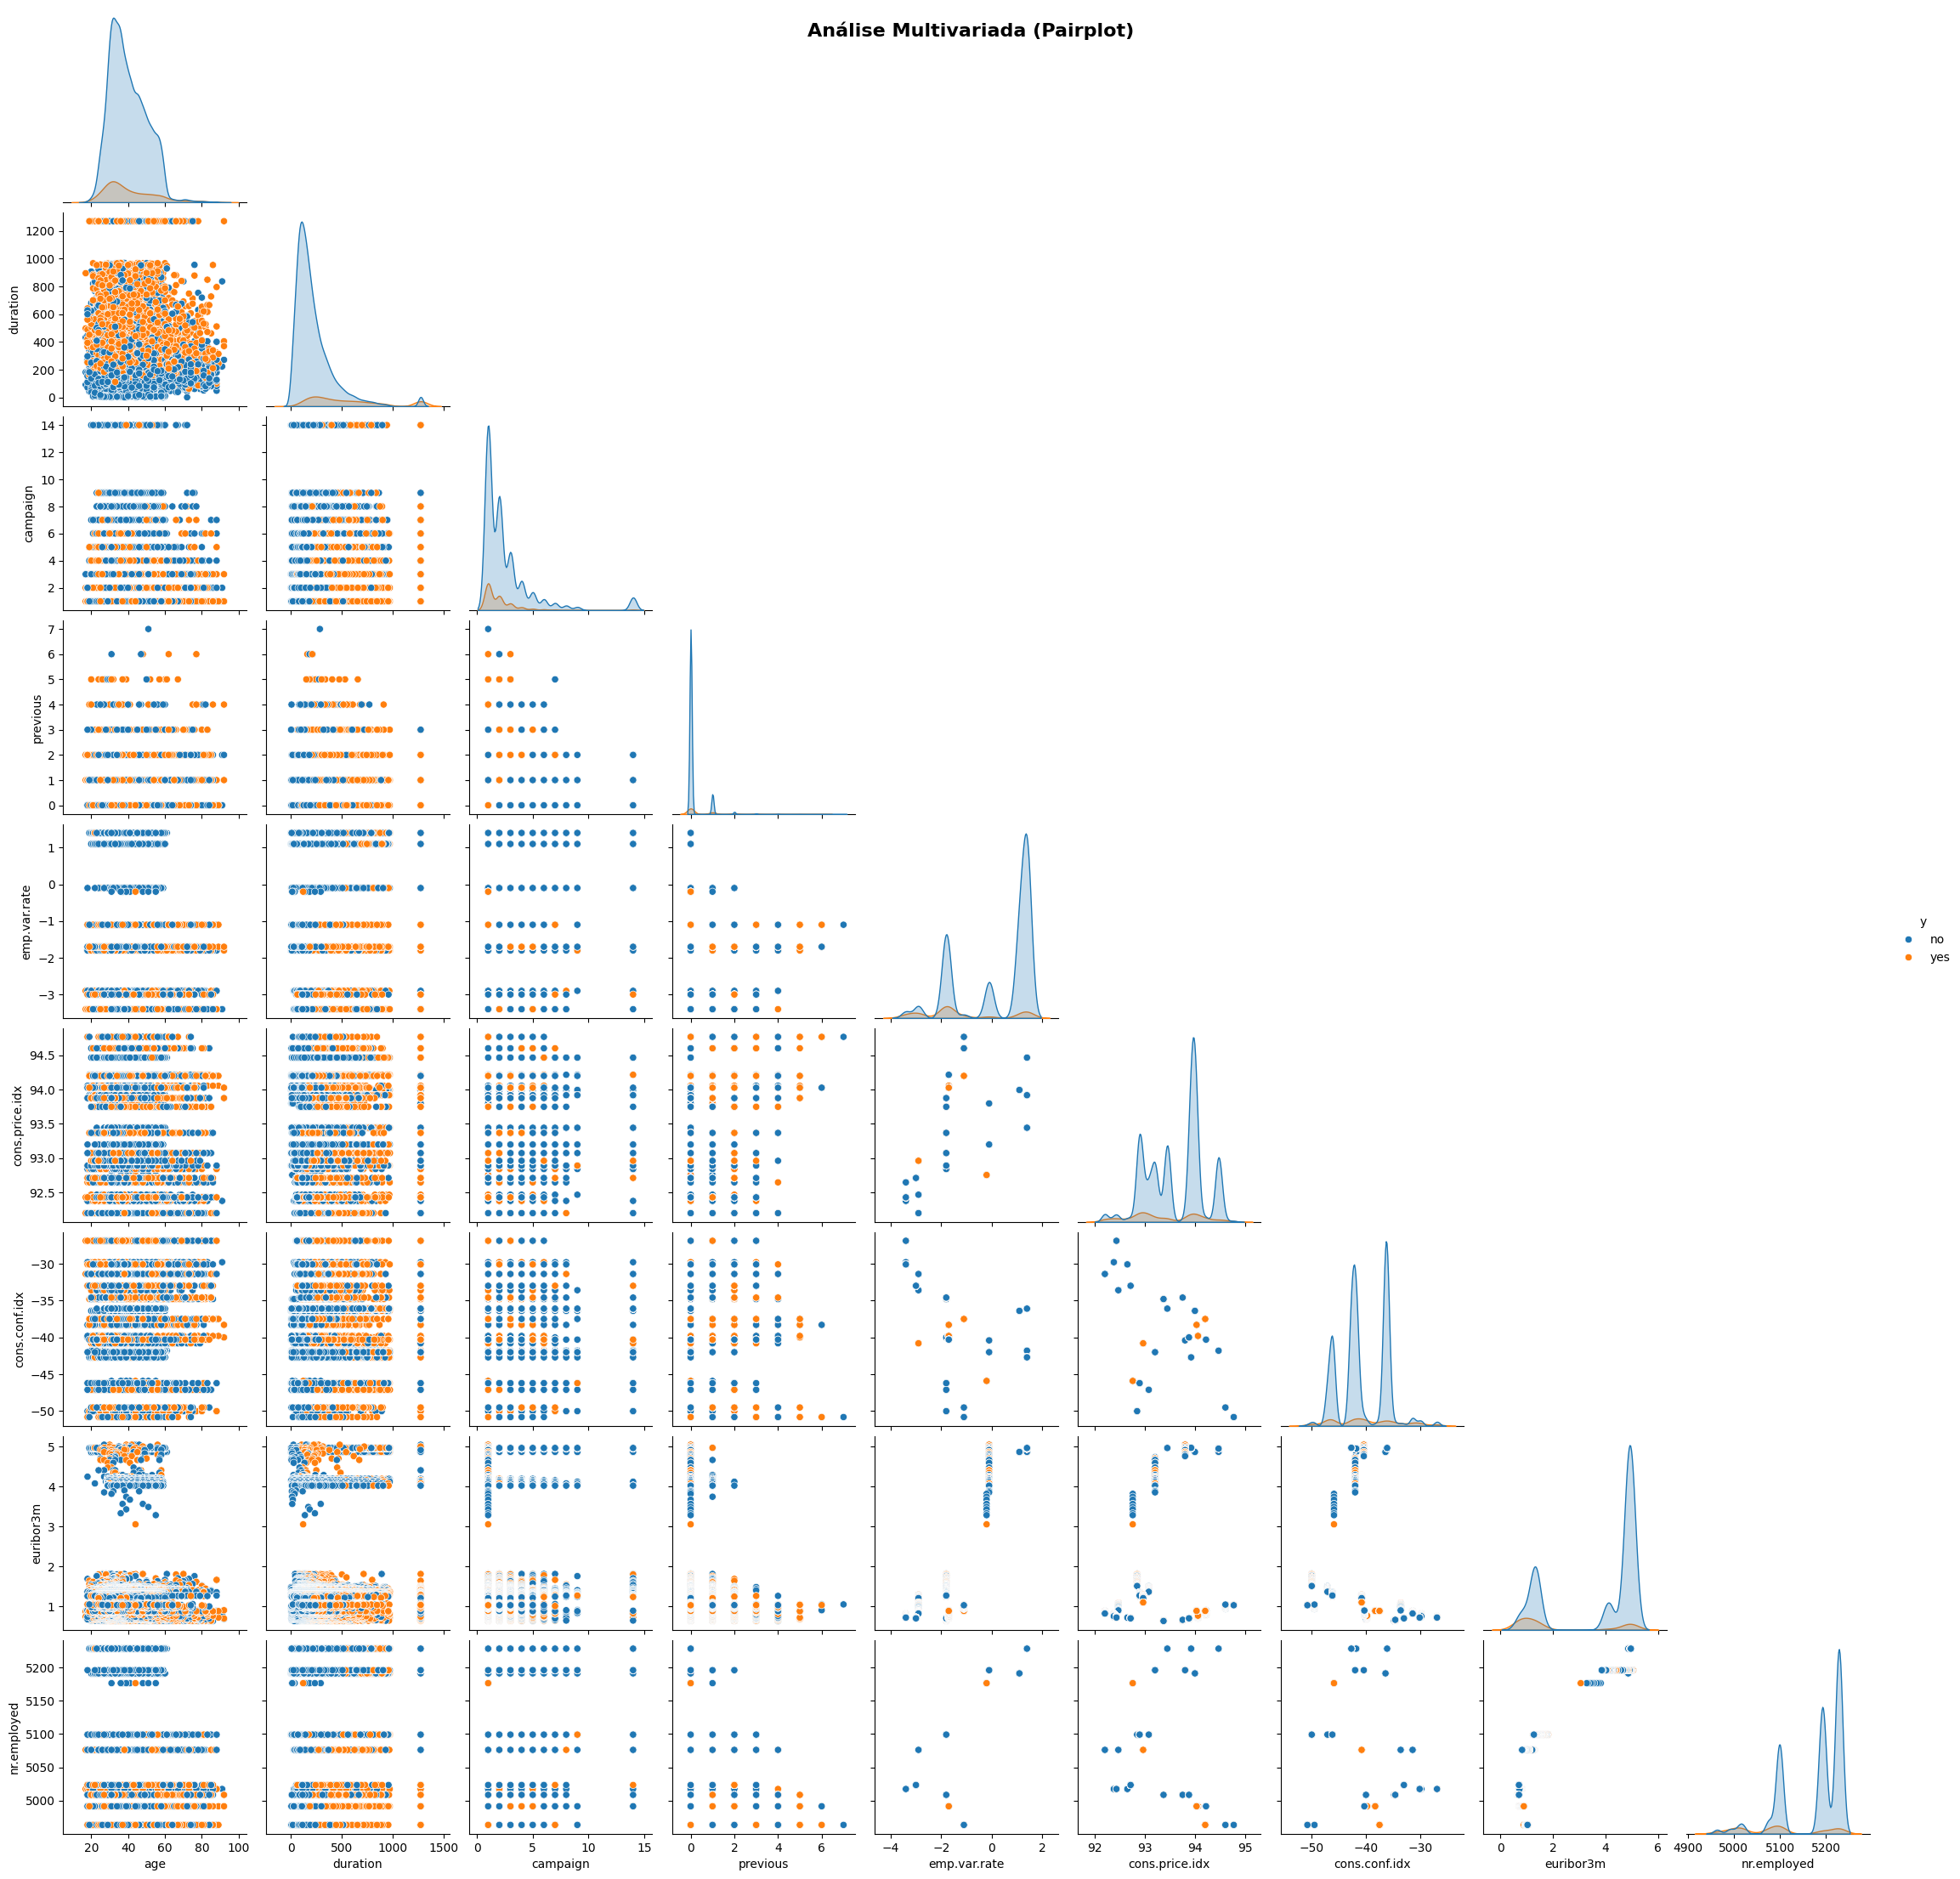

In [ ]:
# pairplot

plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='y', corner=True)
plt.suptitle('Análise Multivariada (Pairplot)', fontsize=16, weight='bold')
plt.show()


## Feature Engineering e Feature Selection

<details>
<summary><strong>  Ajustes:
 </strong> (Expandir)</summary>

**Feature Engineering**
  * Criar novas categorias:
    * Educação: agrupar categorias semelhantes (`basic.4y`,`basic.6y` e `basic.9y` -> `basic`);
    * Job: agrupar em categorias (`administrative`, `manual`, `entrepreneur`, `retired`, `student`, `unemployed`, `unknown`)
    * Age: Agrupamento por bins --> `Young` (até 25), `Adult` (26-40), `Middle-aged` (41-60), `Senior` (acima de 60)

**Importance Score:**

* As variáveis `poutcome`, `pdays` e `default` já foram apagadas, uma vez que tinham muitos missing values e não iriam contribuir para o modelo.
*  Como não temos um número muito elevado de variáveis e já identificamos relações entre as variáveis explicativas e a variável alvo, decidimos não aplicar métodos de seleção.
* Em vez disso, focou-se no conhecimento adquirido durante a Análise Exploratória de Dados (ADE) e recorreu-se ao cálculo e visualização do *Importance Score*.
* Para medir a relação foram utilizados testes estatísticos adequados à natureza dos dados, a **correlação bisserial** para variáveis numéricas e **Cramér’s V** para variáveis categóricas.



In [ ]:
# EDUCATION
# Agregar as categorias de educação semelhantes ("basic")
df['education'] = df['education'].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'basic')

# Verificar mudanças
print(df['education'].value_counts())

# JOB
# Ajustar categorias de job
job_mapping = {
    'admin.': 'administrative',
    'management': 'administrative',
    'technician': 'administrative',
    'blue-collar': 'manual',
    'services': 'manual',
    'housemaid': 'manual',
    'self-employed': 'entrepreneur',
    'retired': 'retired',
    'student': 'student',
    'unemployed': 'unemployed'
}

# aplicar mudanças à coluna 'job'
df['job'] = df['job'].replace(job_mapping)

# confirmar novos valores
print(df['job'].value_counts())

#AGE
# agrupar idades em categorias

# definir labels e respetivos limites
bins = [0, 25, 40, 60, float('inf')]
labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

# criar nova coluna para faixas etárias
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# df = df.drop('age', axis=1)

# Confirmar alterações
print(df['age_group'].value_counts())

education
university.degree      13893
basic                  12511
high.school             9512
professional.course     5240
illiterate                18
Name: count, dtype: int64
job
administrative    20411
manual            14279
entrepreneur       2877
retired            1718
unemployed         1014
student             875
Name: count, dtype: int64
age_group
Adult          21532
Middle-aged    17383
Senior          1192
Young           1067
Name: count, dtype: int64


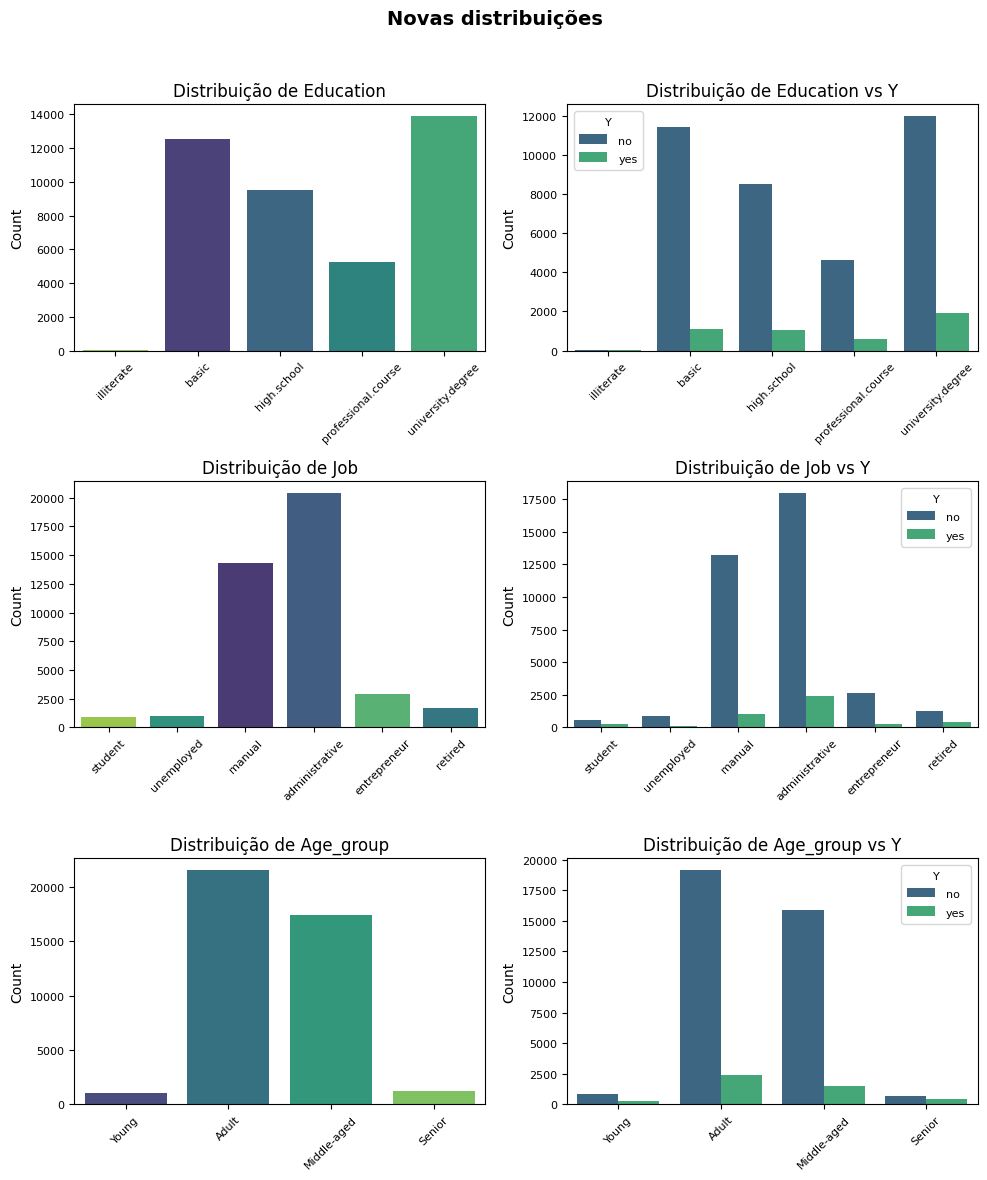

In [ ]:
# visualizar alterações

# figura 3x2
fig, axes = plt.subplots(3, 2, figsize=(10, 12))  # Reduced figsize

# título figura
fig.suptitle('Novas distribuições', fontsize=14, weight='bold')  # Reduced font size

# definir ordem das categorias
education_order = ['illiterate', 'basic', 'high.school', 'professional.course', 'university.degree']
job_order = ['student', 'unemployed', 'manual', 'administrative', 'entrepreneur', 'retired']
age_group_order = ['Young', 'Adult', 'Middle-aged', 'Senior']

# variáveis alteradas
variables = ['education', 'job', 'age_group']

# loop para definir ordem
for i, var in enumerate(variables):
    if var == 'education':
        order = education_order
    elif var == 'job':
        order = job_order
    elif var == 'age_group':
        order = age_group_order

    # Coluna 1: Distribuição geral por categoria
    sns.countplot(x=var, data=df, ax=axes[i, 0], palette="viridis", order=order, hue=var, legend=False)
    axes[i, 0].set_title(f'Distribuição de {var.capitalize()}', fontsize=12)
    axes[i, 0].set_xlabel('', fontsize=10)
    axes[i, 0].set_ylabel('Count', fontsize=10)
    axes[i, 0].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i, 0].tick_params(axis='y', labelsize=8)

    # Coluna 2: Distribuição com hue=y
    sns.countplot(x=var, hue='y', data=df, ax=axes[i, 1], palette="viridis", order=order)
    axes[i, 1].set_title(f'Distribuição de {var.capitalize()} vs Y', fontsize=12)
    axes[i, 1].set_xlabel('', fontsize=10)
    axes[i, 1].set_ylabel('Count', fontsize=10)
    axes[i, 1].tick_params(axis='x', rotation=45, labelsize=8)
    axes[i, 1].tick_params(axis='y', labelsize=8)

    #ajustar legenda
    legend = axes[i, 1].get_legend()
    if legend is not None:
        legend.set_title('Y', prop={'size': 8})
        for text in legend.get_texts():
            text.set_fontsize(8)

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<ipython-input-50-0ce1693d846f>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate = df_copy.groupby(var)['y'].value_counts(normalize=True).unstack()


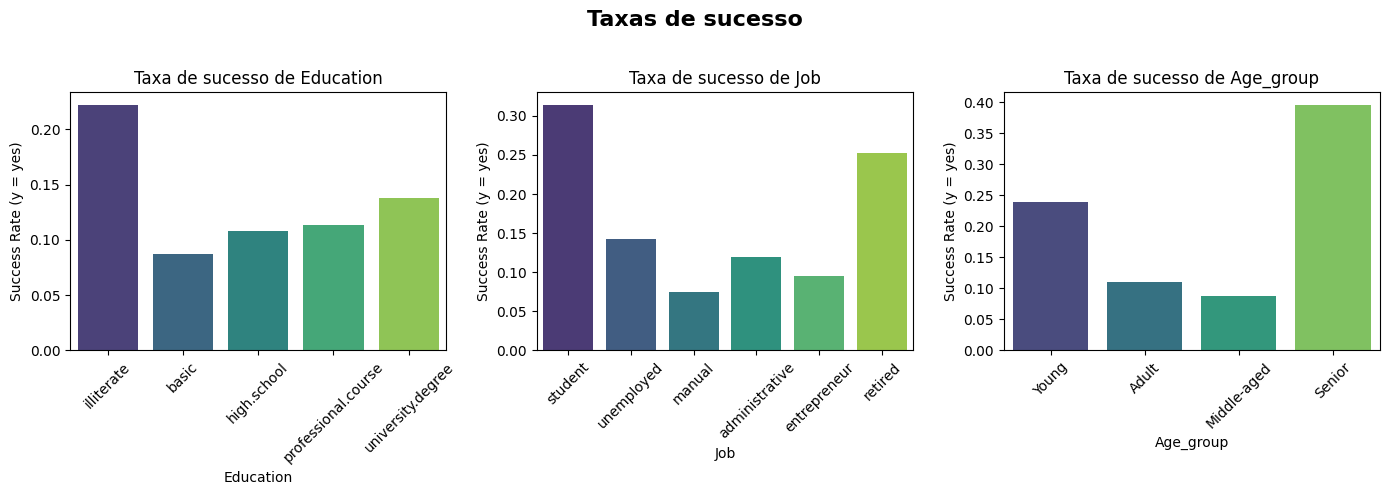

In [ ]:
# taxas de sucesso (proporção dos y=yes)

df_copy = df.copy()
variables = ['education', 'job', 'age_group']

# definir ordem das categorias
education_order = ['illiterate', 'basic', 'high.school', 'professional.course', 'university.degree']
job_order = ['student', 'unemployed', 'manual', 'administrative', 'entrepreneur', 'retired']
age_group_order = ['Young', 'Adult', 'Middle-aged', 'Senior']

# Create a dictionary to map variables to their respective orders
order_dict = {
    'education': education_order,
    'job': job_order,
    'age_group': age_group_order
}

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

# Set the title for the entire figure
fig.suptitle('Taxas de sucesso', fontsize=16, weight='bold')
# Loop through each variable and plot the success rate
for i, var in enumerate(variables):
    # calcular taxa de sucesso (proporção de y=yes)
    success_rate = df_copy.groupby(var)['y'].value_counts(normalize=True).unstack()

    # ordenar pela ordem estabelecida
    success_rate = success_rate.reindex(order_dict[var])

    # Plot
    sns.barplot(x=success_rate.index, y=success_rate['yes'], ax=axes[i], palette="viridis", order=order_dict[var], hue=success_rate.index, legend=False)
    axes[i].set_title(f"Taxa de sucesso de {var.capitalize()}", fontsize=12)
    axes[i].set_xlabel(var.capitalize(), fontsize=10)
    axes[i].set_ylabel("Success Rate (y = yes)", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

###Importance Score

<details>
<summary><strong>  Insights:
 </strong> (Expandir)</summary>

**Duration:** Maior impacto na variável y.
  * O tempo de duração da chamada é o fator mais importante na decisão do cliente, indicando que chamadas mais longas tendem a ter mais sucesso.

**Fatores Económicos (nr.employed, euribor3m, emp.var.rate):** Relevância significativa.
  * As condições económicas gerais influenciam a probabilidade de um cliente subscrever o depósito a prazo, sugerindo que o contexto macroeconómico desempenha um papel importante na decisão.

**Marital, age, day_of_week, housing, loan:** Variáveis com Menor Relevância
  * O estado civil, a idade, o dia da semana, a posse de crédito à habitação e ao consumo demonstram ter um impacto reduzido na decisão do cliente.

**Job, contact, cons.price.idx:** Variáveis com Importância Moderada
  * A profissão, o método de contacto e o índice de preços ao consumidor têm um impacto moderado na decisão do cliente, sugerindo que estas variáveis podem ser consideradas, mas não são tão determinantes quanto a duração da chamada ou os fatores económicos.


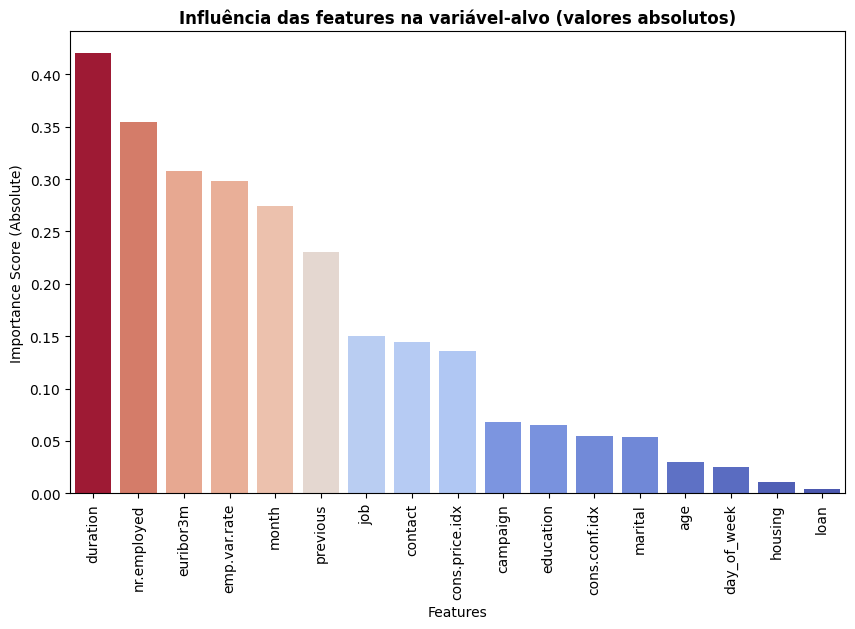

/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), array(float64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(int64, 1d, C), a

In [ ]:
# Mapear target para valores numéricos (0 e 1)
numeric_target = df['y'].map({'no': 0, 'yes': 1})

# Inicializar dicionário para armazenar a importância das variáveis
feature_importance = {}

# Correlação bisserial para variáveis numéricas
for col in numerical_features:
    biserial_corr, _ = stats.pointbiserialr(df[col], numeric_target)
    feature_importance[col] = biserial_corr  # Mantém valores negativos

# Função para calcular Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Cramer's V para variáveis categóricas
for col in categorical_features:
    feature_importance[col] = cramers_v(df[col], df['y'])

# DataFrame sem o target 'y'
importance_df = pd.DataFrame(feature_importance.items(), columns=["Feature", "Importance"])
importance_df = importance_df[importance_df["Feature"] != 'y']  # Remove target se estiver na lista
importance_df = importance_df.sort_values(by="Importance", ascending=True)  # Ordenar para exibir negativos abaixo do eixo X

# Resumo: Representação visual da influência de cada variável para com y (com valores absolutos)
importance_df_abs = importance_df.copy()
importance_df_abs["Importance"] = importance_df_abs["Importance"].abs()  # valor absoluto
importance_df_abs = importance_df_abs.sort_values(by="Importance", ascending=False)  # Ordenação decrescente

# Plot 2: Representação visual da influência de cada variável para com y (valores absolutos)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df_abs, x="Feature", y="Importance", hue="Importance", palette="coolwarm", dodge=False, legend=False)
plt.xticks(rotation=90)
plt.title("Influência das features na variável-alvo (valores absolutos)", fontsize=12, weight='bold')
plt.xlabel("Features")
plt.ylabel("Importance Score (Absolute)")
plt.show()

# Cálculo de Distância Correlation para pares de variáveis numéricas
dcor_numerical = pd.DataFrame(index=numerical_features, columns=numerical_features)

for i in numerical_features:
    for j in numerical_features:
        X = df[i].values
        Y = df[j].values
        dcor_value = dcor.distance_correlation(X, Y)
        dcor_numerical.loc[i, j] = dcor_value

# Cálculo de Mutual Information para pares de variáveis numéricas
mi_numerical = pd.DataFrame(index=numerical_features, columns=numerical_features)

for i in numerical_features:
    for j in numerical_features:
        mi_numerical.loc[i, j] = mutual_info_regression(df[[i]], df[j])[0]


In [ ]:
# exportar dados atuais num novo ficheiro

df.to_csv('Dados_ADE.csv', index=False)
files.download('Dados_ADE.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Clusters


<details>
<summary><strong> Método do cotovelo
 </strong> (Expandir)</summary>

* **Objetivo:** Encontrar o número ideal de clusters usando o gráfico do Método do Cotovelo.
* **Inércia:** Representa a soma das distâncias quadradas dos pontos aos seus centros de cluster.
* **Ponto de Cotovelo:** Onde a inércia começa a diminuir a uma taxa mais lenta.
* **Interpretação do Gráfico:**
  * **Queda mais notável** entre 1 e 2 clusters, desacelera gradualmente após isso.
  * **Número Ideal de Clusters:** o cotovelo não parece extremamente definido, mas parece começar a estabilizar-se por volta dos 3 clusters.
</details>

<details>
<summary><strong> Análise e insights do Plot "Clustering KMeans"
 </strong> (Expandir)</summary>

* No gráfico são visíveis 3 clusters. Cada ponto representa uma observação e as cores indicam a qual cluster o ponto foi atribuído.
* Os eixos Componente Principal 1 e Componente Principal 2 são resultados de uma técnica de redução de dimensionalidade (PCA), que permite visualizar dados multidimensionais num espaço bidimensional.
* **Insights:**
  * Há três clusters distintos identificados pelo KMeans, representados por cores diferentes:
    * Um cluster grande e bem disperso (amarelo, à direita);
    * Um cluster mais compacto e segmentado, com umas formas bem definidas (roxo, à esquerda). Ao contrário do anterior, a sua concentração indica uma similaridade substancial entre os pontos de dados;
    * Um cluster mais central, mais compacto que o cluster amarelo e mais disperso que o cluster roxo. Pode-se concluir que é significativamente disperso (teal, ao centro)
    * A sobreposição de pontos, especialmente nas áreas de fronteira entre os clusters, indica a necessidade de métodos de classificação mais robustos.
  * **Desequilíbrio de Classes**: O cluster à direita é significativamente maior que os outros dois. Isso pode indicar desbalanceamento de classes, levando modelos como regressão logística ou SVM a favorecer a classe maioritária.
    * **Solução:** Implementar **estratégias de balanceamento**.
  * O cluster maior é muito disperso, enquanto os clusters menores são compactos. Isso pode indicar que os dados **seguem distribuições diferentes**, o que dificultará a generalização dos modelos de ML.
    * **Solução:** Transformações dos dados (ex: Standard Scaling) e **ajustar parâmetros em modelos sensíveis a distribuição**.
  * Alguns pontos aparecem **dispersos e mal definidos** nos limites dos clusters. Isto pode levar a **dificuldades nos modelos lineares (regressão logística) e problemas para definir fronteiras de decisão (KNN e SVM)**  em encontrar um bom hiperplano de separação.
    * **Solução:** Afinar o modelo *SVM* com *kernel RBF* e ajustar o parâmetro C e Gamma (SVM), assim como o número de vizinhos (KNN). Pode-se, ainda, procurar modelos não lineares, como *Random Forest* e *XGBoost*, podem capturar melhor essa complexidade.
  * Modelos baseados em árvores (Random Forest, XGBoost) costumam lidar bem com a **heterogeneidade dos clusters** e **podem explorar melhor esta complexidade sem necessidade de PCA**.
  * A **avaliação** de diferentes modelos, tanto lineares quanto não lineares, utilizando **métricas de desempenho relevantes**, como AUC e F1-Score, é fundamental para identificar o modelo mais adequado para os dados em questão.
</details>


<details>
<summary><strong> Distribuições dos 3 Clusters pelas variáveis numéricas
 </strong> (Expandir)</summary>

Algumas variáveis apresentam diferenças claras entre os clusters, enquanto outras têm distribuições mais similares, o que pode indicar maior ou menor poder discriminativo das features:
* **Age:** A distribuição da idade é semelhante entre os clusters, com uma pequena variação na dispersão;
* **Duration:** Todos os clusters apresentam uma variação e, principalmente o cluster 1 apresenta maior número de outliers com valores muito altos;
* **Campaign:** A maioria dos valores está em faixas baixas (1 a 3) nos três clusters. O cluster 0 apresenta maior dispersão, com algumas observações mais elevadas. Já os clusters 1 e 2 têm distribuições mais compactas, indicando que a maior parte dos clientes foi contatada poucas vezes;
* **Previous:** A maioria dos clusters apresenta uma distribuição concentrada em zero. O cluster 2 parece ter uma maior frequência de valores acima de zero, sugerindo que os clientes nesse grupo já haviam sido contatados anteriormente com mais frequência do que nos demais;
* **Emp.var.rate:** O cluster 0 tende a apresentar valores mais positivos ou próximos de zero, que podem ser encarados como perídodos de crescimento económico. O cluster 1 fica em uma faixa intermediária (entre 0 e valores negativos) e o cluster 2, por sua vez, mostra valores predominantemente negativos, indicando um período económico menos favorável;
* **Cons.price.idx:** A distribuição varia entre os clusters, mas não de forma extrema. A maior diferença entre clusters é que o cluster 0 atinge valores mais altos, o cluster 1 valores mais baixos que o anterior, enquanto que a maior concentração nos valores mais baixoso é sentida no cluster 2;
* **Cons.conf.idx:** o cluster 0 apresenta os valores intermédios registados, enquanto que o cluster 1 apresenta os valores mais baixos (menor confiança) e o cluster 2 apresenta os valores mais elevados. Esta análise também permite identificar uma heterogeneidade nos perfis;
* **Euribor3m:** Há uma clara separação entre os clusters. O cluster 0 tem valores muito mais altos do que os clusters 1 e 2. O cluster 1 apresenta valores mais intermédios, com concentração nos valores mais baixos, enquanto que o cluster 2 se concentra totalmente nos valores mais baixos registados, refletindo períodos de juros menores.
* **Nr.employed:** Os clusters também se diferenciam de forma marcante em relação ao número de empregados. O cluster 0 costuma ter os valores mais altos (indicando maior nível de emprego), enquanto o cluster 1 apresenta valores intermediários e o cluster 2 tem os valores mais baixos, sinalizando um cenário de menor empregabilidade.
</details>

<details>
<summary><strong> Conclusões
 </strong> (Expandir)</summary>

A análise anterior sugere que algumas variáveis apresentam diferenças mais marcadas entre os clusters. As variáveis com alto poder discriminatório que podem vir a ser importantes para modelos são:
* campaign
* euribor3m
* nr.employed
* emp.var.rate
</details>


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

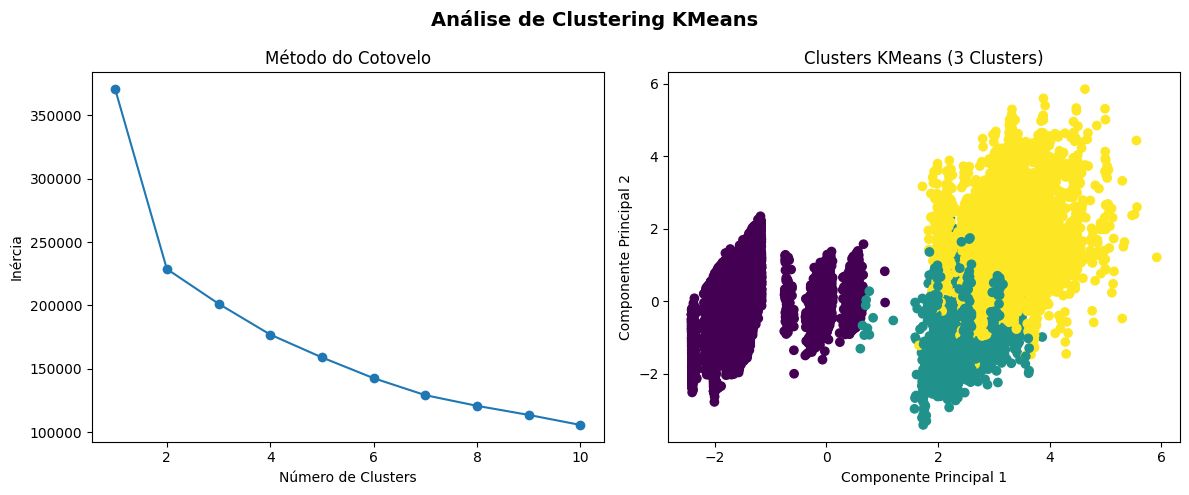

In [ ]:
# Utilizar uma cópia do DataFrame
df_cluster = df.copy()

# Converter as features numéricas para um array NumPy
X = df_cluster[numerical_features].values

# Padronizar as features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Criar um modelo KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Treinar o modelo nos dados
kmeans.fit(X)

# Aplicar PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Obter os labels dos clusters
labels = kmeans.labels_

# Calcular a inércia para o método do cotovelo
inertia = []
for i in range(1, 11):
    kmeans_elbow = KMeans(n_clusters=i, random_state=42)
    kmeans_elbow.fit(X)
    inertia.append(kmeans_elbow.inertia_)

# Criar a figura com 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot do método do cotovelo (ax1)
ax1.plot(range(1, 11), inertia, marker='o')
ax1.set_title('Método do Cotovelo')
ax1.set_xlabel('Número de Clusters')
ax1.set_ylabel('Inércia')

# Plot dos clusters KMeans (ax2)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
ax2.set_title('Clusters KMeans (3 Clusters)')
ax2.set_xlabel('Componente Principal 1')
ax2.set_ylabel('Componente Principal 2')

# Título geral da figura
fig.suptitle('Análise de Clustering KMeans', fontsize=14, weight='bold')

# Ajustar o layout e mostrar a figura
plt.tight_layout()
plt.show()

In [ ]:
# adicionar coluna "cluster" ao df_cluster
df_cluster['cluster'] = labels
cluster_means = df_cluster.groupby('cluster')[numerical_features].mean()
print(cluster_means)

               age    duration  campaign  previous  emp.var.rate  \
cluster                                                            
0        40.194254  251.019553  2.758330  0.026563      1.116252   
1        37.866283  260.867593  2.203451  0.310157     -1.844572   
2        44.319352  291.089684  1.843642  0.894346     -2.536607   

         cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
cluster                                                         
0             93.843091     -39.460004   4.817594  5213.395927  
1             93.029398     -46.091353   1.309542  5090.533501  
2             93.023843     -33.720096   0.808792  5024.215211  


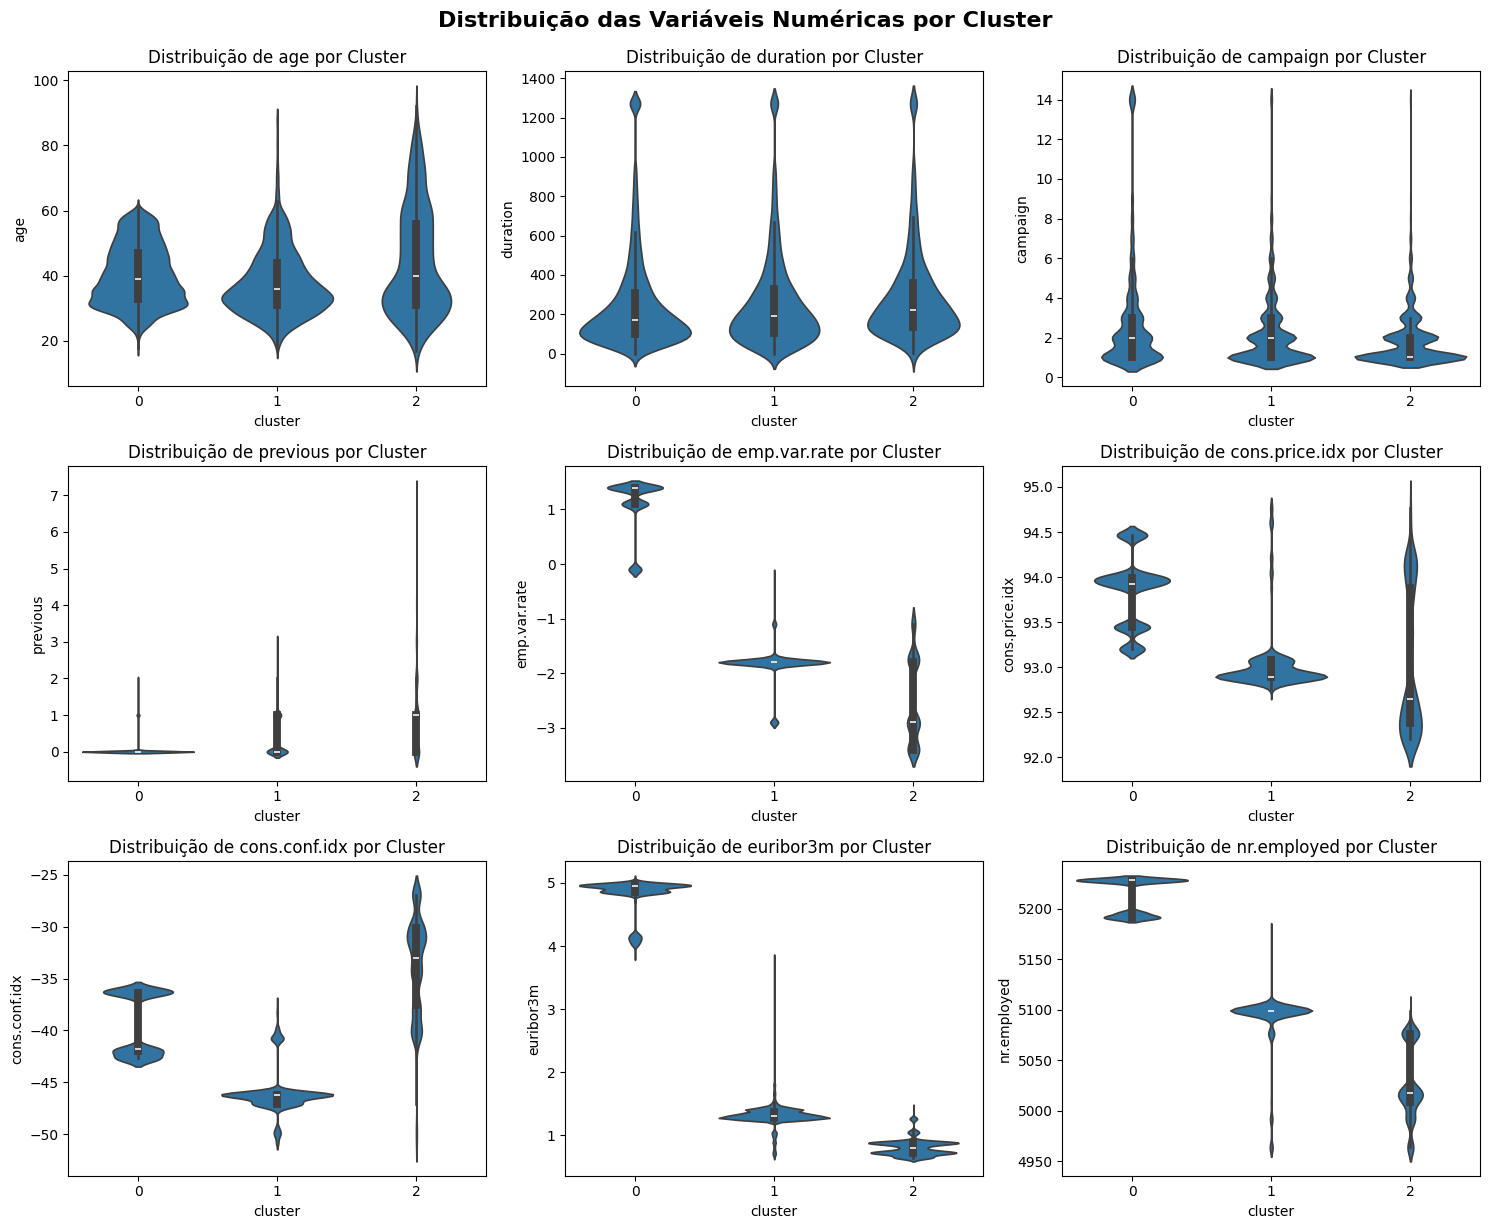

In [ ]:
# Criar a figura e os subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Iterar pelas features e plotar os violin plots
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.violinplot(x='cluster', y=feature, data=df_cluster, ax=ax) # violin plot
    ax.set_title(f'Distribuição de {feature} por Cluster') # título do subplot

# Ajustar o layout e mostrar a figura
plt.tight_layout()
plt.suptitle('Distribuição das Variáveis Numéricas por Cluster', fontsize=16, y=1.02, weight='bold')
plt.show()

In [ ]:
# exportar dados clustering num novo ficheiro

df.to_csv('Dados_ADE_cluster.csv', index=False)
files.download('Dados_ADE_cluster.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Tratamento


<details>
<summary><strong> Preprocessing setup em Machine Learning:
 </strong> (Expandir)</summary>

O tratamento dos dados foi aplicado em pipeline, na [parte de Machine Learning](https://colab.research.google.com/drive/1-Ij--C0aJDr_FiQNC4jfLwHs-WJQ-7R9#scrollTo=6Z4rA8GUvRso&line=2&uniqifier=1). Adotou-se esta abordagem por:
* otimizar todas as transformações necessárias e garantir que as entradas dos modelos estão adequadas a cada caso;
* definir uma sequência de etapas de processamento de dados que transforma os dados até estes se encontrarem prontos a ser utilizados pelo modelo. Desta forma, além de garantir uma organização das tarefas, permite que estas estejam automatizadas e sejam consistentes na aplicação a novos dados, o que evita inconsistências e erros.


Etapas de transformação adicionadas:
* **Codificação**, uma vez que alguns modelos usados exigem entradas de dados numéricos, como é o caso da Regressão Logística, K-Nearest Neighbors (KNN) e Support Vector Machines (SVM). Técnicas implementadas:
  * **One-Hot Encoding** foi aplicado às variáveis categóricas nominais, como `job`, `marital`, `contact`, `month` e `day_of_week`. Esta técnica cria colunas separadas para cada categoria, atribuindo um valor de verdadeiro/falso, evitando alguma interpretação de ordem entre as categorias encontradas.
  * **Ordinal Encoding** foi aplicado às variáveis categóricas ordinais (como `education` e `age_group`). Nestes casos é atribuído um valor numérico inteiro a cada categoria, atribuído e mantendo uma ordem pretendida. Essa ordem está explícita através de listas (`education_order` e `age_group_order`) que preservam a sequência dos números a atribuir no preprocessor;
  * Às variáveis binárias (`housing` e `loan`) foi aplicado o **One-Hot Enconding**, para evitar pressupostos ordinais, mantendo a codificação 0/1. Corresponde ao comportamento do BinaryEncoder para caraterísticas binárias (sem a necessidade de instalar mais uma biblioteca).
* **Scalling**, através do **StandardScaler**, ajusta a escala das variáveis numéricas com o objetivo de melhorar o desempenho de alguns algoritmos de machine learning sensíveis à escala dos dados, como KNN e SVM.
</details>


```
# Preprocessing setup

# Definir listas de features
categorical_nominal = ['job', 'marital', 'contact', 'month', 'day_of_week']
categorical_ordinal = ['education', 'age_group']
binary_ordinal = ['housing', 'loan']
numeric_features = ['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Definir ordem para features ordinais
education_order = ['illiterate', 'basic', 'high.school', 'professional.course', 'university.degree']
age_group_order = ['Young', 'Adult', 'Middle-aged', 'Senior']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat_nom', OneHotEncoder(handle_unknown='ignore'), categorical_nominal),
    ('cat_ord', OrdinalEncoder(categories=[education_order, age_group_order]), categorical_ordinal),
    ('bin_ord', OneHotEncoder(drop='if_binary', dtype=int), binary_ordinal)
], sparse_threshold=0) # para forçar output denso (para o XGBoost e o LightGBM)

print('Preprocessing concluído!')

```

 [(Ligação para a célula)](https://colab.research.google.com/drive/1-Ij--C0aJDr_FiQNC4jfLwHs-WJQ-7R9#scrollTo=6Z4rA8GUvRso&line=2&uniqifier=1).

nota: o **encoding** do `Y` foi aplicado antes do pipeline, logo na divisão dos dados, através do **label encoding**:

```
y = df['y'].map({'no': 0, 'yes': 1})

```

# Parte 2 - MML

## Bibliotecas para MML

<details>
<summary><strong> Notas:
 </strong> (Expandir)</summary>

 * Foi necessário fazer um downgrade à biblioteca sklearn e instalar o `scikit-learn==1.3.0` e voltar a instalar `dask`.
 * Optou-se por suprimr temporariamente os avisos `ConvergenceWarning` gerados por alguns algoritmos (regressão linear);
 * Impedir que o colab se desconectasse, para garantir que não iria impedir as tarefas de longa duração. Foi possível ao simular um clique no botão "Reconnect" do Colab a cada 60 segundos. </details>

In [ ]:
# bibliotecas utilizadas para os modelos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, average_precision_score, roc_auc_score, precision_score, recall_score,
                             f1_score, precision_recall_curve, confusion_matrix, roc_curve,
                             classification_report, RocCurveDisplay, PrecisionRecallDisplay,
                             ConfusionMatrixDisplay, auc)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import time
import joblib

# Suprimir avisos de convergência
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Impedir que o Colab se desligue
from google.colab import output
output.eval_js("function ClickConnect() { console.log('Working'); document.querySelector('colab-toolbar-button[title=\"Reconnect\"]').click() } setInterval(ClickConnect, 60000)")

4

## Train-Test Split

<details>
<summary><strong> Notas:
 </strong> (Expandir)</summary>

 * **Problema**:
  * Desequilíbrio de classes na variável alvo "y": 88,73% "não" e 11,27% "sim".
  * Risco de enviesamento do modelo para a classe majoritária ("não").

* **Solução**:
  * Divisão estratificada dos dados para treino e teste, com base na variável "y".
  * Garante distribuição equilibrada das classes em ambos os conjuntos.

* **Parâmetros da divisão**:
  * Tamanho do conjunto de teste: 20% dos dados.
  * Tamanho do conjunto de treino: 80% dos dados.
  * `random_state=42`: garante reprodutibilidade dos resultados.

* **Resultados**:
  * Distribuição equilibrada de "y" em treino e teste, conforme apresentado pelos prints.
  * Evita enviesamento e dá maior peso à classe minoritária ("sim").

* **Conclusão**:
  * A divisão estratificada com os parâmetros definidos garante uma melhor representação das classes e contribui para a construção de um modelo mais robusto e preciso.

In [ ]:
# separação features (X) e target (y)

X = df[['age_group', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
y = df['y'].map({'no': 0, 'yes': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Treino: {X_train.shape[0]}')
print(f'Teste: {X_test.shape[0]}')

# ver divisão de valores y
print(y_train.value_counts()) # no treino
print(y_test.value_counts()) # no teste

Treino: 32939
Teste: 8235
y
0    29228
1     3711
Name: count, dtype: int64
y
0    7307
1     928
Name: count, dtype: int64


## Tratamento

<details>
<summary><strong> Preprocessing setup:
 </strong> (Expandir)</summary>

O tratamento dos dados foi aplicado em pipeline por:
* otimizar todas as transformações necessárias e garantir que as entradas dos modelos estão adequadas a cada caso;
* definir uma sequência de etapas de processamento de dados que transforma os dados até estes se encontrarem prontos a ser utilizados pelo modelo. Desta forma, além de garantir uma organização das tarefas, permite que estas estejam automatizadas e sejam consistentes na aplicação a novos dados, o que evita inconsistências e erros.


Etapas de transformação adicionadas:
* **Codificação**, uma vez que alguns modelos usados exigem entradas de dados numéricos, como é o caso da *Regressão Logística*, *K-Nearest Neighbors* (KNN) e Support Vector Machines (SVM). Técnicas implementadas:
  * **One-Hot Encoding** foi aplicado às variáveis categóricas nominais, como `job`, `marital`, `contact`, `month` e `day_of_week`. Esta técnica cria colunas separadas para cada categoria, atribuindo um valor de verdadeiro/falso, evitando alguma interpretação de ordem entre as categorias encontradas.
  * **Ordinal Encoding** foi aplicado às variáveis categóricas ordinais (como `education` e `age_group`). Nestes casos é atribuído um valor numérico inteiro a cada categoria, atribuído e mantendo uma ordem pretendida. Essa ordem está explícita através de listas (`education_order` e `age_group_order`) que preservam a sequência dos números a atribuir no preprocessor;
  * Às variáveis binárias (`housing` e `loan`) foi aplicado o **One-Hot Enconding**, para evitar pressupostos ordinais, mantendo a codificação 0/1. Corresponde ao comportamento do BinaryEncoder para caraterísticas binárias (sem a necessidade de instalar mais uma biblioteca).
* **Scalling**, através do **StandardScaler**, ajusta a escala das variáveis numéricas com o objetivo de melhorar o desempenho de alguns algoritmos de machine learning sensíveis à escala dos dados, como *KNN* e *SVM*.

```
# Definir listas de features
categorical_nominal = ['job', 'marital', 'contact', 'month', 'day_of_week']
categorical_ordinal = ['education', 'age_group']
binary_ordinal = ['housing', 'loan']
numeric_features = ['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Definir ordem para features ordinais
education_order = ['illiterate', 'basic', 'high.school', 'professional.course', 'university.degree']
age_group_order = ['Young', 'Adult', 'Middle-aged', 'Senior']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat_nom', OneHotEncoder(handle_unknown='ignore'), categorical_nominal),
    ('cat_ord', OrdinalEncoder(categories=[education_order, age_group_order]), categorical_ordinal),
    ('bin_ord', OrdinalEncoder(), binary_ordinal)
], sparse_threshold=0) # para forçar output denso (para o XGBoost e o LightGBM)

print('Preprocessing concluído!')

```
nota: o **encoding** do `Y` foi aplicado antes do pipeline, logo na divisão dos dados, através do **label encoding**:

```
y = df['y'].map({'no': 0, 'yes': 1})

```

* A implementação de um pipeline também simplificou a manutenção dos modelos. Esta abordagem centralizada permitiu realizar ajustes que se revelaram necessários, como a alteração do `sparse_threshold` no `ColumnTransformer` para lidar com a incompatibilidade entre matrizes esparsas e modelos baseados em árvores (*XGBoost*, *LightGBM*). Esta alteração foi inserida neste local e automaticamente aplicada a todo o processo, evitando gerir múltiplos fluxos de trabalho para diferentes tipos de modelos.
* O resultado final do pipeline são os dados pré-processados, que são então alimentados pelos modelos de machine learning.


In [ ]:
# Preprocessing setup

# Definir listas de features
categorical_nominal = ['job', 'marital', 'contact', 'month', 'day_of_week']
categorical_ordinal = ['education', 'age_group']
binary_ordinal = ['housing', 'loan']
numeric_features = ['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Definir ordem para features ordinais
education_order = ['illiterate', 'basic', 'high.school', 'professional.course', 'university.degree']
age_group_order = ['Young', 'Adult', 'Middle-aged', 'Senior']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat_nom', OneHotEncoder(handle_unknown='ignore'), categorical_nominal),
    ('cat_ord', OrdinalEncoder(categories=[education_order, age_group_order]), categorical_ordinal),
    ('bin_ord', OneHotEncoder(drop='if_binary', dtype=int), binary_ordinal)
], sparse_threshold=0) # para forçar output denso (para o XGBoost e o LightGBM)

print('Preprocessing concluído!')

Preprocessing concluído!


## Definir modelos e hiperparâmetros

<details>
<summary><strong> Critérios para seleção de modelos e hiperparâmetros:
 </strong> (Expandir)</summary>

* **Objetivo:** Prever a variável "y" (subscrição de depósito a prazo).

* Critérios para a escolha dos modelos:
  * Diversidade de algoritmos (lineares, não lineares e ensemble methods).
  * Tratamento de classes desbalanceadas com `class_weight` e `scale_pos_weight`.
  * Controle de overfitting com `C` e `max_depth`. </details>


<details>
<summary><strong> Regressão Logística
 </strong> (Expandir)</summary>

  * Modelo linear que estima a probabilidade de uma instância pertencer a uma classe. Usa a função sigmóide para mapear valores entre 0 e 1 e retorna uma variável binária ("Sim" ou "Não").

  * Vantagens: Menos complexo matematicamente e computacionalmente. Adequado quando a relação entre features e target é aproximadamente linear.

  * Melhoria de performance / Ajuste de hiperparâmetros:
    * `C`: controla a força da regularização. Testados: `[0.01, 0.1, 1, 10]` -> Melhor valor: `1`.
    * `solver`: algoritmo de otimização. Testados: `liblinear`, `lbfgs`. -> Melhor valor: `lbfgs` (regularização L2, robusto a outliers, menor interpretabilidade).
    </details>

<details>
<summary><strong> KNN
</strong> (Expandir)</summary>

  * Modelo não paramétrico que classifica um ponto com base nos vizinhos mais próximos.

  * Simples e fácil de interpretar. Requer mais armazenamento e é mais lento para prever do que a Regressão Logística, mas permite capturar padrões mais complexos.

  * Melhoria de performance / Ajuste de hiperparâmetros:
    * `n_neighbors`: número de vizinhos a considerar. Testados: `3, 5, 7`. Valores menores capturam padrões locais, valores maiores suavizam a decisão. Melhor valor: `7`.
    * `weights`: ponderação/peso dos vizinhos. Testados: `uniform` (igual peso entre vizinhos), `distance` (atribui maior peso os vizinhos mais longe). Melhor valor: `uniform`.  
       
</details>
<details>
<summary><strong> SVM
</strong> (Expandir)</summary>

 * Encontra o hiperplano que melhor separa as classes. Labels atribuídas com base na posição em relação ao hiperplano. Maximiza a margem entre as classes e minimiza erros de classificação.
 * Melhoria de performance / Ajuste de hiperparâmetros:
   * `C`: parâmetro de regularização. Testados: `0.1, 1, 10`. Melhor valor: `1`.
   * `kernel`: função de transformação dos dados. Testados: `linear`, `rbf`. Melhor valor: `rbf` (fronteiras não lineares).
   * `gamma`: coeficiente do kernel, ajusta a influência de cada ponto. Testados: `'scale'`, `auto`. Melhor valor: `auto`.
   * outras observações:
     * Adicionou-se o `class_weight` para o desequilíbrio de classes.
     * o ajuste de `C`, `kernel` e `gamma` permite capturar relações não lineares e generalizar.
     * Processo computacionalmente pesado e lento.
     
</details>
<details>
<summary><strong> Árvore de Decisão
</strong> (Expandir)</summary>

  * Classificação baseada em regras hierárquicas e decisões binárias.
  * Grid search encontra a melhor "pergunta" de divisão para cada passo.
  * Usa dados categóricos sem pré-processamento ou escalonamento.
  * Vantagens: Fácil de implementar, interpretar e visualizar.
  * Desvantagens: Propenso a overfitting.
  * Melhoria de performance / Ajuste de hiperparâmetros:
    * `max_depth`: profundidade máxima da árvore. Testados: `None, 10, 20`. Melhor valor: `10`.
    * `min_samples_split`: número mínimo de amostras para dividir um nó. Testados: `2, 5, 10`. Melhor valor: `10`.  
</details>

<details>
<summary><strong> Random Forest
</strong> (Expandir)</summary>

 * Modelo ensemble que combina as previsões de várias árvores de decisão. Melhora a precisão e reduz o overfitting.
 * Utiliza aleatoriedade para garantir baixa correlação entre as árvores.
 * Melhoria de performance / Ajuste de hiperparâmetros:
   * `n_estimators`: número de árvores na floresta. Testados: `50, 100, 200`. Melhor valor: `200`.
   * `max_depth`: profundidade máxima da árvore. Testados: `None, 10, 20`. Melhor valor: `10`.  
      
</details>
<details>
<summary><strong> Gradient Boosting
</strong> (Expandir)</summary>

 * Modelo ensemble que utiliza boosting para melhorar a performance. Cria árvores sequenciais que focam nos resíduos das anteriores, ajustando e corrigindo iterativamente o modelo.
 * Melhoria de performance / Ajuste de hiperparâmetros:
   * `n_estimators`: número de árvores. Testados: `50, 100, 200`. Melhor valor: `100`.
   * `max_depth`: profundidade máxima da árvore. Testados: `3, 5, 7`. Melhor valor: `5`.
   * `learning_rate`: taxa de aprendizagem. Testados: `0.01, 0.1, 0.2`. Melhor valor: `0.1`.    
</details>

<details>
<summary><strong> XGBoost
</strong> (Expandir)</summary>

  * Implementação otimizada do Gradient Boosting, com melhor desempenho e recursos adicionais.
  * Melhoria de performance / ajuste de hiperparâmetros:
    * `n_estimators`: número de árvores. Testados: `50, 100, 200`. Melhor valor: `100`.
    * `learning_rate`: taxa de aprendizagem. Testados: `0.01, 0.1, 0.2`. Melhor valor: `0.1`
    * `max_depth`: profundidade máxima da árvore. Testados: `3, 5, 7`. Melhor valor: `5`
    * `scale_pos_weight`: adicionado para controlar o balanço entre as classes, dando peso à classe minoritária.
</details>

<details>
<summary><strong> LightGBM
</strong> (Expandir)</summary>
    
 * Implementação otimizada do Gradient Boosting, com foco em velocidade e eficiência.
 * Melhoria de performance / ajuste de hiperparâmetros:
   * `n_estimators`: número de árvores. Testados: `50, 100, 200`. Melhor valor: `100`
   * `learning_rate`: taxa de aprendizagem. Testados: `0.01, 0.1, 0.2`. Melhor valor: `0.1`
   * `max_depth`: profundidade máxima da árvore. Testados: `3, 5, 7`. Melhor valor: `7`
   * `scale_pos_weight`: valor definido como `7.876` para dar peso à classe minoritária.  
</details>

In [ ]:
# Modelos e hiperparâmetros
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]  # para calcular o peso da classe minoritária

models = {
    'Logistic Regression': {
        'model': LogisticRegression(class_weight='balanced', random_state=42),
        'params': {
            'model__C': [0.01, 0.1, 1, 10],
            'model__solver': ['liblinear', 'lbfgs']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance']  # 'distance' para ajudar no balanço
        }
    },
    'SVM': {
        'model': SVC(class_weight='balanced', probability=True, random_state=42),
        'params': {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['linear', 'rbf'],
            'model__gamma': ['scale', 'auto']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(class_weight='balanced', random_state=42),
        'params': {
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(random_state=42, eval_metric='logloss', scale_pos_weight=scale_pos_weight),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(random_state=42),
        'params': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7],
            'model__scale_pos_weight': [scale_pos_weight]
        }
    }
}

## Treino e Avaliação dos Modelos

<details>
<summary><strong> Resumo do treino, avaliação e armazenamento dos resultados:
 </strong> (Expandir)</summary>

O seguinte código, em conjunto o que foi definido nas células anteriores,  automatiza o processo de treino e avaliação de múltiplos modelos com diferentes configurações, permitindo comparar o seu desempenho e escolher o melhor modelo para o problema:
  * **Iterar sobre os modelos:** O código itera por um dicionário `models`, onde cada chave é o nome do modelo e o valor é a sua configuração.
  * **Criar um pipeline:** Para cada modelo, um pipeline é criado com um pré-processador e o modelo. (o pré-processador `preprocessor` foi definido anteriormente no código)
  * **Otimizar hiperparâmetros:** Uma busca em grid search é realizada em `GridSearchCV`, para encontrar os melhores hiperparâmetros para o modelo com base na métrica de `scoring` selecionada.
  * **Treinar o melhor modelo:** O melhor modelo, com os hiperparâmetros otimizados, é treinado nos dados de treino (X_train, y_train).
  * **Fazer previsões (predict):** O modelo treinado é usado para fazer previsões nos dados de treino e teste (X_test). São obtidas previsões de classe e probabilidades.
  * **Calcular métricas de avaliação:** Várias métricas, como `accuracy`, `ROC AUC`, `precision`, `recall`, `F1-score` e `PR AUC`, são calculadas para avaliar o desempenho do modelo nos dados de treino e teste.
  * **Guardar resultados:** Os resultados, incluindo o nome do modelo, os melhores hiperparâmetros e as métricas de avaliação, são guardados numa lista de dicionários chamada `results`.
  * **Imprimir resultados:** O código imprime informações sobre o modelo treinado e o tempo decorrido.
</details>

<details>
<summary><strong> Métricas de avaliação registadas:
 </strong> (Expandir)</summary>

Para a avaliação foram selecionadas várias métricas de forma a garantir uma análise completa, incluindo accuracy, precisão, recall, F1 Score, ROC AUC e PR AUC, além do tempo de execução.
* A **accuracy**, apesar de útil, pode ser enganosa em datasets desequilibrados, visto que um modelo que sempre prevê "não" pode ter alta accuracy, mesmo sem ser eficaz.
* Foram definidas métricas complementares para fornecer uma visão mais completa do desempenho, especialmente em relação à classe positiva ("sim"):

  * **Precisão:** proporção de previsões positivas que estão corretas;
  * **Recall:** proporção de instâncias positivas identificadas corretamente;
  * **F1 Score:** média harmónica entre precisão e recall;
  * **PR AUC:** mede o desempenho do modelo focado na classe positiva;
  * **ROC AUC:** mede a capacidade do modelo de distinguir entre classes em diferentes limiares de decisão.

* O **tempo de execução** foi registado para comparar a eficiência computacional dos modelos.

* **Seleção dos Critérios:**
  * **Critério Principal:** ROC AUC, por ser robusto em datasets desequilibrados e fornecer uma boa medida da capacidade de discriminação do modelo entre as classes.
  * **Critério Secundário:** F1 Score, será usado em caso de empate no critério principal, pois combina precisão e recall numa única métrica, refletindo o equilíbrio entre as duas.
</details>



 A treinar Logistic Regression...

Melhores parâmetros para Logistic Regression: {'model__C': 1, 'model__solver': 'lbfgs'}
Accuracy (Treino/Teste): 0.8536/0.8533
Precision (Treino/Teste): 0.4276/0.4289
Recall (Treino/Teste): 0.8855/0.9095
F1-Score (Treino/Teste): 0.5767/0.5829
ROC AUC (Treino/Teste): 0.9336/0.9354
PR AUC (Treino/Teste): 0.5680/0.5649
Tempo de treino: 16.23 segundos


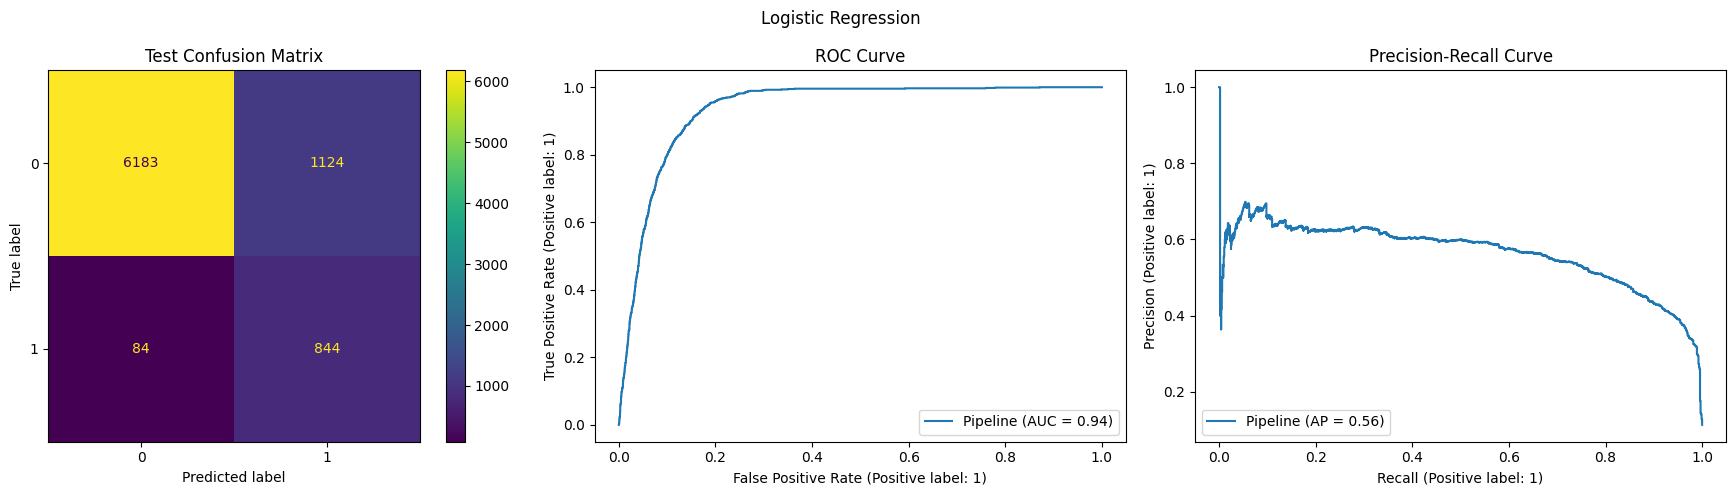


 A treinar K-Nearest Neighbors...

Melhores parâmetros para K-Nearest Neighbors: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
Accuracy (Treino/Teste): 0.9217/0.9012
Precision (Treino/Teste): 0.7116/0.5841
Recall (Treino/Teste): 0.5133/0.4267
F1-Score (Treino/Teste): 0.5964/0.4932
ROC AUC (Treino/Teste): 0.9564/0.8932
PR AUC (Treino/Teste): 0.6658/0.5094
Tempo de treino: 52.90 segundos


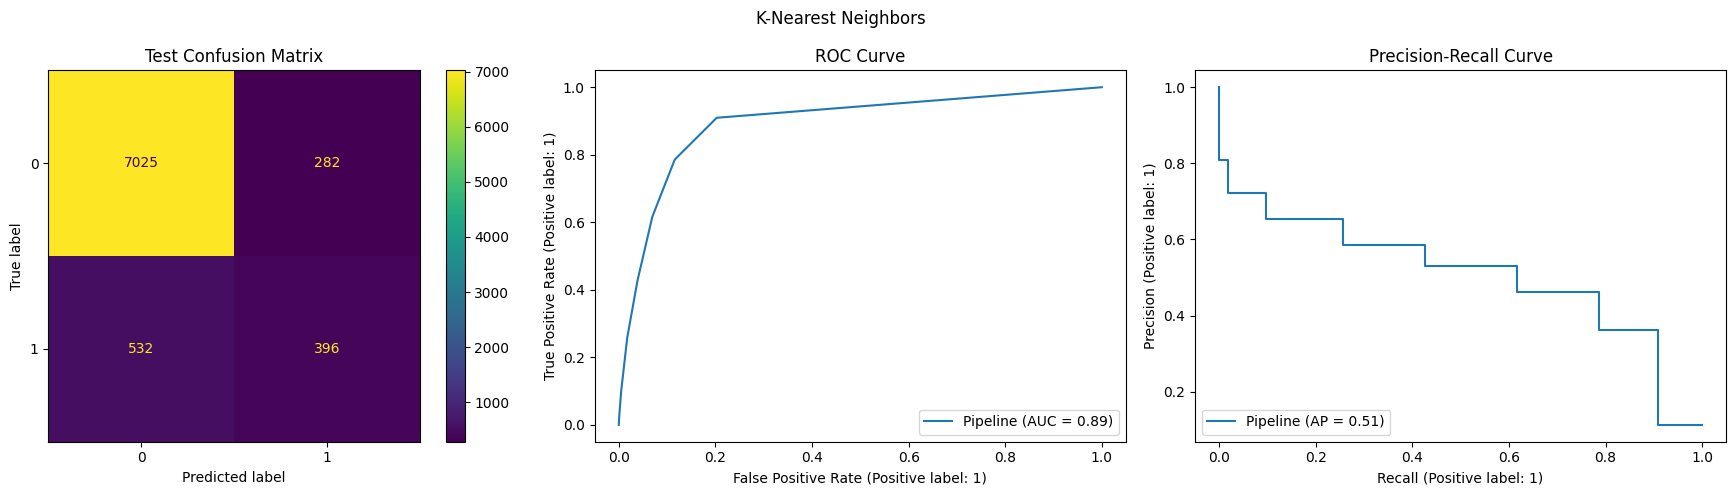


 A treinar SVM...

Melhores parâmetros para SVM: {'model__C': 1, 'model__gamma': 'auto', 'model__kernel': 'rbf'}
Accuracy (Treino/Teste): 0.8406/0.8367
Precision (Treino/Teste): 0.4096/0.4039
Recall (Treino/Teste): 0.9391/0.9440
F1-Score (Treino/Teste): 0.5704/0.5657
ROC AUC (Treino/Teste): 0.9418/0.9372
PR AUC (Treino/Teste): 0.5950/0.5803
Tempo de treino: 10640.97 segundos


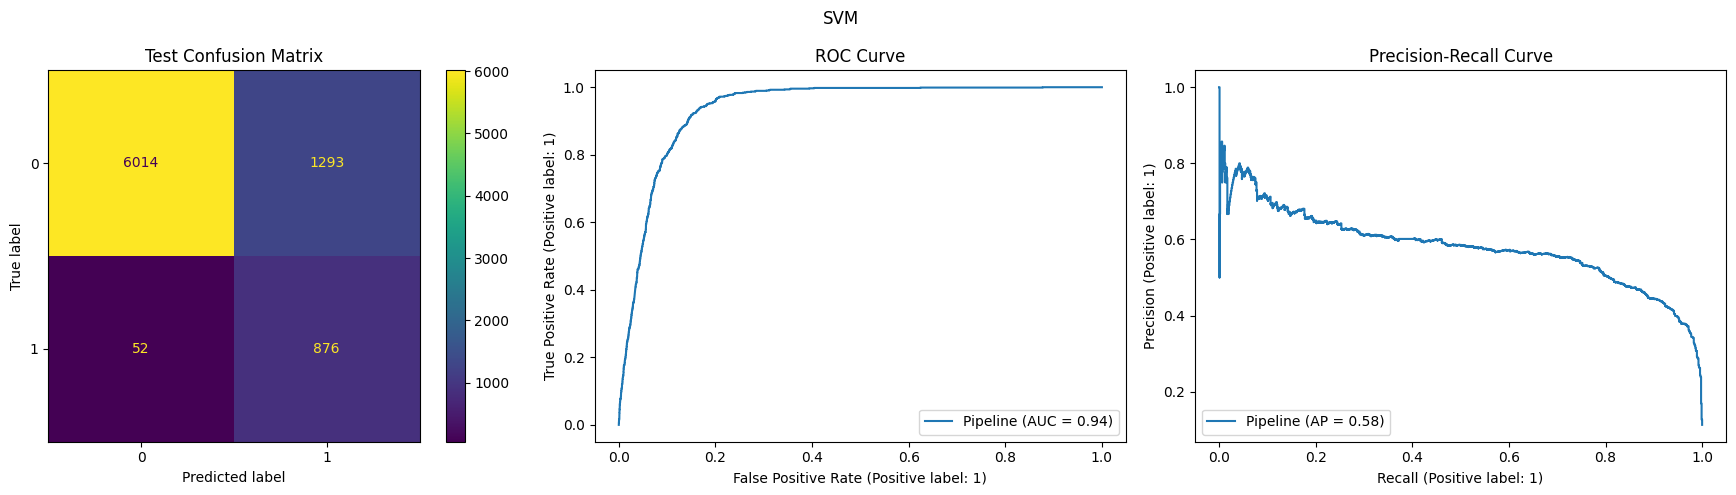


 A treinar Decision Tree...

Melhores parâmetros para Decision Tree: {'model__max_depth': 10, 'model__min_samples_split': 10}
Accuracy (Treino/Teste): 0.8743/0.8546
Precision (Treino/Teste): 0.4720/0.4295
Recall (Treino/Teste): 0.9757/0.8825
F1-Score (Treino/Teste): 0.6363/0.5778
ROC AUC (Treino/Teste): 0.9628/0.9055
PR AUC (Treino/Teste): 0.7260/0.5788
Tempo de treino: 15.02 segundos


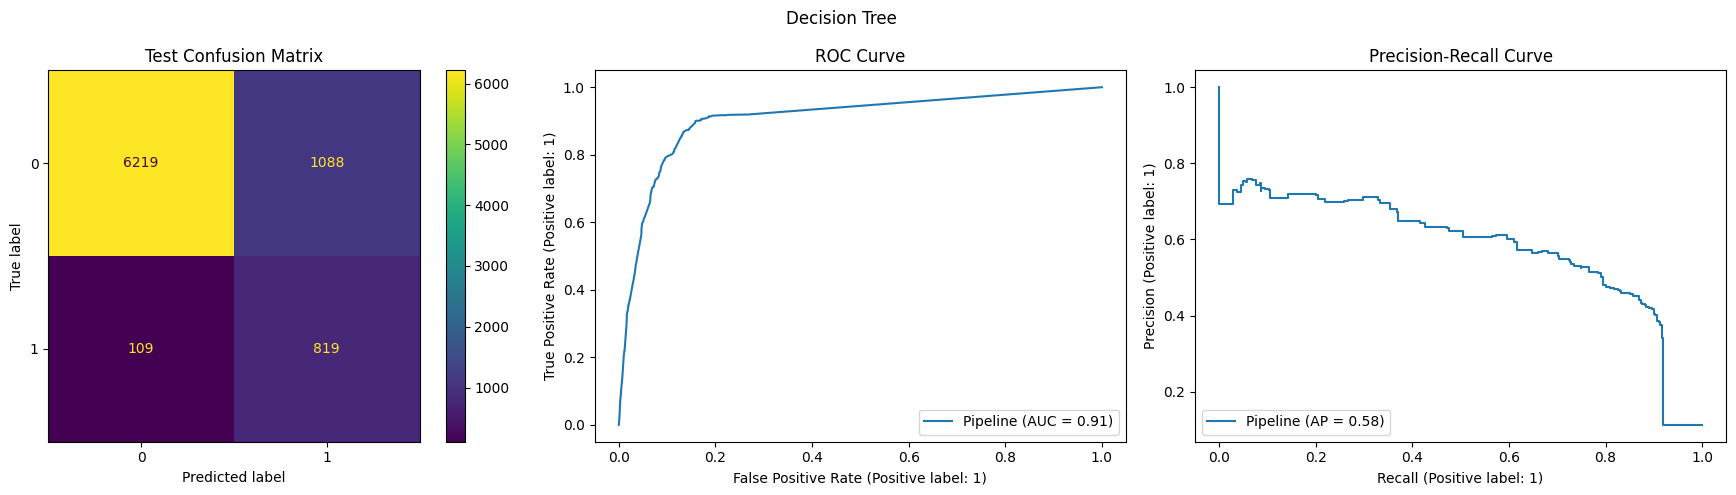

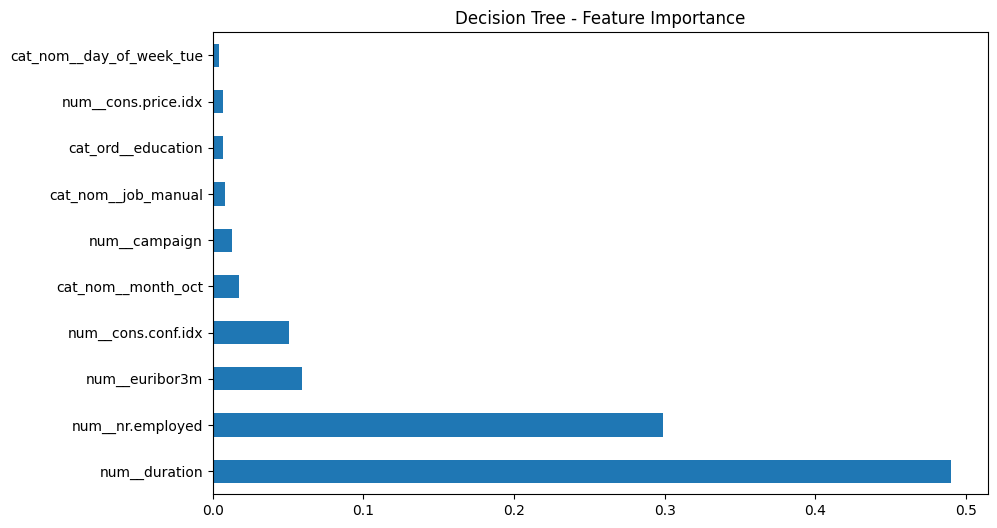


 A treinar Random Forest...

Melhores parâmetros para Random Forest: {'model__max_depth': 10, 'model__n_estimators': 200}
Accuracy (Treino/Teste): 0.8812/0.8655
Precision (Treino/Teste): 0.4862/0.4523
Recall (Treino/Teste): 0.9510/0.9192
F1-Score (Treino/Teste): 0.6434/0.6063
ROC AUC (Treino/Teste): 0.9649/0.9436
PR AUC (Treino/Teste): 0.7643/0.6188
Tempo de treino: 121.95 segundos


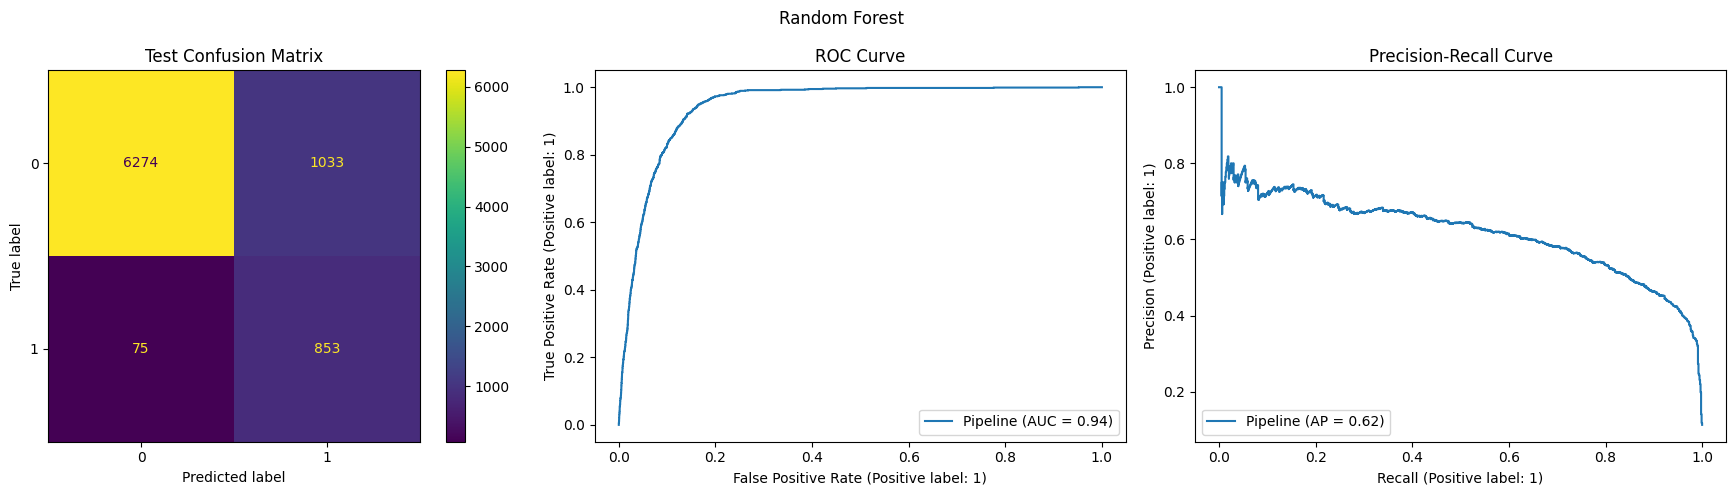

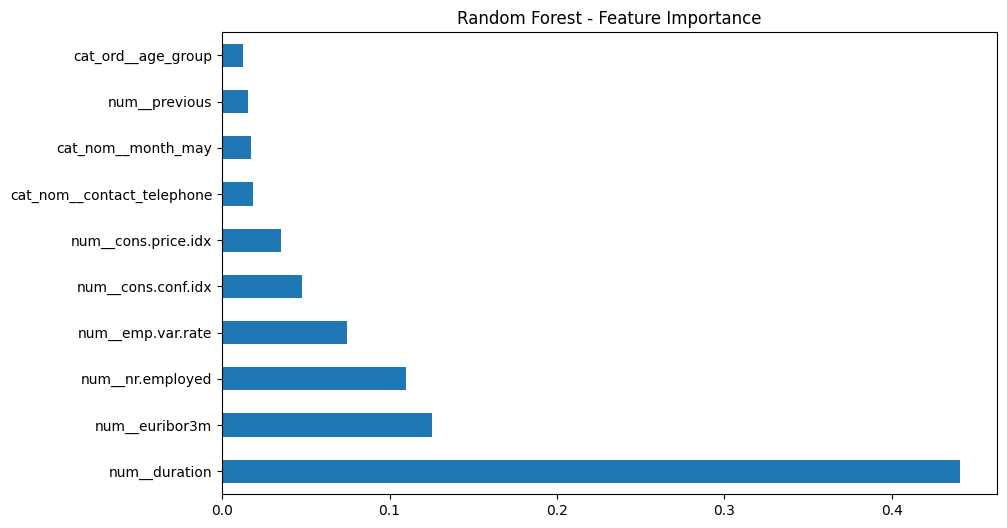


 A treinar Gradient Boosting...

Melhores parâmetros para Gradient Boosting: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100}
Accuracy (Treino/Teste): 0.9322/0.9146
Precision (Treino/Teste): 0.7279/0.6322
Recall (Treino/Teste): 0.6365/0.5797
F1-Score (Treino/Teste): 0.6791/0.6048
ROC AUC (Treino/Teste): 0.9630/0.9481
PR AUC (Treino/Teste): 0.7790/0.6414
Tempo de treino: 1085.80 segundos


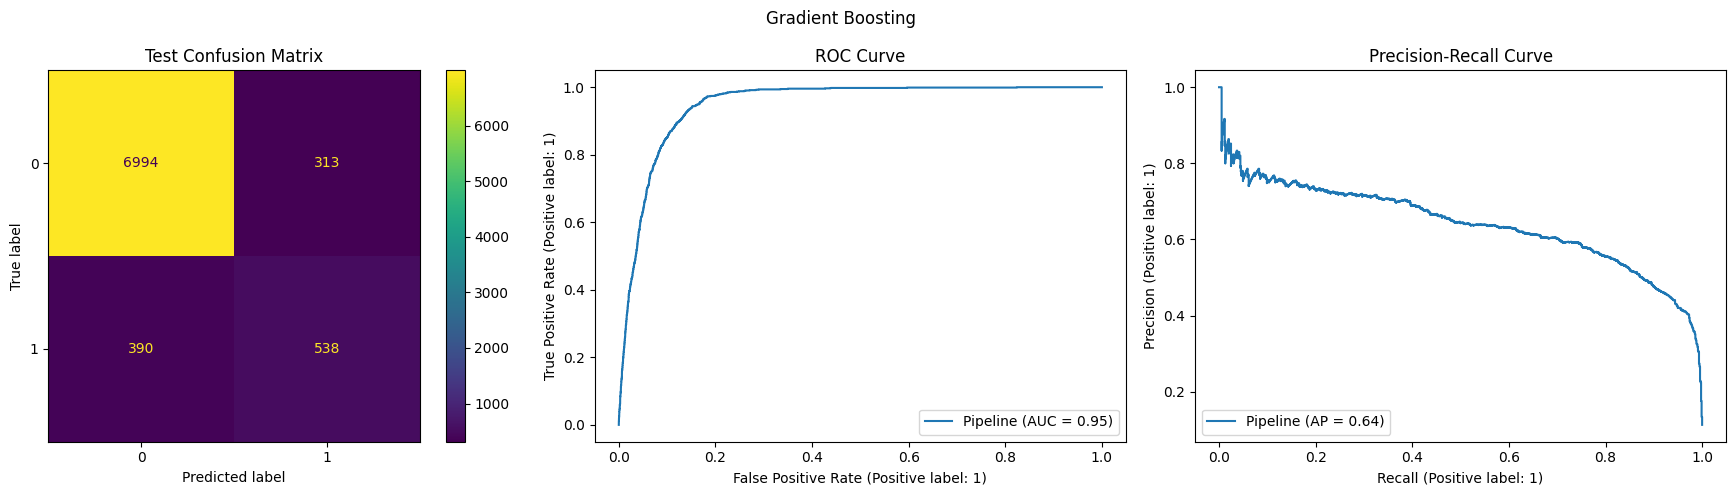

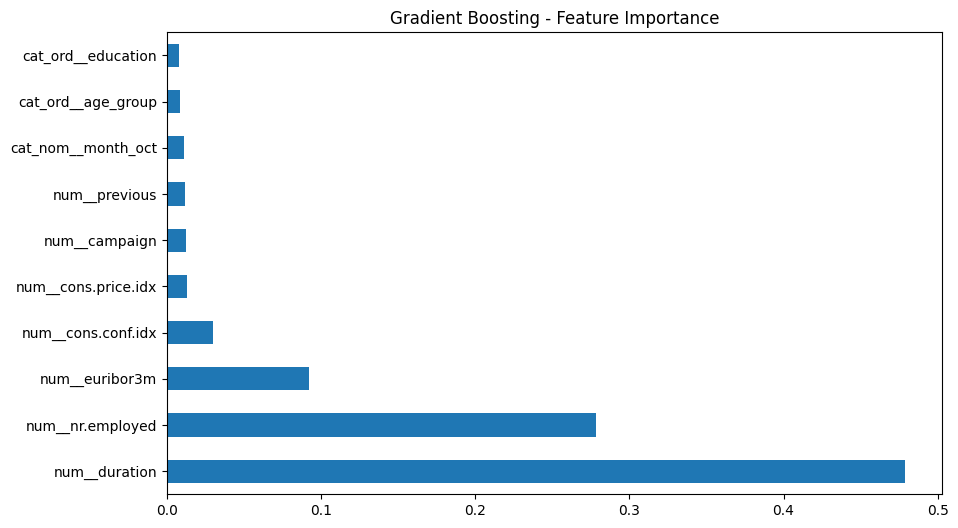


 A treinar XGBoost...

Melhores parâmetros para XGBoost: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100}
Accuracy (Treino/Teste): 0.8671/0.8604
Precision (Treino/Teste): 0.4570/0.4435
Recall (Treino/Teste): 0.9542/0.9386
F1-Score (Treino/Teste): 0.6180/0.6024
ROC AUC (Treino/Teste): 0.9587/0.9474
PR AUC (Treino/Teste): 0.7168/0.6379
Tempo de treino: 82.52 segundos


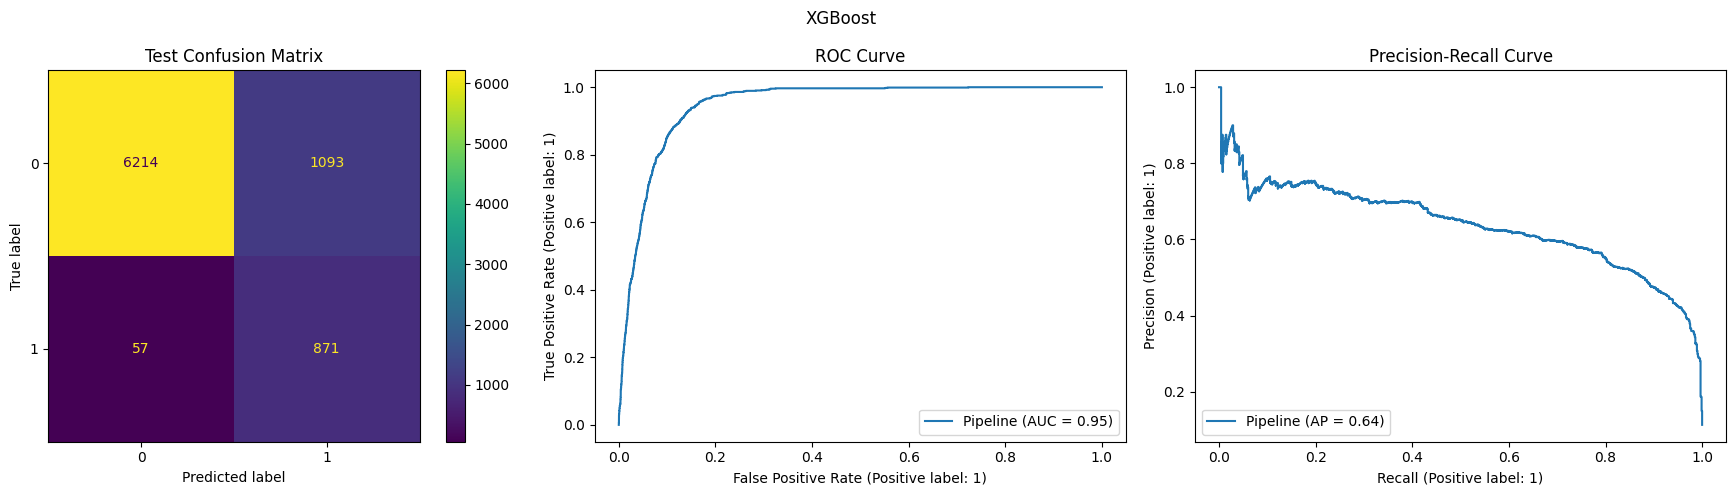

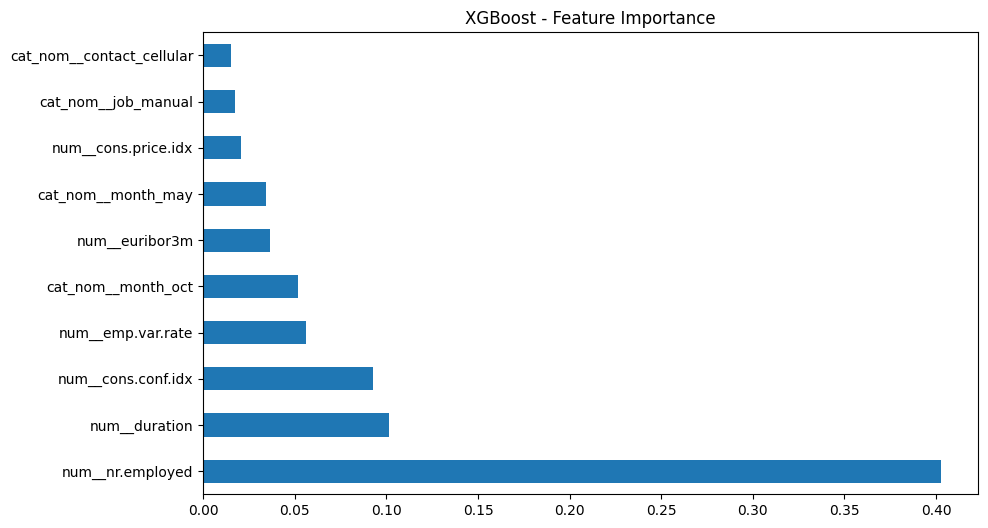


 A treinar LightGBM...
[LightGBM] [Info] Number of positive: 3711, number of negative: 29228
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 32939, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112663 -> initscore=-2.063826
[LightGBM] [Info] Start training from score -2.063826

Melhores parâmetros para LightGBM: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 100, 'model__scale_pos_weight': 7.876044192939909}
Accuracy (Treino/Teste): 0.8774/0.8655
Precision (Treino/Teste): 0.4783/0.4527
Recall (Treino/Teste): 0.9720/0.9289
F1-Score (Treino/Teste): 0.6411/0.6088
ROC AUC (Treino/Teste): 0.9649/0.9479
PR AUC (Treino/Teste): 0.7438/0.6413
Tempo de treino: 74.87 segu

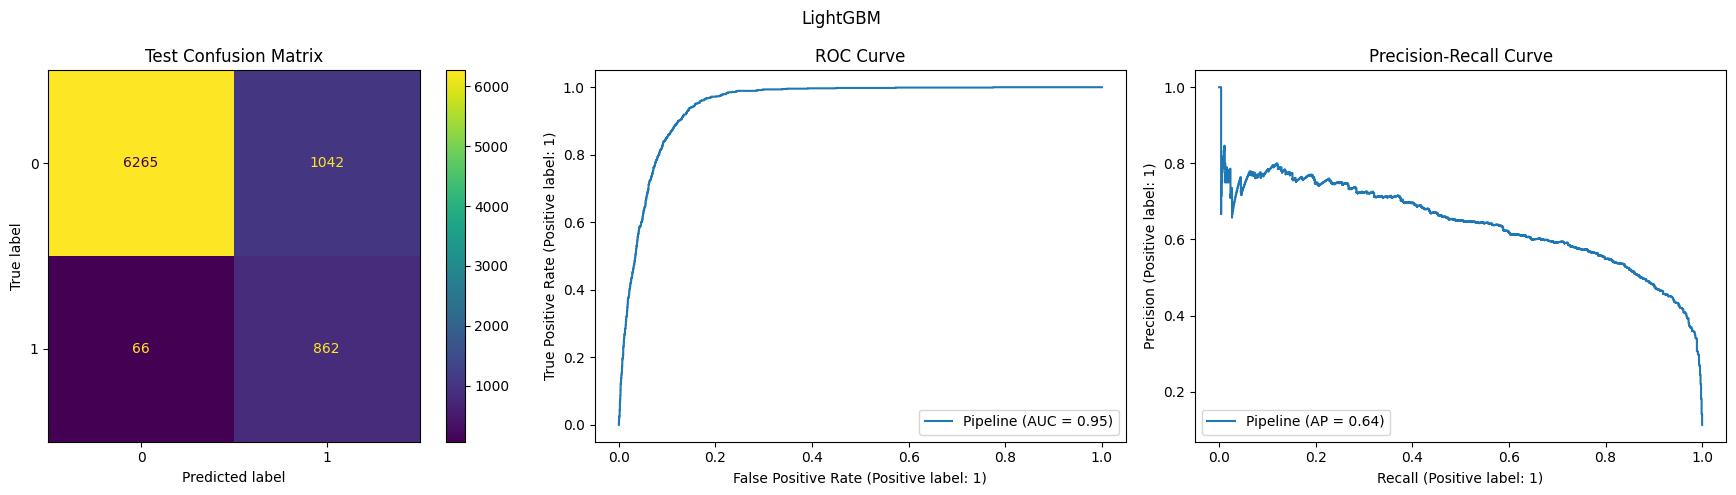

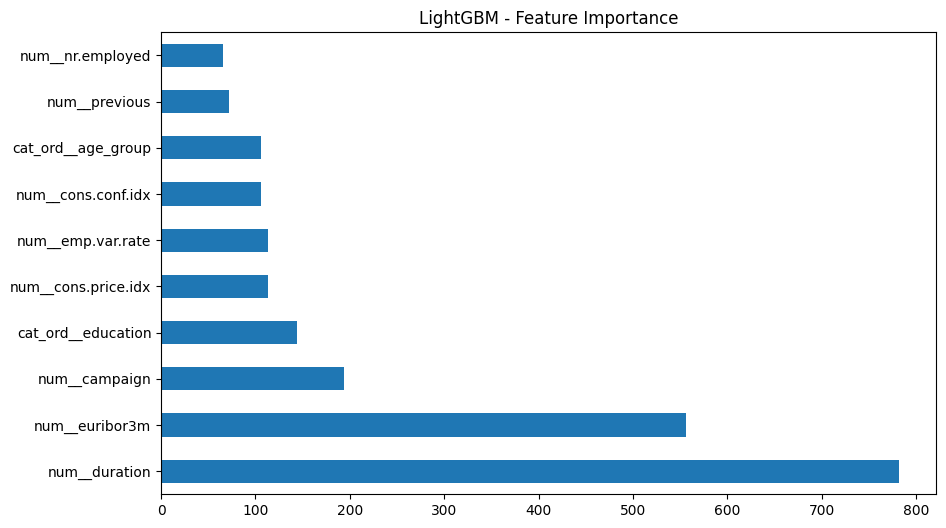


Comparação final:
                Modelo  Accuracy Teste  ROC AUC Teste  PR AUC Teste  \
5    Gradient Boosting        0.914633       0.948108      0.641409   
7             LightGBM        0.865452       0.947933      0.641275   
6              XGBoost        0.860352       0.947351      0.637864   
4        Random Forest        0.865452       0.943642      0.618846   
2                  SVM        0.836673       0.937214      0.580283   
0  Logistic Regression        0.853309       0.935418      0.564934   
3        Decision Tree        0.854645       0.905513      0.578776   
1  K-Nearest Neighbors        0.901154       0.893213      0.509410   

   Precision Teste  Recall Teste  F1 Teste  Tempo de treino (s)  
5         0.632197      0.579741  0.604834          1085.801013  
7         0.452731      0.928879  0.608757            74.874285  
6         0.443483      0.938578  0.602351            82.521902  
4         0.452280      0.919181  0.606254           121.952570  
2         0

In [ ]:
# Treino e Avaliação dos Modelos

# Guardar resultados num dicionário
results = []

for model_name, config in models.items():
    print(f"\n A treinar {model_name}...")
    start_time = time.time()

    # Criar pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', config['model'])
    ])

    # Grid search
    grid = GridSearchCV(
        pipe,
        param_grid=config['params'],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0 # controlar o output
    )
    grid.fit(X_train, y_train)

    # Melhor modelo
    best_model = grid.best_estimator_

    # Previsões
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    y_train_proba = best_model.predict_proba(X_train)[:, 1]
    y_test_proba = best_model.predict_proba(X_test)[:, 1]

    # Métricas de avaliação
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_proba)
    test_roc_auc = roc_auc_score(y_test, y_test_proba)
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    train_pr_auc = average_precision_score(y_train, y_train_proba)
    test_pr_auc = average_precision_score(y_test, y_test_proba)
    elapsed_time = time.time() - start_time  # Guardar o tempo de treino numa variável

    # Guardar resultados
    results.append({
        'Modelo': model_name,
        'Melhores parametros': grid.best_params_,
        'Accuracy Treino': train_accuracy,
        'Accuracy Teste': test_accuracy,
        'ROC AUC Treino': train_roc_auc,
        'ROC AUC Teste': test_roc_auc,
        'Precision Treino': train_precision,
        'Precision Teste': test_precision,
        'Recall Treino': train_recall,
        'Recall Teste': test_recall,
        'F1 Treino': train_f1,
        'F1 Teste': test_f1,
        'PR AUC Treino': train_pr_auc,
        'PR AUC Teste': test_pr_auc,
        'Tempo de treino (s)': elapsed_time,
        'Best Model': best_model
    })

    # Mostrar resultados
    print(f"\nMelhores parâmetros para {model_name}: {grid.best_params_}")
    print(f"Accuracy (Treino/Teste): {train_accuracy:.4f}/{test_accuracy:.4f}")
    print(f"Precision (Treino/Teste): {train_precision:.4f}/{test_precision:.4f}")
    print(f"Recall (Treino/Teste): {train_recall:.4f}/{test_recall:.4f}")
    print(f"F1-Score (Treino/Teste): {train_f1:.4f}/{test_f1:.4f}")
    print(f"ROC AUC (Treino/Teste): {train_roc_auc:.4f}/{test_roc_auc:.4f}")
    print(f"PR AUC (Treino/Teste): {train_pr_auc:.4f}/{test_pr_auc:.4f}")
    print(f"Tempo de treino: {elapsed_time:.2f} segundos")

    # Visualizar
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    plt.suptitle(model_name)

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, ax=ax[0])
    ax[0].set_title('Test Confusion Matrix')

    # ROC Curve
    RocCurveDisplay.from_estimator(best_model, X_test, y_test, ax=ax[1])
    ax[1].set_title('ROC Curve')

    # Precision-Recall Curve
    PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, ax=ax[2])
    ax[2].set_title('Precision-Recall Curve')

    plt.tight_layout()
    plt.show()

    # Feature Importance para modelos baseados em árvore
    if hasattr(best_model.named_steps['model'], 'feature_importances_'):
        # nome das features automático
        ohe_columns = best_model.named_steps['preprocessor'].named_transformers_['cat_nom'].get_feature_names_out(categorical_nominal)
        feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

        importances = best_model.named_steps['model'].feature_importances_
        assert len(importances) == len(feature_names), "Mismatch between features and importance scores"
        feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:10]

        plt.figure(figsize=(10, 6))
        feat_imp.plot(kind='barh')
        plt.title(f'{model_name} - Feature Importance')
        plt.show()

# Converter os resultados em DataFrame (ordena pela avaliação do critério principal e, em caso de empate, do secundário)
results_df = pd.DataFrame(results).sort_values(by=['ROC AUC Teste', 'F1 Teste'], ascending=[False, False])

# Guardar o Melhor Modelo
best_model_name = results_df.iloc[0]['Modelo']
best_model = [m for m in results if m['Modelo'] == best_model_name][0]['Best Model']
results_df.to_csv('results_checkpoint.csv', index=False)
joblib.dump(best_model, 'best_model.pkl')

# Comparação final
print("\nComparação final:")
print(results_df[[
    'Modelo',
    'Accuracy Teste',
    'ROC AUC Teste',
    'PR AUC Teste',
    'Precision Teste',
    'Recall Teste',
    'F1 Teste',
    'Tempo de treino (s)'
]].sort_values(by='ROC AUC Teste', ascending=False))


## Resultados finais

<details>
<summary><strong> DataFrame com Resultados
 </strong> (Expandir)</summary>

O seguinte data frame reune os modelos e respetivos parâmetros, avaliações e tempo de execução. `results_df` foi criado para apresentar os resultados ordenados primeiramente por **ROC AUC** e, em caso de empate, **F1 Score**.

Foi ainda adicionada a opção de **exportar o data frame em csv** (`results_df.to_csv`) para realizar a componente de avaliação opcional de ***Power BI***.
</details>

<details>
<summary><strong> Comparação entre os modelos
</strong> (Expandir)</summary>

* **Regressão Logística:** O modelo de Regressão Logística demonstra uma forte separação de classes (ROC AUC 94%) e um recall elevado (91%), o que demonstra que identifica eficazmente a maioria dos casos positivos ("sim"). Todavia, a sua baixa precisão (43%) revela frequentes falsos positivos, uma compensação típica em conjuntos de dados desequilibrados. A diferença mínima entre as métricas de treino e teste sugere que não há overfitting. Destaca-se, ainda, pela velocidade (~16 segundos) e pela priorização da sensibilidade (por exemplo, minimizar oportunidades perdidas na campanha de marketing).

* **KNN:** O modelo apresenta um overfitting significativo, com queda de 2% na accuracy do treino (92%) para o teste (90%). O seu baixo recall (43%) indica uma fraca capacidade de identificar casos "sim" verdadeiros, e a PR AUC (51%) revela-se próxima do aleatório para a classe minoritária. Embora atinja uma precisão moderada (58% no teste), o modelo não consegue equilibrar eficazmente o desequilíbrio de classes. Conclui-se que não é um modelo recomendado para esta tarefa.

* **SVM:** O modelo SVM atinge um recall excecional (94%), tornando-o altamente eficaz na identificação de casos "sim" verdadeiros (mínimas oportunidades perdidas). No entanto, a sua baixa precisão (40,3%) significa muitos falsos positivos, e a AUC PR (58%) reflete uma capacidade limitada de priorizar a classe minoritária. Embora a AUC ROC (93%) indique uma forte separação geral de classes, o tempo de treino extremo (~3 horas) torna-o impraticável em comparação com modelos mais rápidos como a Regressão Logística e LightGBM com desempenho semelhante ou melhor. Este modelo seria importante para os casos em que perder valores “yes” seria dispendioso e não existissem modelos mais rápidos com bom recall, o que não é o caso.

* **Árvore de Decisão:** O modelo oferece treino rápido (~15 segundos) e recall elevado (88%), tornando-o adequado para identificar casos "sim". No entanto, a sua baixa precisão (43%) conduz a falsos positivos frequentes, e a diferença significativa no recall entre treino e teste (98% vs. 88%) indica overfitting. Embora a sua ROC AUC (91%) seja respeitável, é superado por métodos de ensemble.

* **Random Forest:** A Random Forest melhora a Árvore de Decisão com melhor generalização (ROC AUC 94%) e maior precisão (45%), mantendo um recall forte (92%). O seu tempo de treino moderado (~2 minutos) e desempenho robusto tornam-no um concorrente sólido, embora seja ultrapassado pelo Gradient Boosting/LightGBM em métricas chave.

* **Gradient Boosting:** O Gradient Boosting oferece a melhor precisão (63%) e ROC AUC (94%), encontrando um equilíbrio ideal entre detetar verdadeiros positivos e minimizar falsos positivos. Obteve, ainda, os melhores resultados na PR AUC (64%) e no Teste F1 (60%), destacando-se no tratamento do desequilíbrio de classes.

* **XGBoost:** O XGBoost atinge o maior recall (94%) entre todos os modelos, garantindo mínimas oportunidades "sim" perdidas, com ROC AUC competitiva (94%). Isso significa que é excelente a identificar a grande maioria dos casos positivos ("sim") e minimiza as perdas de oportunidades importantes. Apesar da sua baixa precisão (44%), que se converte em muitos falsos positivos, é ideal quando perder um potencial "sim" (um cliente que adira ao depósito) custa mais do que o custo de contactar alguém que não está interessado (um "sim" falso).

* **LightGBM:** O LightGBM combina um recall próximo do topo (93%), um treino rápido (~74 segundos) e ROC AUC forte (95%), tornando-se um grande concorrente ao Gradient Boosting em velocidade e desempenho. Embora a sua precisão (45%) fique ligeiramente atrás, atinge o melhor compromisso velocidade-precisão.

</details>

<details>
<summary><strong> Conclusões finais
 </strong> (Expandir)</summary>

Este DataFrame confirmou a expectativa inicial: **modelos ensemble oferecem melhor desempenho devido à natureza e distribuição dos dados**. Dos modelos avaliados, o **Gradient Boosting**, **LightGBM** e **XGBoost** destacaram-se, sendo o Gradient Boosting escolhido como melhor modelo com base nos critérios estabelecidos. Este modelo é recomendado para prever subscrições de depósitos a prazo, devido ao seu desempenho robusto (ROC AUC = 0,948) e equilíbrio entre precisão e recall.

Como alternativa, o XGBoost e o LightGBM revelam-se excecionais na identificação dos clientes que realmente aderiram ao depósito e são ideais para as situações específicas em que é exigido um alto recall. Por sua vez, a Random Forest e a Regressão Logística também se apresentam como alternativas viáveis. Já os modelos a evitar são as Árvores de Decisão, KNN e SVM.

Outra hipótese comprovada foi a **importância das variáveis duração, euribor3m, nr.employed para prever y**. Nos modelos de boosting, essa importância fica ainda mais clara, uma vez que, ao serem usadas nos splits das árvores, reduzem significativamente o erro remanescente. Assim, fornecem a maior capacidade de corrigir o modelo em cada iteração, permitindo capturar nuances que as demais variáveis não conseguiram explicar.

Em última instância, conhecer essas features mais relevantes é essencial para interpretar os resultados, refinar estratégias de coleta de dados e, se necessário, aplicar transformações ou ajustes adicionais para melhorar o desempenho preditivo.
</details>


In [ ]:
results_df # apresentar os resultados em DataFrame (ordenado por ROC)

Modelo                                Melhores parametros  \
5    Gradient Boosting  {'model__learning_rate': 0.1, 'model__max_dept...   
7             LightGBM  {'model__learning_rate': 0.1, 'model__max_dept...   
6              XGBoost  {'model__learning_rate': 0.1, 'model__max_dept...   
4        Random Forest  {'model__max_depth': 10, 'model__n_estimators'...   
2                  SVM  {'model__C': 1, 'model__gamma': 'auto', 'model...   
0  Logistic Regression          {'model__C': 1, 'model__solver': 'lbfgs'}   
3        Decision Tree  {'model__max_depth': 10, 'model__min_samples_s...   
1  K-Nearest Neighbors  {'model__n_neighbors': 7, 'model__weights': 'u...   

   Accuracy Treino  Accuracy Teste  ROC AUC Treino  ROC AUC Teste  \
5         0.932238        0.914633        0.962988       0.948108   
7         0.877379        0.865452        0.964897       0.947933   
6         0.867118        0.860352        0.958686       0.947351   
4         0.881235        0.865452        0.964876       0.943642   
2         0.840614        0.836673        0.941822       0.937214   
0         0.853578        0.853309        0.933614       0.935418   
3         0.874313        0.854645        0.962772       0.905513   
1         0.921734        0.901154        0.956376       0.893213   

   Precision Treino  Precision Teste  Recall Treino  Recall Teste  F1 Treino  \
5          0.727889         0.632197       0.636486      0.579741   0.679126   
7          0.478255         0.452731       0.971975      0.928879   0.641073   
6          0.457021         0.443483       0.954190      0.938578   0.618029   
4          0.486155         0.452280       0.950957      0.919181   0.643391   
2          0.409566         0.403873       0.939100      0.943966   0.570376   
0          0.427642         0.428862       0.885476      0.909483   0.576744   
3          0.472038         0.429470       0.975748      0.882543   0.636268   
1          0.711617         0.584071       0.513339      0.426724   0.596431   

   F1 Teste  PR AUC Treino  PR AUC Teste  Tempo de treino (s)  \
5  0.604834       0.779001      0.641409          1085.801013   
7  0.608757       0.743843      0.641275            74.874285   
6  0.602351       0.716757      0.637864            82.521902   
4  0.606254       0.764273      0.618846           121.952570   
2  0.565709       0.595045      0.580283         10640.968992   
0  0.582873       0.567954      0.564934            16.228420   
3  0.577778       0.726041      0.578776            15.016092   
1  0.493151       0.665807      0.509410            52.898522   

                                          Best Model  
5  (ColumnTransformer(sparse_threshold=0,\n      ...  
7  (ColumnTransformer(sparse_threshold=0,\n      ...  
6  (ColumnTransformer(sparse_threshold=0,\n      ...  
4  (ColumnTransformer(sparse_threshold=0,\n      ...  
2  (ColumnTransformer(sparse_threshold=0,\n      ...  
0  (ColumnTransformer(sparse_threshold=0,\n      ...  
3  (ColumnTransformer(sparse_threshold=0,\n      ...  
1  (ColumnTransformer(sparse_threshold=0,\n      ...

In [ ]:
# results_df = pd.read_csv('results_checkpoint.csv')  # se fechar sessão ou parar, podemos fazer reload dos dados

In [ ]:
# exportar dados MML num novo ficheiro

results_df.to_csv('Dados_MML.csv', index=False)
files.download('Dados_MML.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>